USING NASA | Nearest Earth Objects (1910-2024)

Data source: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/data
- train a machine learning model that can accurately predict whether a NEO is
hazardous or not.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scikit-learn


In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import missingno as msno
from scipy.stats import chi2_contingency
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler,SMOTE # Import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from scipy.stats import zscore
from scipy.stats.mstats import winsorize



#classification maodels
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB

#metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1. Data Importing and Cleaning:

In [ ]:
# get data from kaggle

!pip install kaggle

# Upload your kaggle.json file (contains API credentials)
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets list -s "nasa-nearest-earth-objects-1910-2024"

ref                                            title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------  ----------------------------------------  ----  -------------------  -------------  ---------  ---------------  
ivansher/nasa-nearest-earth-objects-1910-2024  NASA | Nearest Earth Objects (1910-2024)  13MB  2024-07-18 13:17:11           2658         60  1.0              


In [ ]:
!kaggle datasets download -d ivansher/nasa-nearest-earth-objects-1910-2024


Dataset URL: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024
License(s): CC0-1.0
 69% 9.00M/13.0M [00:00<00:00, 34.6MB/s]
100% 13.0M/13.0M [00:00<00:00, 46.6MB/s]


In [ ]:
!unzip nasa-nearest-earth-objects-1910-2024.zip -d nasa_neo_data

Archive:  nasa-nearest-earth-objects-1910-2024.zip
  inflating: nasa_neo_data/nearest-earth-objects(1910-2024).csv  


In [ ]:

# Load the dataset
df_nasa = pd.read_csv('nasa_neo_data/nearest-earth-objects(1910-2024).csv')

# Print some information about the data
df_nasa.head(20)



neo_id                 name  absolute_magnitude  estimated_diameter_min  \
0    2162117   162117 (1998 SD15)               19.14                0.394962   
1    2349507     349507 (2008 QY)               18.50                0.530341   
2    2455415     455415 (2003 GA)               21.45                0.136319   
3    3132126            (2002 PB)               20.63                0.198863   
4    3557844            (2011 DW)               22.70                0.076658   
5    3656926           (2014 BT8)               25.00                0.026580   
6    3421513           (2008 OX1)               21.50                0.133216   
7    3541504         (2010 OF101)               19.75                0.298233   
8    3836942            (2018 YH)               21.70                0.121494   
9    3892166          (2019 UP13)               23.45                0.054269   
10  54245816           (2022 CM3)               26.02                0.016617   
11   2627157    627157 (2008 OX1)               21.50                0.133216   
12  54418652            (2024 AF)               23.76                0.047049   
13   2162635  162635 (2000 SS164)               16.71                1.209358   
14   3559741          (2011 EE41)               24.30                0.036691   
15  54193347           (2021 RA4)               24.32                0.036354   
16  54245582           (2022 CQ2)               24.90                0.027833   
17   2277810   277810 (2006 FV35)               21.72                0.120380   
18   2284422     284422 (2006 YD)               17.36                0.896510   
19   2357439   357439 (2004 BL86)               19.29                0.368600   

    estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                 0.883161         Earth       71745.401048   5.814362e+07   
1                 1.185878         Earth      109949.757148   5.580105e+07   
2                 0.304818         Earth       24865.506798   6.720689e+07   
3                 0.444672         Earth       78890.076805   3.039644e+07   
4                 0.171412         Earth       56036.519484   6.311863e+07   
5                 0.059435         Earth       47477.649832   4.290521e+07   
6                 0.297879         Earth       57853.295346   2.727908e+07   
7                 0.666868         Earth       46972.486794   6.997593e+07   
8                 0.271669         Earth       37424.548382   5.657727e+06   
9                 0.121350         Earth       38524.867869   6.166118e+07   
10                0.037157         Earth       45125.612049   3.422388e+07   
11                0.297879         Earth       57853.295743   2.727908e+07   
12                0.105206         Earth       19121.334914   1.244445e+07   
13                2.704207         Earth       12703.788572   6.958943e+07   
14                0.082043         Earth       67828.785882   7.130795e+07   
15                0.081291         Earth       45162.155757   4.036684e+07   
16                0.062236         Earth       40238.019057   1.067516e+07   
17                0.269178         Earth       31504.100926   4.350791e+07   
18                2.004657         Earth       99804.739017   5.519530e+07   
19                0.824214         Earth       59133.776590   7.266532e+06   

    is_hazardous  
0          False  
1           True  
2          False  
3          False  
4          False  
5          False  
6           True  
7          False  
8           True  
9          False  
10         False  
11          True  
12         False  
13         False  
14         False  
15         False  
16         False  
17         False  
18         False  
19          True

In [ ]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


features meta data:


1.   neo_id:
Unique Identifier for each Asteroid

2.   name
Name given by NASA

3.   absolute_magnitude      
Describes intrinsic luminosity

4.   estimated_diameter_min  
The smallest possible size of the asteroid, measured in kilometers.
5.   estimated_diameter_max  
The largest possible size of the asteroid, also measured in kilometers.
(The actual size of the asteroid is somewhere between the minimum and maximum values.)

6.   orbiting_body   
This tells us which planet the asteroid orbits around here it it earth        

7.   relative_velocity
The speed at which the asteroid is moving relative to Earth, measured in kilometers per hour (Kmph). This helps scientists understand how fast the asteroid is traveling.


8.   miss_distance
The closest distance the asteroid comes to Earth, measured in kilometers. A smaller number means it passed very close, while a larger number means it was far away.

9.   is_hazardous (target):           
A "True" or "False" value that indicates if the asteroid could be dangerous. If it's marked as "True," it means scientists are keeping an eye on it because it might come too close to Earth in the future.




In [ ]:
df_nasa.describe()

neo_id  absolute_magnitude  estimated_diameter_min  \
count  3.381990e+05       338171.000000           338171.000000   
mean   1.759939e+07           22.932525                0.157812   
std    2.287225e+07            2.911216                0.313885   
min    2.000433e+06            9.250000                0.000511   
25%    3.373980e+06           20.740000                0.025384   
50%    3.742127e+06           22.800000                0.073207   
75%    5.405374e+07           25.100000                0.189041   
max    5.446281e+07           33.580000               37.545248   

       estimated_diameter_max  relative_velocity  miss_distance  
count           338171.000000      338199.000000   3.381990e+05  
mean                 0.352878       51060.662908   4.153535e+07  
std                  0.701869       26399.238435   2.077399e+07  
min                  0.001143         203.346433   6.745533e+03  
25%                  0.056760       30712.031471   2.494540e+07  
50%                  0.163697       47560.465474   4.332674e+07  
75%                  0.422708       66673.820614   5.933961e+07  
max                 83.953727      291781.106613   7.479865e+07

missing values:

missing values in these columns:

absolute_magnitude      338171 non-null  float64

estimated_diameter_min  338171 non-null  float64

estimated_diameter_max  338171 non-null  float64

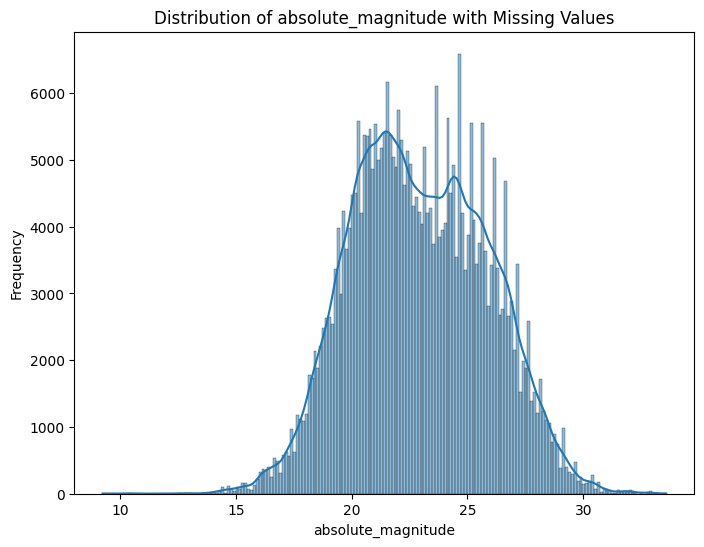

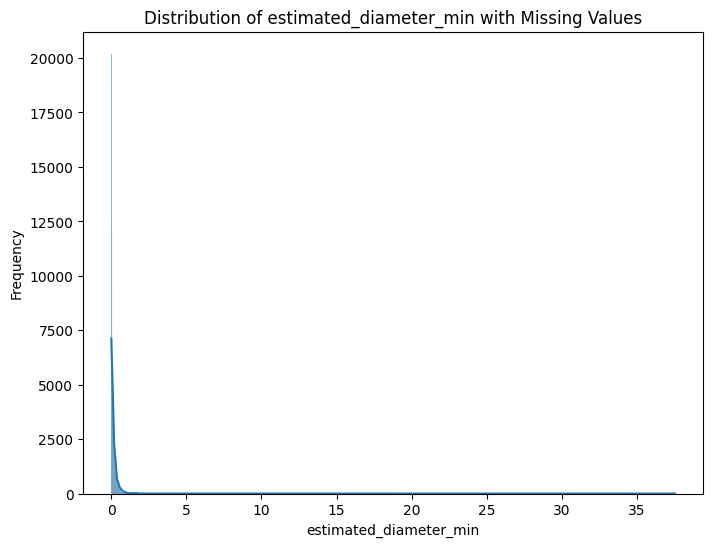

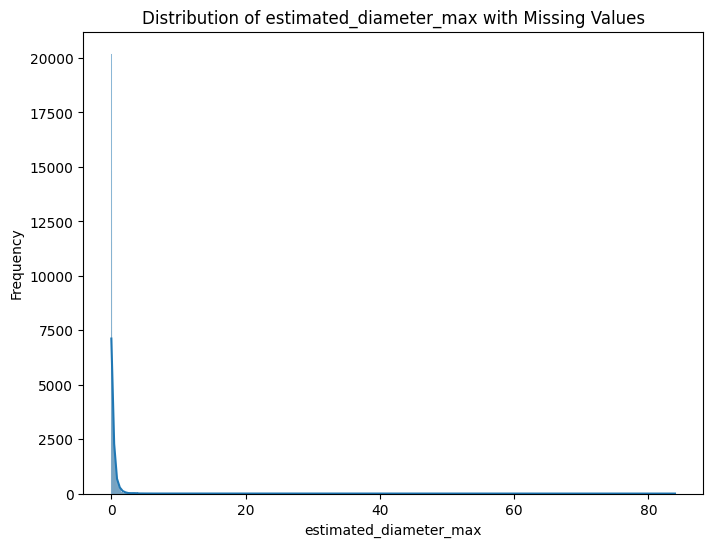

In [ ]:
# display distribution of columns with missing values

for col in df_nasa.columns:
    if df_nasa[col].isnull().any():
        plt.figure(figsize=(8, 6))
        sns.histplot(df_nasa[col], kde=True)
        plt.title(f'Distribution of {col} with Missing Values')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


📌 Little's MCAR Test (Statistical Test for MCAR)

You can use missingno and hypothesis testing to check randomness.

Missing Values Summary:
neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


<Figure size 1000x500 with 0 Axes>

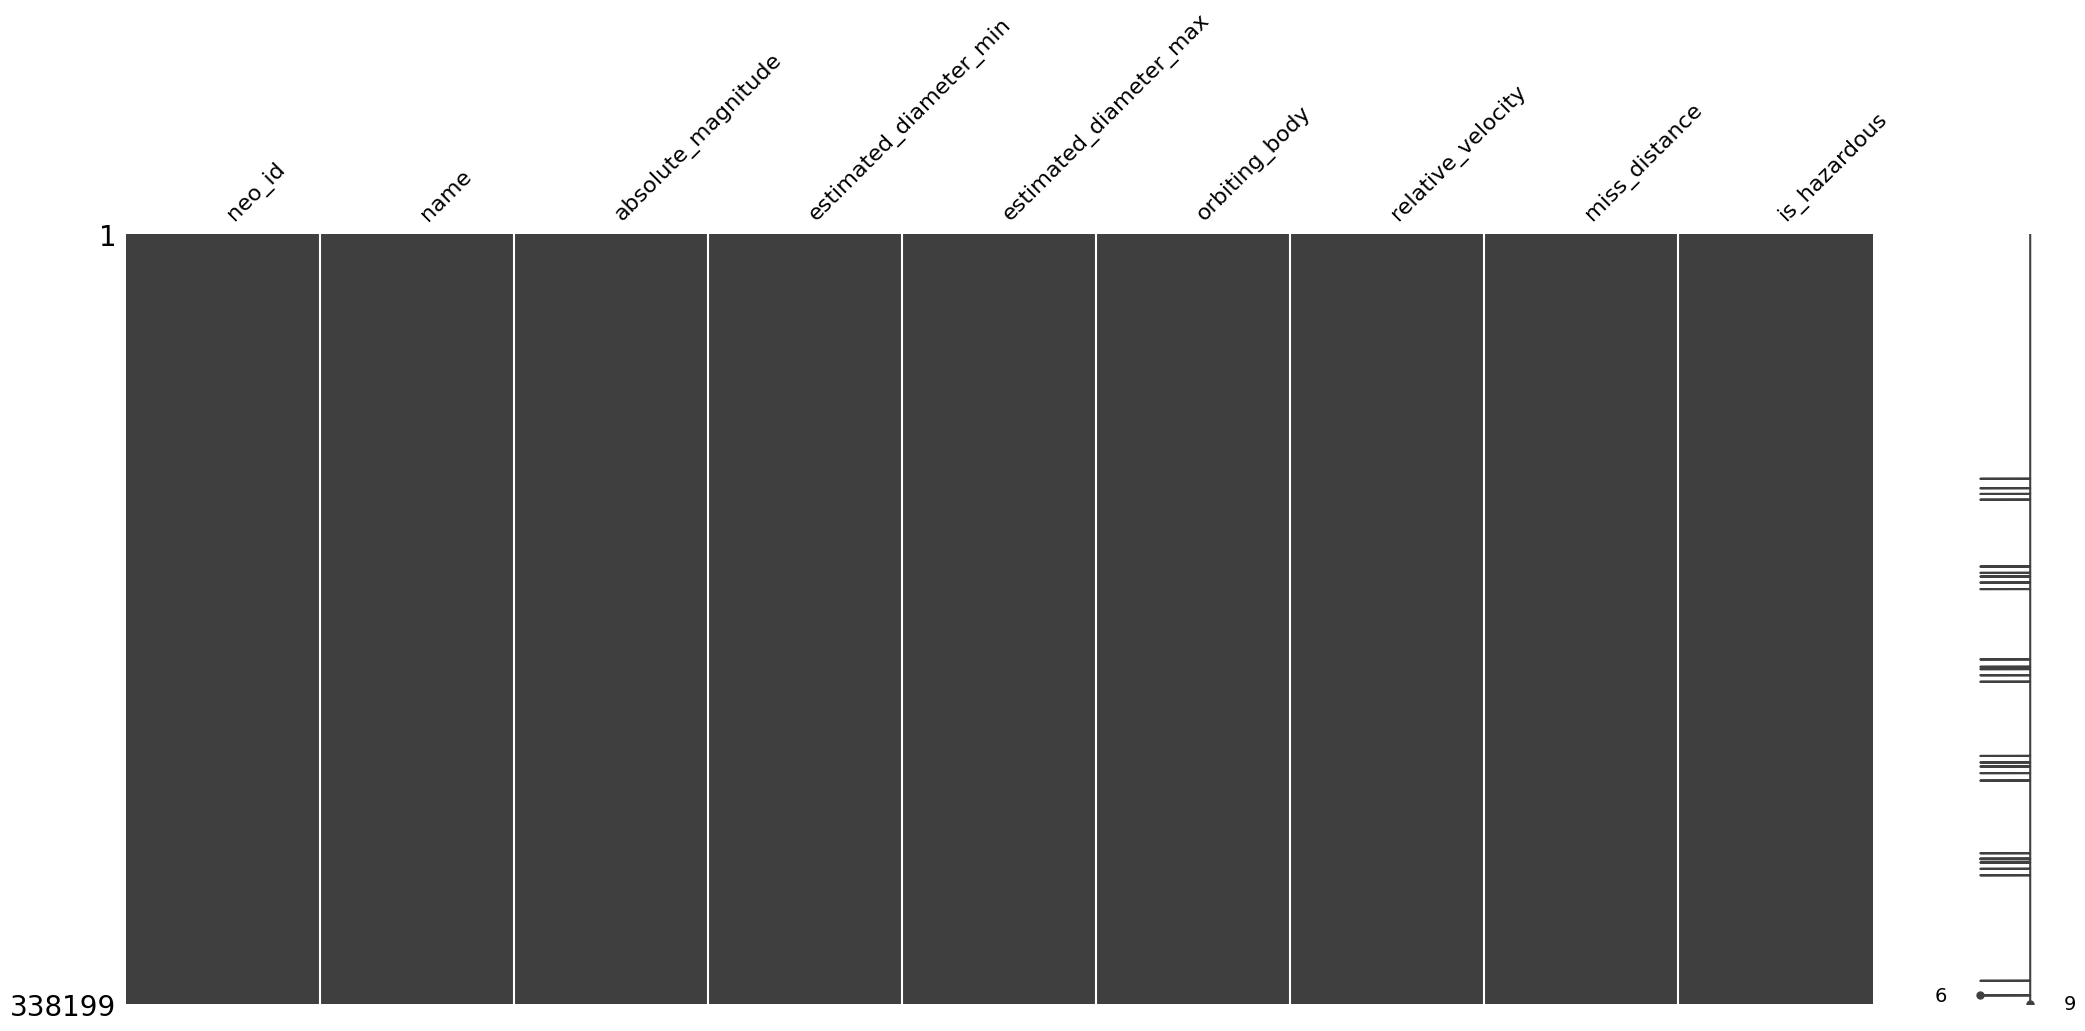

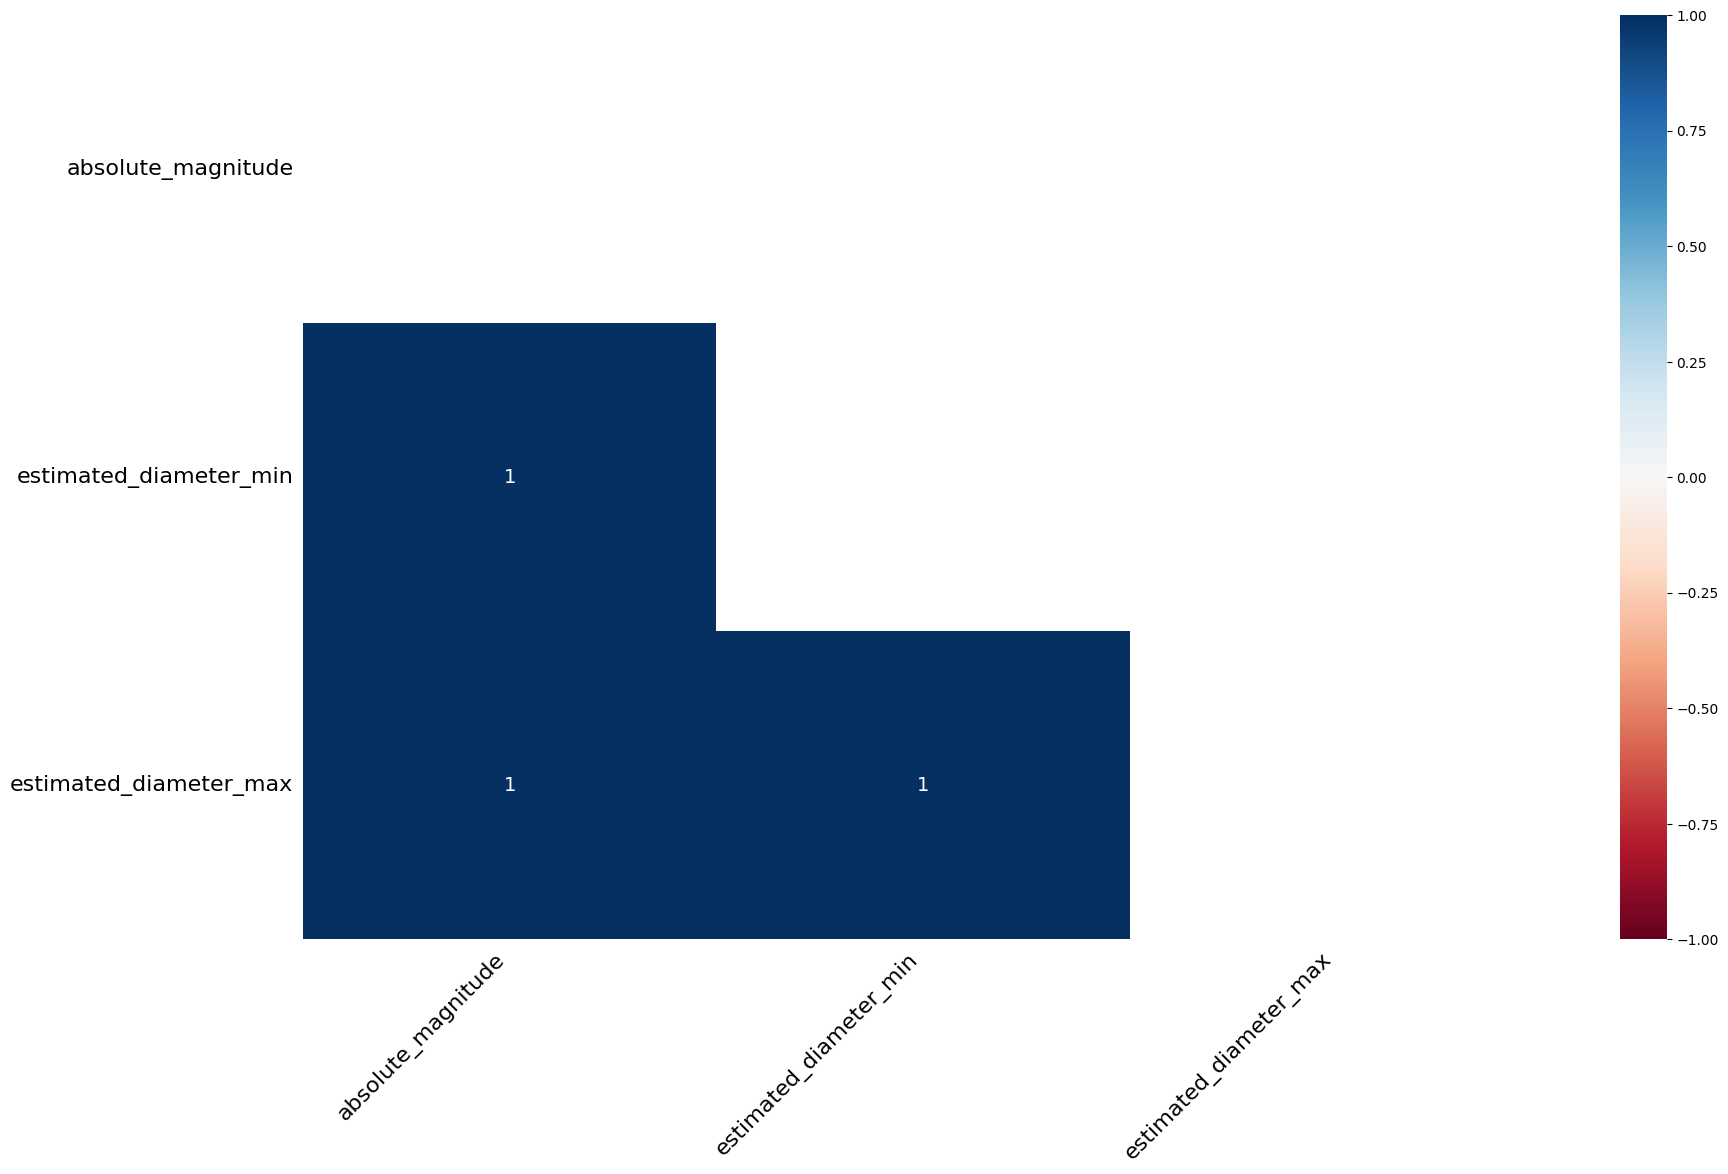

In [ ]:

# Load dataset (assuming df is already loaded)
# Checking missing values summary
print("Missing Values Summary:")
print(df_nasa.isnull().sum())

# Visualizing missing data
plt.figure(figsize=(10, 5))
msno.matrix(df_nasa)
plt.show()

msno.heatmap(df_nasa)
plt.show()


Implications of This Correlation

Since missing values are correlated, they are likely not missing completely at random (MCAR).

Instead, the missingness is probably MAR (Missing at Random), meaning it depends on other observed data.

In [ ]:
# print the recods in the data with missing values only output these columns absolute_magnitude, estimated_diameter_min, and estimated_diameter_max

# Display records with missing values for specified columns
missing_data = df_nasa[df_nasa.isnull().any(axis=1)][['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max']]
missing_data


absolute_magnitude  estimated_diameter_min  estimated_diameter_max
107508                 NaN                     NaN                     NaN
111671                 NaN                     NaN                     NaN
114171                 NaN                     NaN                     NaN
116688                 NaN                     NaN                     NaN
146059                 NaN                     NaN                     NaN
148836                 NaN                     NaN                     NaN
150446                 NaN                     NaN                     NaN
153108                 NaN                     NaN                     NaN
155973                 NaN                     NaN                     NaN
186857                 NaN                     NaN                     NaN
190088                 NaN                     NaN                     NaN
191131                 NaN                     NaN                     NaN
193826                 NaN                     NaN                     NaN
196653                 NaN                     NaN                     NaN
229245                 NaN                     NaN                     NaN
232115                 NaN                     NaN                     NaN
233881                 NaN                     NaN                     NaN
236808                 NaN                     NaN                     NaN
240067                 NaN                     NaN                     NaN
271995                 NaN                     NaN                     NaN
274352                 NaN                     NaN                     NaN
274580                 NaN                     NaN                     NaN
274626                 NaN                     NaN                     NaN
276052                 NaN                     NaN                     NaN
278825                 NaN                     NaN                     NaN
281674                 NaN                     NaN                     NaN
328006                 NaN                     NaN                     NaN
334417                 NaN                     NaN                     NaN

then a regression-based or KNN-based imputation won't work.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = df_nasa.isnull().sum() * 100 / len(df_nasa)

# Print the results
missing_percentage


neo_id                    0.000000
name                      0.000000
absolute_magnitude        0.008279
estimated_diameter_min    0.008279
estimated_diameter_max    0.008279
orbiting_body             0.000000
relative_velocity         0.000000
miss_distance             0.000000
is_hazardous              0.000000
dtype: float64

since it is small percent of data , we will see its target vale count after and before drop and decide.

In [ ]:
# see value_count of target column after and befor dropping missing values

# Value counts of the target variable before dropping missing values
print("Value counts of 'is_hazardous' before dropping missing values:")
print(df_nasa['is_hazardous'].value_counts())

# Drop rows with any missing values
df_nasa_dropped = df_nasa.dropna()

# Value counts of the target variable after dropping missing values
print("\nValue counts of 'is_hazardous' after dropping missing values:")
print(df_nasa_dropped['is_hazardous'].value_counts())


Value counts of 'is_hazardous' before dropping missing values:
is_hazardous
False    295037
True      43162
Name: count, dtype: int64

Value counts of 'is_hazardous' after dropping missing values:
is_hazardous
False    295009
True      43162
Name: count, dtype: int64


In [ ]:
# Drop rows with any missing values inplace
df_nasa.dropna(inplace=True)
df_nasa.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

In [ ]:
#use prediction
from sklearn.ensemble import RandomForestRegressor
"""
def impute_with_model(df, target_col, predictors):
    known = df[df[target_col].notnull()]
    unknown = df[df[target_col].isnull()]

    if known.empty or unknown.empty:  # Avoid errors if no missing data
        return df

    model = RandomForestRegressor()
    model.fit(known[predictors], known[target_col])

    df.loc[df[target_col].isnull(), target_col] = model.predict(unknown[predictors])
    return df

# Choose new predictors that don't have missing values
predictors = ["relative_velocity", "miss_distance"]

df = df_nasa.copy()
df.drop("neo_id", axis=1, inplace=True)
df.drop("name", axis=1, inplace=True)
df.drop("orbiting_body", axis=1, inplace=True)
df = impute_with_model(df, "absolute_magnitude", predictors)
df = impute_with_model(df, "estimated_diameter_min", predictors)
df = impute_with_model(df, "estimated_diameter_max", predictors)
df.isnull().sum()"""

'\ndef impute_with_model(df, target_col, predictors):\n    known = df[df[target_col].notnull()]\n    unknown = df[df[target_col].isnull()]\n\n    if known.empty or unknown.empty:  # Avoid errors if no missing data\n        return df\n\n    model = RandomForestRegressor()\n    model.fit(known[predictors], known[target_col])\n\n    df.loc[df[target_col].isnull(), target_col] = model.predict(unknown[predictors])\n    return df\n\n# Choose new predictors that don\'t have missing values\npredictors = ["relative_velocity", "miss_distance"]\n\ndf = df_nasa.copy()\ndf.drop("neo_id", axis=1, inplace=True)\ndf.drop("name", axis=1, inplace=True)\ndf.drop("orbiting_body", axis=1, inplace=True)\ndf = impute_with_model(df, "absolute_magnitude", predictors)\ndf = impute_with_model(df, "estimated_diameter_min", predictors)\ndf = impute_with_model(df, "estimated_diameter_max", predictors)\ndf.isnull().sum()'

In [ ]:

# Based on the distribution plots, you can choose an appropriate method to fill missing values.

# For example, if the distribution is approximately normal:
# Fill with the mean.
"""
mean_val = df_nasa['absolute_magnitude'].mean()
df_nasa['absolute_magnitude'].fillna(mean_val, inplace=True)


# If the distribution is skewed:
# Fill with the median.
for col in ['estimated_diameter_min', 'estimated_diameter_max']:
    if df_nasa[col].isnull().any():
        median_val = df_nasa[col].median()
        df_nasa[col].fillna(median_val, inplace=True)
"""

# to be tried

"\nmean_val = df_nasa['absolute_magnitude'].mean()\ndf_nasa['absolute_magnitude'].fillna(mean_val, inplace=True)\n\n\n# If the distribution is skewed:\n# Fill with the median.\nfor col in ['estimated_diameter_min', 'estimated_diameter_max']:\n    if df_nasa[col].isnull().any():\n        median_val = df_nasa[col].median()\n        df_nasa[col].fillna(median_val, inplace=True)\n"

Eliminate Duplicate Records:

In [ ]:
# chech duplicates

# Check for duplicates based on all columns
duplicates = df_nasa[df_nasa.duplicated()]

# Print the duplicated rows
print("Duplicated Rows:")
print(duplicates)

# Check for duplicates based on specific columns (e.g., 'neo_id')
duplicates_neo_id = df_nasa[df_nasa.duplicated(subset=['neo_id'])]

# Print the duplicated rows based on 'neo_id'
print("\nDuplicated Rows based on 'neo_id':")
print(duplicates_neo_id)



Duplicated Rows:
Empty DataFrame
Columns: [neo_id, name, absolute_magnitude, estimated_diameter_min, estimated_diameter_max, orbiting_body, relative_velocity, miss_distance, is_hazardous]
Index: []

Duplicated Rows based on 'neo_id':
          neo_id                name  absolute_magnitude  \
370      2509353   509353 (2007 AT2)              19.710   
502      3730580        (2015 TY237)              21.580   
588      3892166         (2019 UP13)              23.450   
612      2337252   337252 (2000 SD8)              20.820   
620      2138404  138404 (2000 HA24)              19.400   
...          ...                 ...                 ...   
338193  54336231          (2022 YJ2)              22.140   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_dia

# Exploratory Data Analysis (EDA):

In [ ]:
df_nasa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [ ]:
print(df_nasa['neo_id'].value_counts())
print(df_nasa['name'].value_counts())

neo_id
2277810     211
2469219     197
3678630     192
3771633     186
54353620    169
           ... 
3759276       1
3759347       1
3759350       1
3760527       1
54456245      1
Name: count, Length: 33511, dtype: int64
name
277810 (2006 FV35)               211
469219 Kamo`oalewa (2016 HO3)    197
(2014 OL339)                     192
(2017 FZ2)                       186
(2023 FW13)                      169
                                ... 
(2016 RY19)                        1
(2016 RT33)                        1
(2016 RZ33)                        1
(2016 TL11)                        1
(2024 NE)                          1
Name: count, Length: 33511, dtype: int64


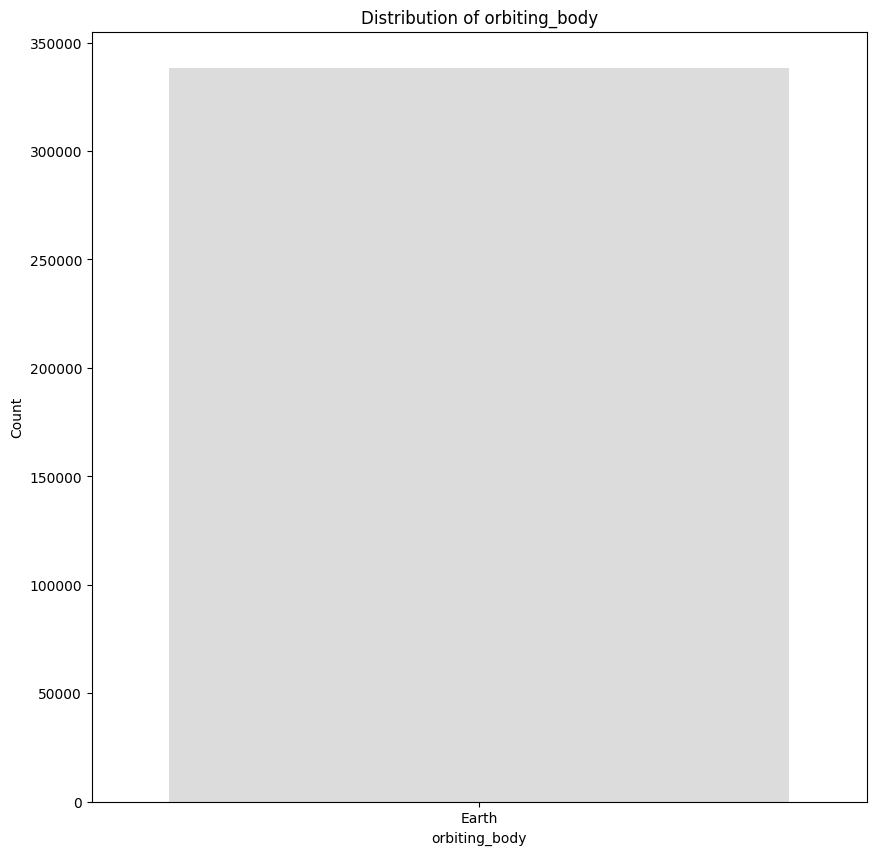

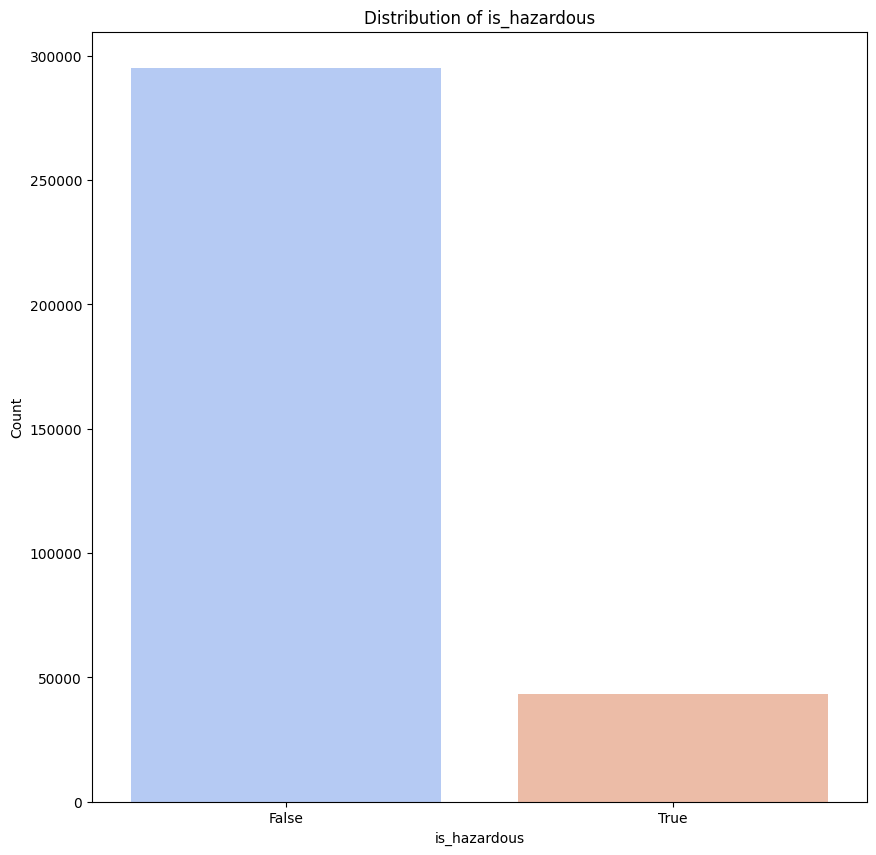

In [ ]:
# distriubutin for categorigal data


# Distribution of Categorical Features
categorical_cols = ['orbiting_body', 'is_hazardous']

for col in categorical_cols:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=col, data=df_nasa ,palette="coolwarm")
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()



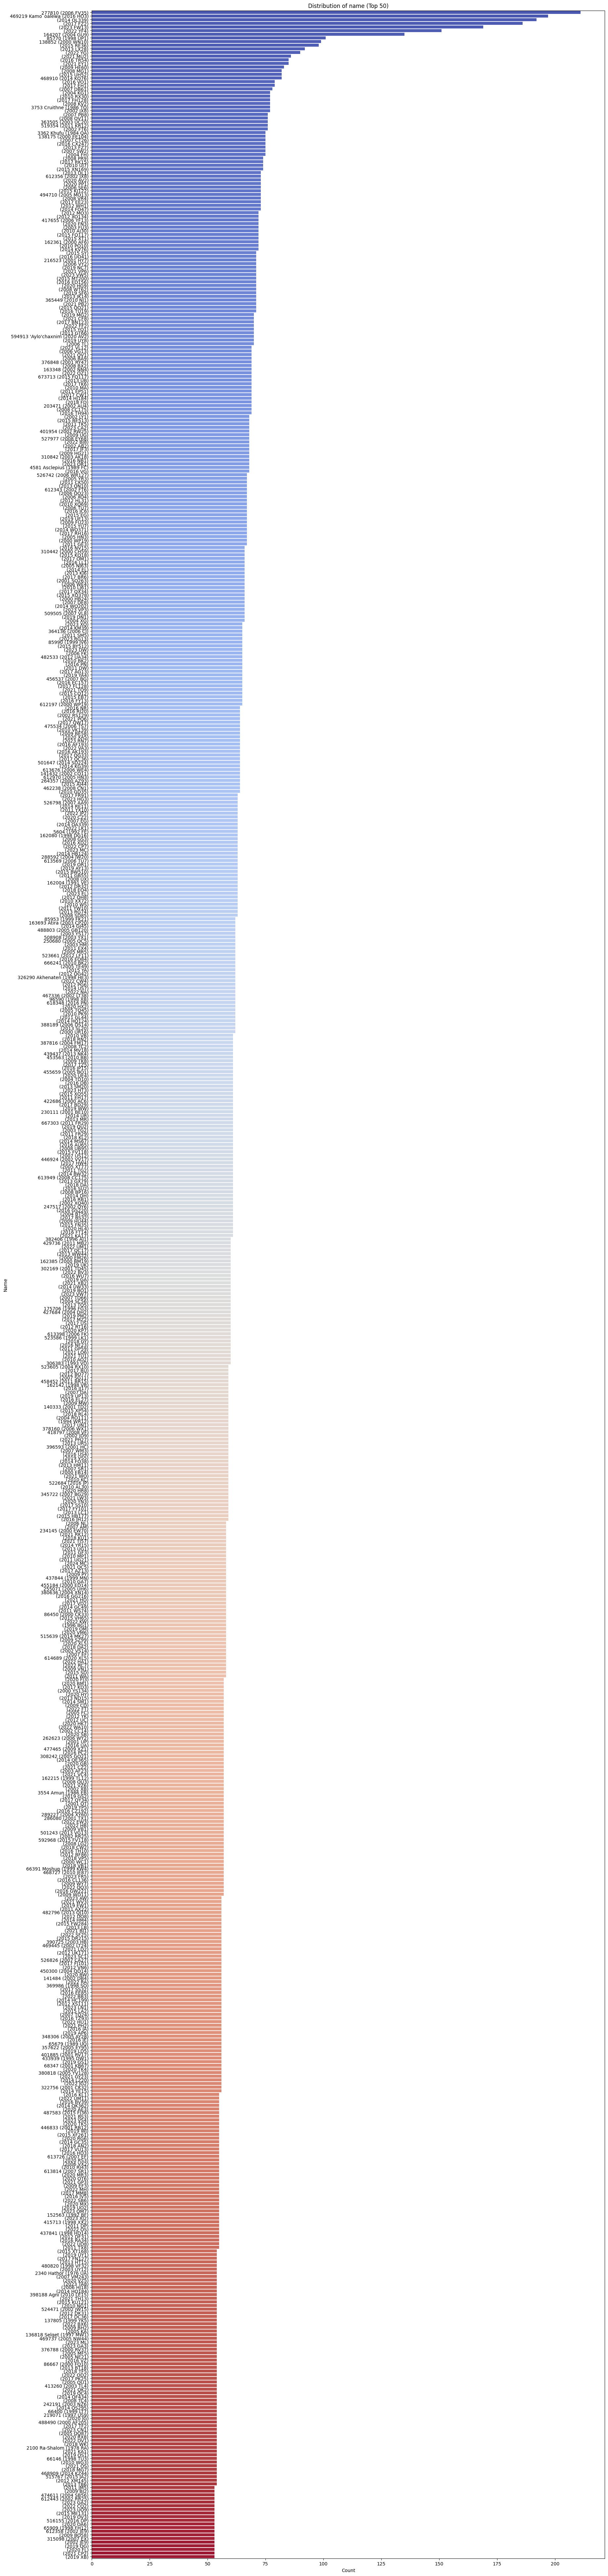

In [ ]:
# Distribution of Categorical Features for the 'name' column (first 50)
name_counts = df_nasa['name'].value_counts().nlargest(700)
plt.figure(figsize=(20, 100))  # Adjusted for horizontal orientation
sns.barplot(y=name_counts.index, x=name_counts.values,palette="coolwarm")  # Swapped x and y
plt.title(f'Distribution of name (Top 50)')
plt.xlabel('Count')
plt.ylabel('Name')
plt.show()


The Chi-square test:  is a statistical test used to determine if there is a significant association between two categorical variables.



Chi-square test for orbiting_body vs. is_hazardous:
Chi2 statistic: 0.0
P-value: 1.0
is_hazardous    False  True 
orbiting_body               
Earth          295009  43162


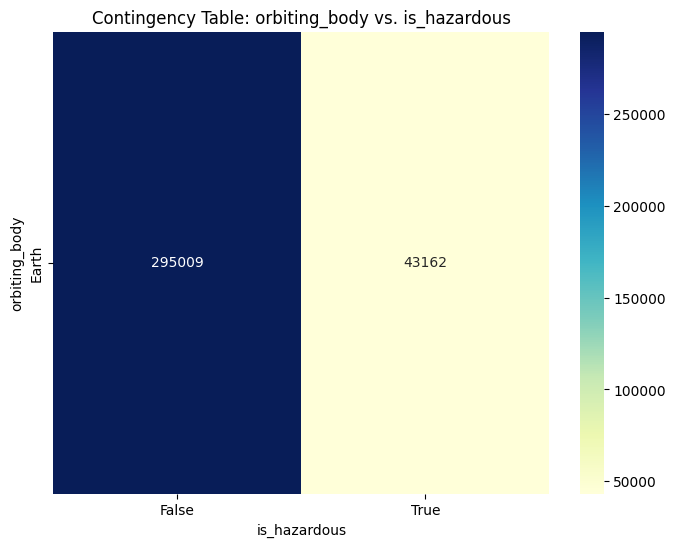

Chi-square test for name vs. is_hazardous:
Chi2 statistic: 338171.0
P-value: 0.0
is_hazardous              False  True 
name                                  
(1979 XB)                     0      1
(1982 YA)                    13      0
(1983 LC)                     0      9
(1986 NA)                     7      0
(1988 NE)                     5      0
...                         ...    ...
9950 ESA (1990 VB)            5      0
99799 (2002 LJ3)             19      0
99907 (1989 VA)              51      0
99935 (2002 AV4)             18      0
99942 Apophis (2004 MN4)      0     42

[33511 rows x 2 columns]


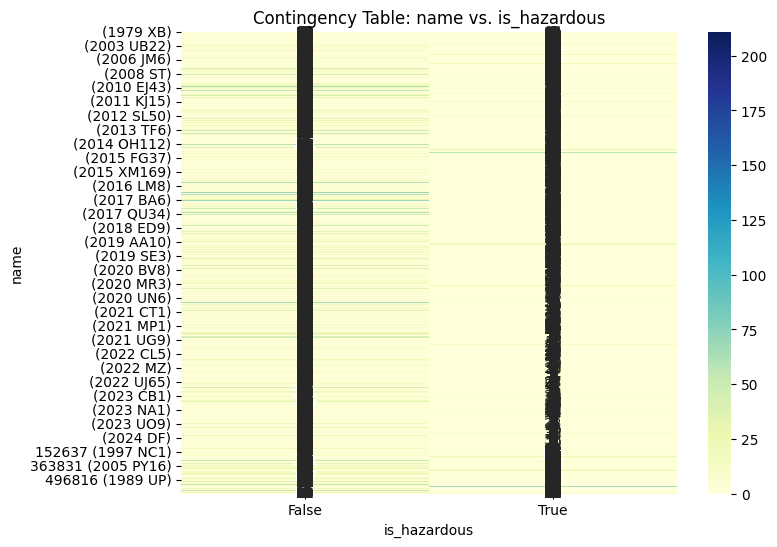

In [ ]:

# Analyze relationships between categorical features and the target variable
for col in ['orbiting_body', 'is_hazardous','name']:
    if col != 'is_hazardous':  # Exclude the target variable itself
        contingency_table = pd.crosstab(df_nasa[col], df_nasa['is_hazardous'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test for {col} vs. is_hazardous:")
        print(f"Chi2 statistic: {chi2}")
        print(f"P-value: {p}")
        print(contingency_table)
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
        plt.title(f'Contingency Table: {col} vs. is_hazardous')
        plt.show()

1️⃣ orbiting_body vs. is_hazardous

The Chi-square statistic is 0.0, meaning there is no variation in the distribution of is_hazardous across orbiting_body.

The p-value is 1.0, meaning there is no significant relationship between orbiting_body and is_hazardous.

This suggests that all objects in your dataset orbit Earth, so orbiting_body is not a useful feature for predicting hazard status.

2️⃣ name vs. is_hazardous

The Chi-square statistic is extremely high (338,171.0), indicating a very strong association.

The p-value is 0.0, meaning the relationship is highly significant.

The contingency table shows that some specific asteroid names only appear as hazardous, while others are only non-hazardous.

In [ ]:
# drop orbiting_body
df_nasa.drop("orbiting_body", axis=1, inplace=True)


since name is important feature , we will keep id instead of name to avoid step of encoding.

In [ ]:
df_nasa.drop("name", axis=1, inplace=True)

In [ ]:
df_nasa.columns

Index(['neo_id', 'absolute_magnitude', 'estimated_diameter_min',
       'estimated_diameter_max', 'relative_velocity', 'miss_distance',
       'is_hazardous'],
      dtype='object')

Numerical columns.

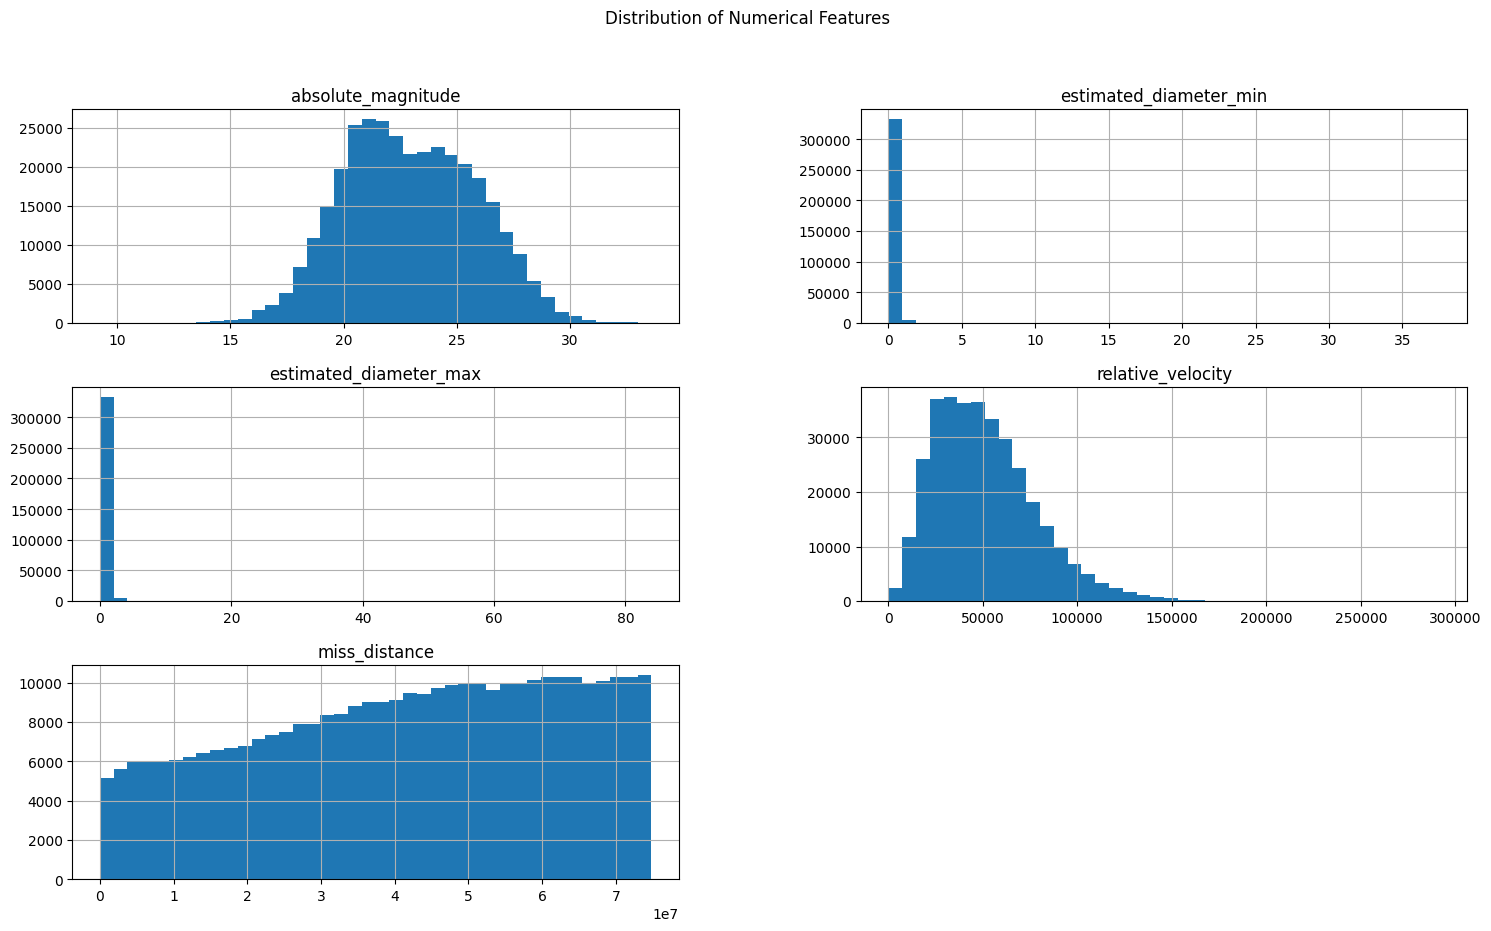

In [ ]:
df_nasa[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
         'relative_velocity', 'miss_distance']].hist(figsize=(18, 10), bins=40)
plt.suptitle("Distribution of Numerical Features")
plt.show()


1️⃣ Types of Bivariate Analysis & Best Plots

Bivariate analysis depends on the types of variables:

Feature Type	Best Plots

Numerical vs. Numerical:	Scatter Plot, Heatmap, Line Plot, Regression Plot

Categorical vs. Categorical:	Heatmap, Grouped Bar Chart, Mosaic Plot

Categorical vs. Numerical:	Box Plot, Violin Plot, Swarm Plot

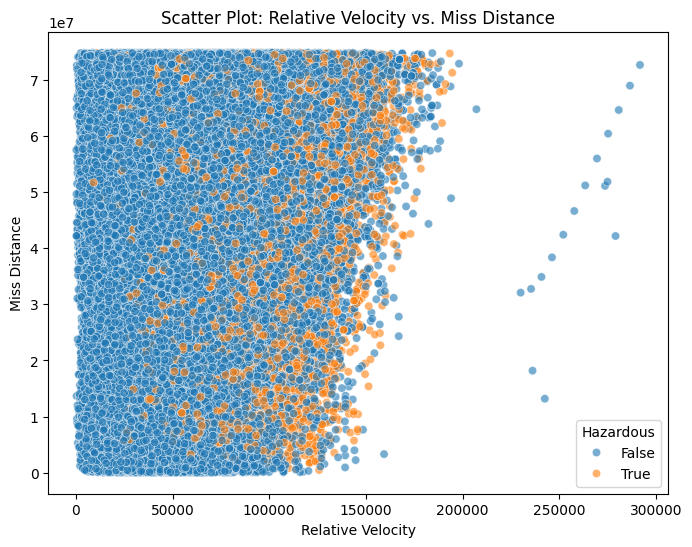

In [ ]:
#Use Case: Helps see patterns and outliers between relative velocity & miss distance

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_nasa, x='relative_velocity', y='miss_distance', hue='is_hazardous', alpha=0.6)
plt.title("Scatter Plot: Relative Velocity vs. Miss Distance")
plt.xlabel("Relative Velocity")
plt.ylabel("Miss Distance")
plt.legend(title="Hazardous")
plt.show()


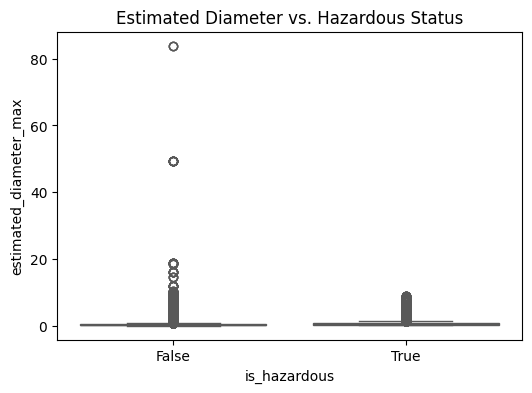

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_nasa, x='is_hazardous', y='estimated_diameter_max', palette="Set2")
plt.title("Estimated Diameter vs. Hazardous Status")
plt.show()


***2 feature selection***

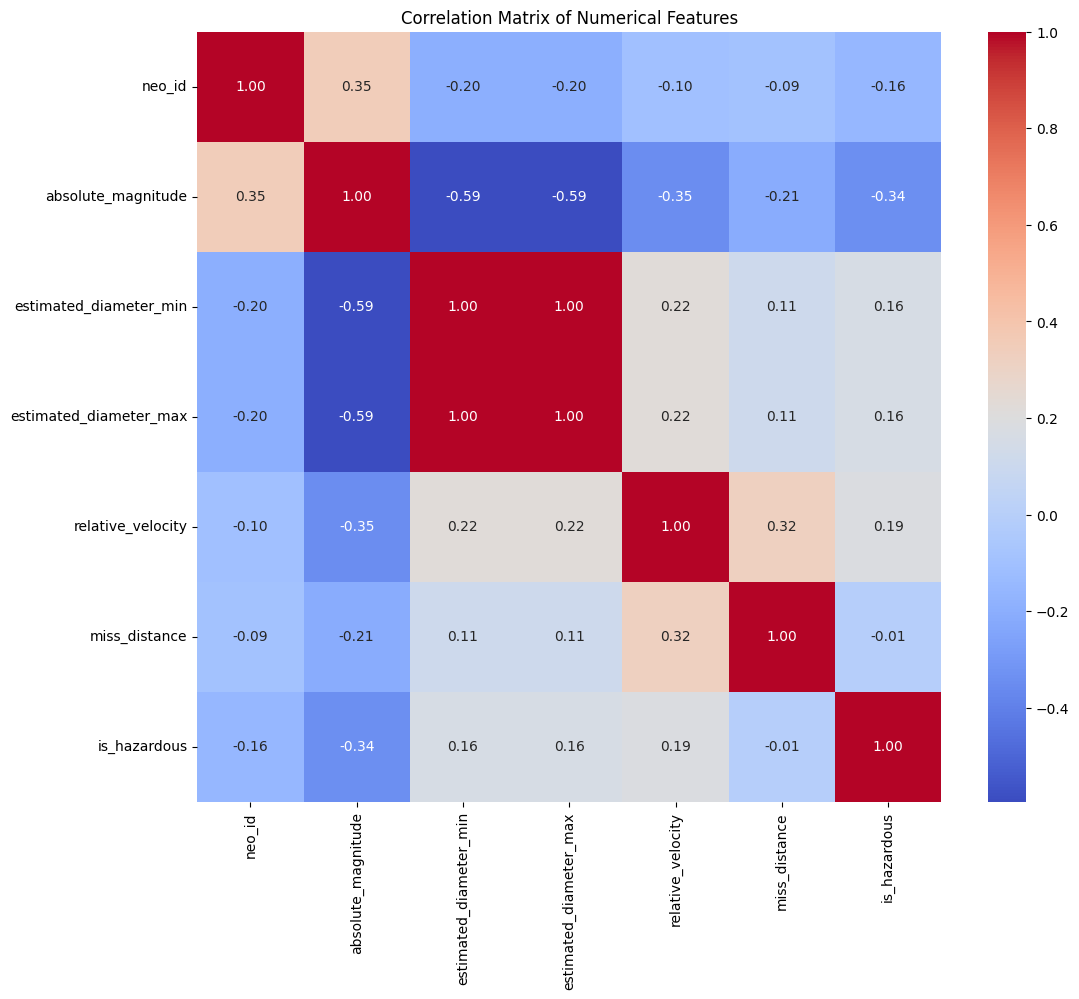

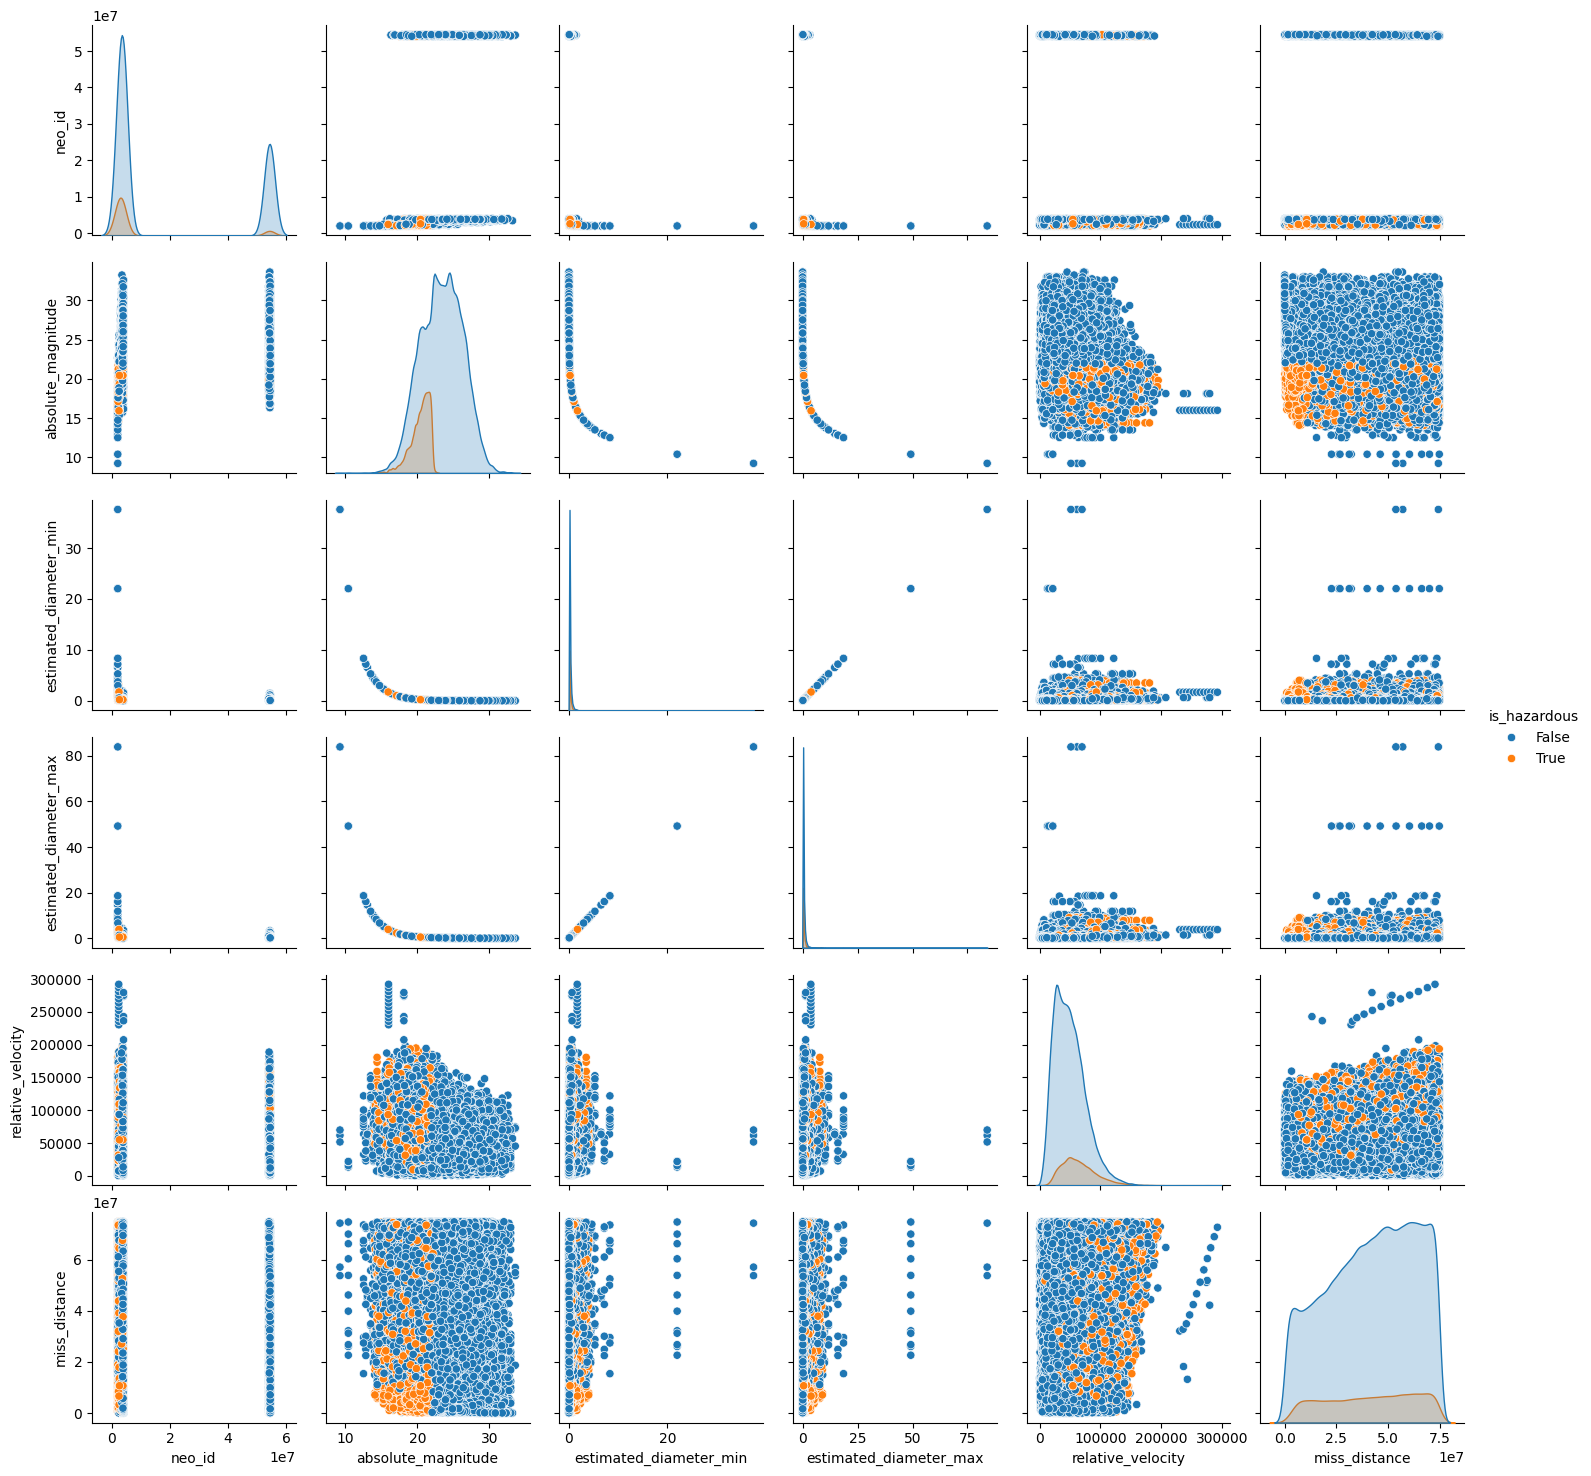

In [ ]:
# relation between faetures

# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_nasa.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pair Plots
sns.pairplot(df_nasa, hue='is_hazardous')
plt.show()


In [ ]:
# check
print(df_nasa['neo_id'].nunique(), df_nasa.shape[0])


33511 338171


drop one of coorlated columns
drop low related columns with target.

In [ ]:
df_without_drop = df_nasa.copy()

df_with_drop = df_nasa.copy()
df_with_drop.drop("miss_distance", axis=1, inplace=True)
df_with_drop.drop("estimated_diameter_min", axis=1, inplace=True)

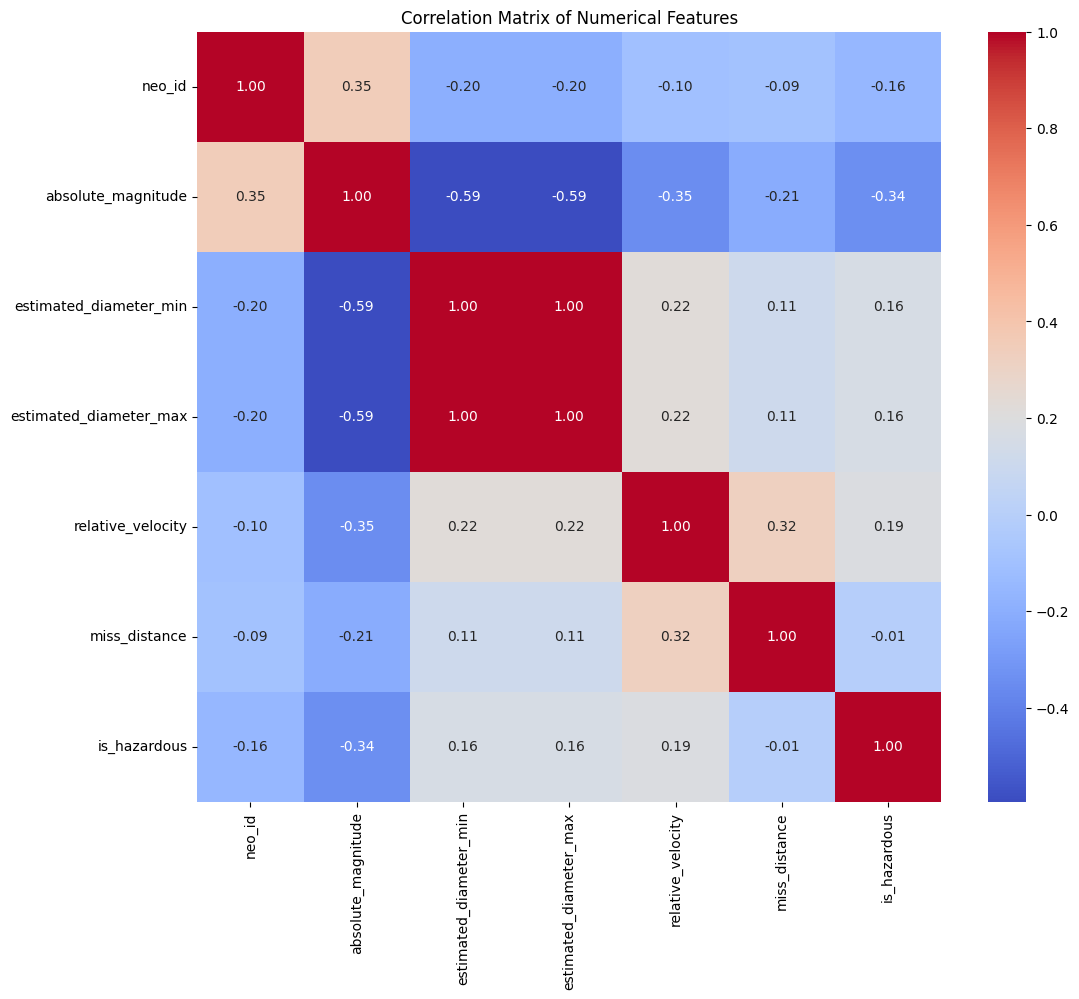

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_nasa.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


***3️⃣ Detecting Outliers***

(A) Using Box Plot

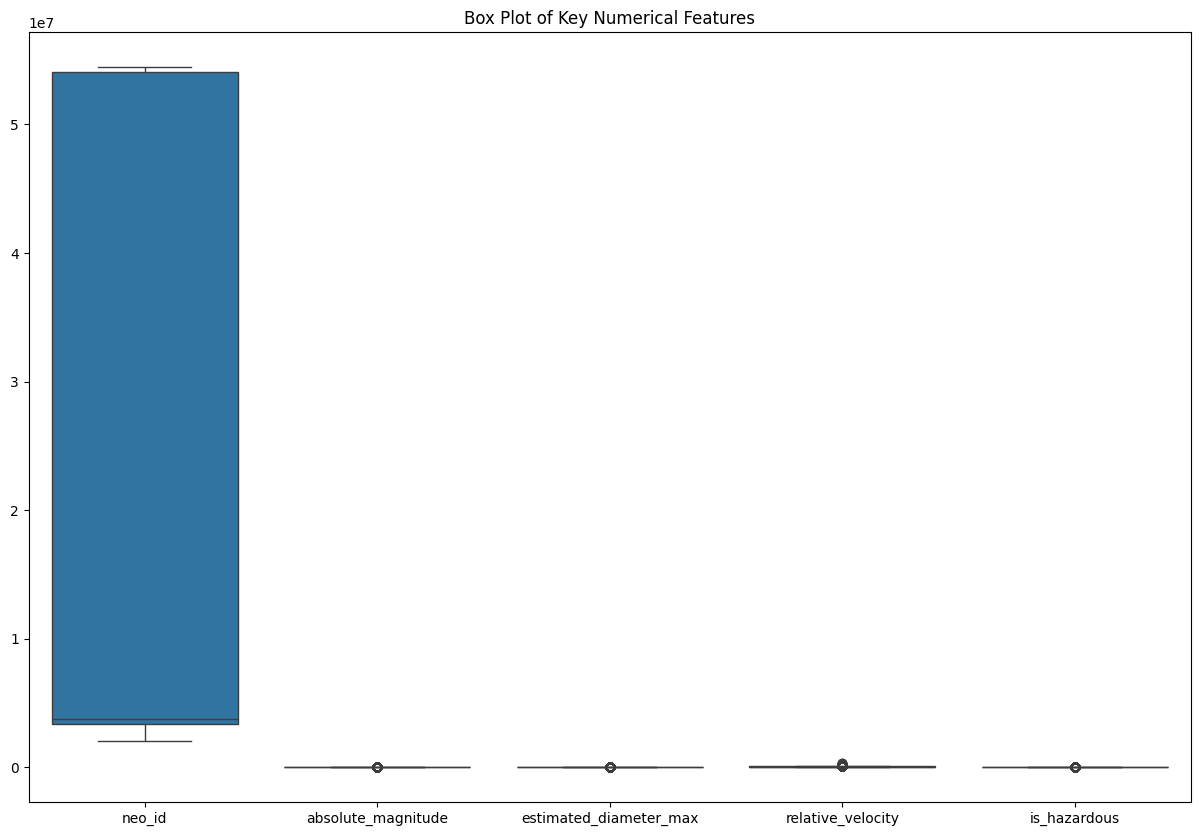

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_with_drop)
plt.title("Box Plot of Key Numerical Features")
plt.show()
#df_without_drop


(B) Using Z-Score

Empirical Rule (68-95-99.7 Rule)

For normally distributed data, the probability of data falling within Z-scores is:

68% of data within ±1 standard deviation

95% of data within ±2 standard deviations

99.7% of data within ±3 standard deviations

🔹 If a Z-score is greater than ±3, it means the value is in the top 0.3% of extreme values, making it a strong candidate for an outlier.

In [ ]:

#A high absolute Z-score means the value is far from the mean, which might indicate an outlier.
def detect_outliers_zscore(data):
    z_scores = data.apply(zscore)
    outliers = (z_scores.abs() > 3).sum()
    return outliers

outliers1 = detect_outliers_zscore(df_with_drop)
outliers2 = detect_outliers_zscore(df_without_drop)
print(outliers1)
print(outliers2)


neo_id                       0
absolute_magnitude         388
estimated_diameter_max    4230
relative_velocity         3079
is_hazardous                 0
dtype: int64
neo_id                       0
absolute_magnitude         388
estimated_diameter_min    4230
estimated_diameter_max    4230
relative_velocity         3079
miss_distance                0
is_hazardous                 0
dtype: int64


(C) Using IQR (Interquartile Range)

In [ ]:
# Columns to check for outliers

def detect_outliers_iqr(data):
    columns = data.select_dtypes(include=np.number).columns.tolist()
    outliers = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_condition = (data[column] < lower_bound) | (data[column] > upper_bound)
        outliers[column] = outlier_condition.sum()  # Count the number of outliers
    return outliers

outliers1 = detect_outliers_iqr(df_with_drop)
outliers2 = detect_outliers_iqr(df_without_drop)
print(outliers1)
print(outliers2)


{'neo_id': 0, 'absolute_magnitude': 389, 'estimated_diameter_max': 26166, 'relative_velocity': 5448}
{'neo_id': 0, 'absolute_magnitude': 389, 'estimated_diameter_min': 26166, 'estimated_diameter_max': 26166, 'relative_velocity': 5448, 'miss_distance': 0}


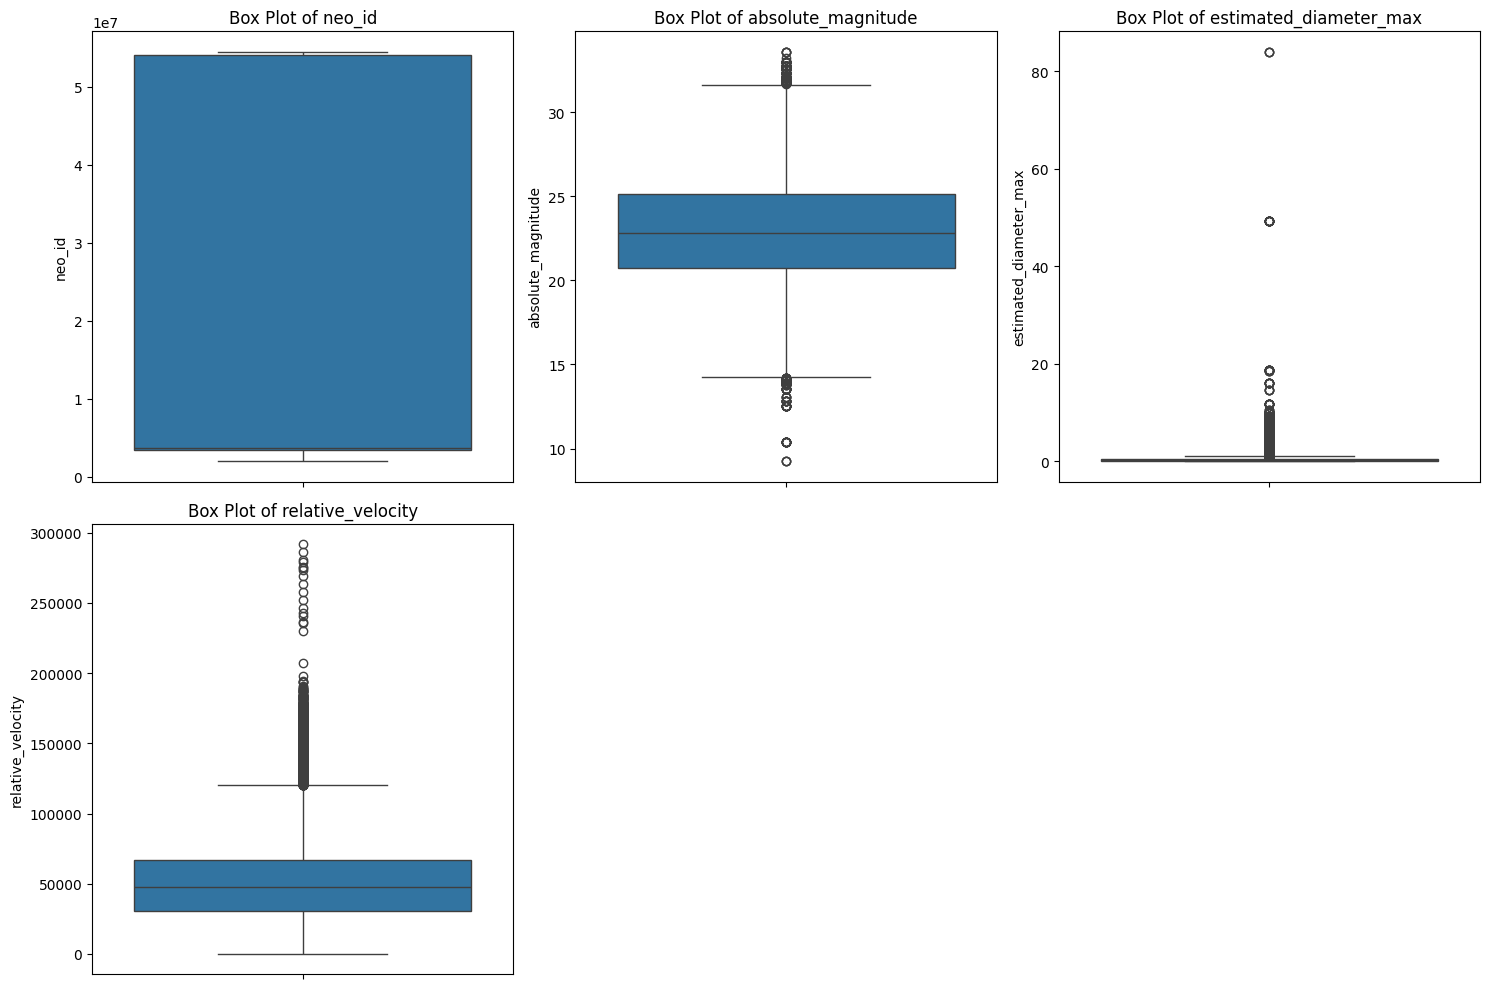

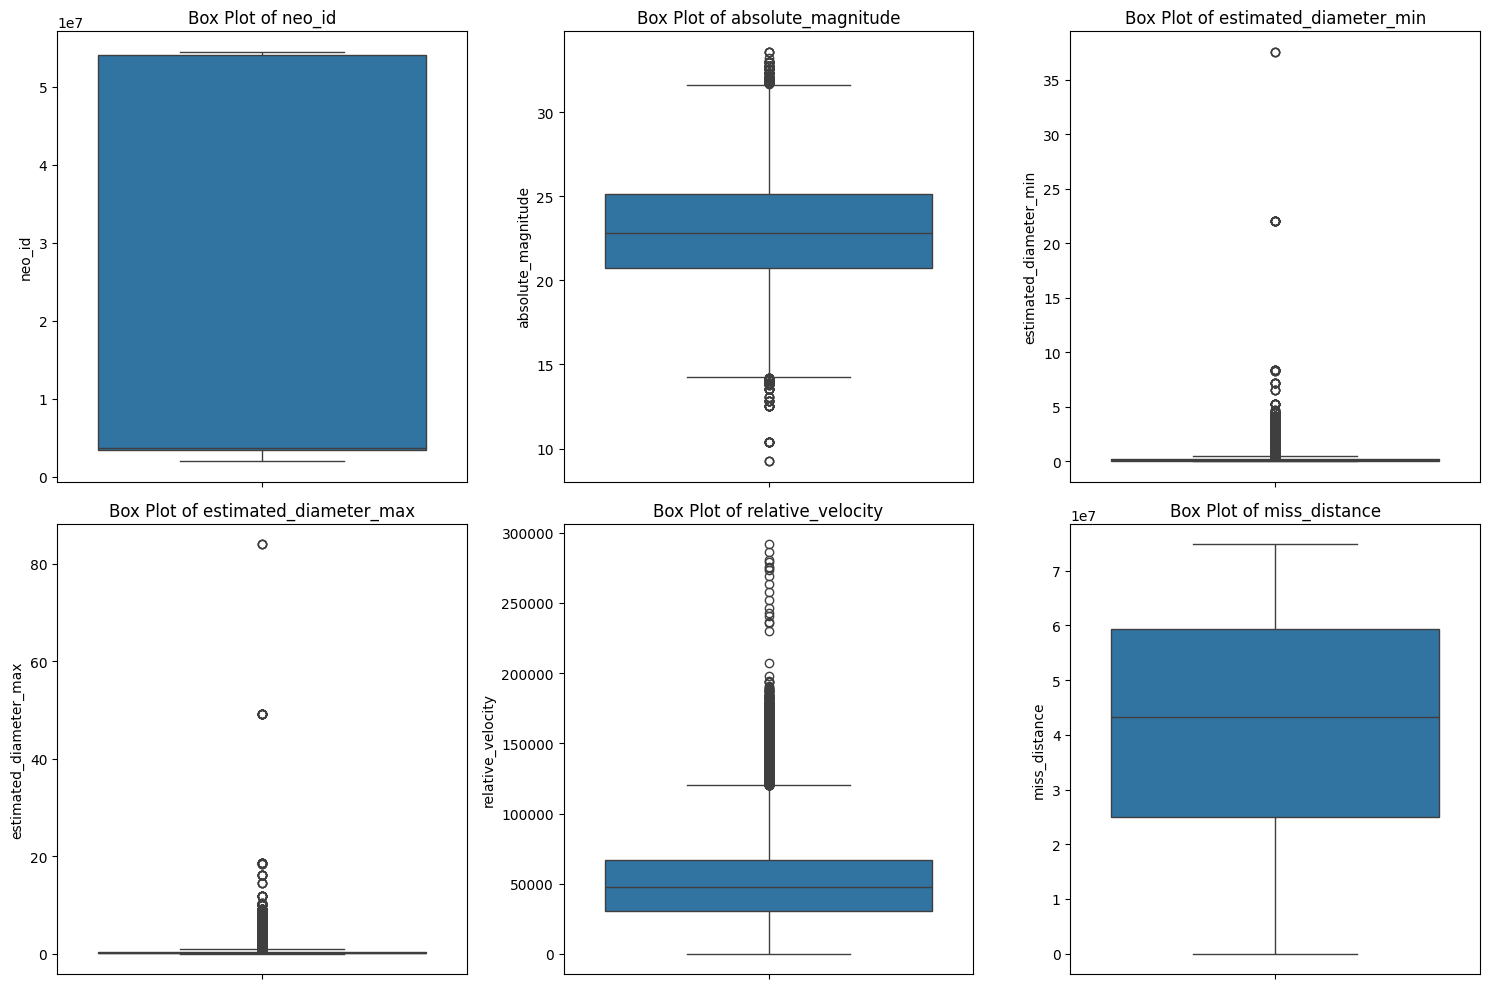

"\n# Select numerical columns with detected outliers\noutlier_columns = ['relative_velocity', 'estimated_diameter_max', 'absolute_magnitude']\n\n# Plot histograms\nplt.figure(figsize=(12, 8))\nfor i, col in enumerate(outlier_columns, 1):\n    plt.subplot(2, 2, i)\n    sns.histplot(df_nasa[col], bins=50, kde=True, color='blue')\n    plt.title(f'Histogram of {col}')\nplt.tight_layout()\nplt.show()"

In [ ]:
def plot_outliers(data):
    columns = data.select_dtypes(include=np.number).columns.tolist()
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(data[column])
        plt.title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

plot_outliers(df_with_drop)
plot_outliers(df_without_drop)



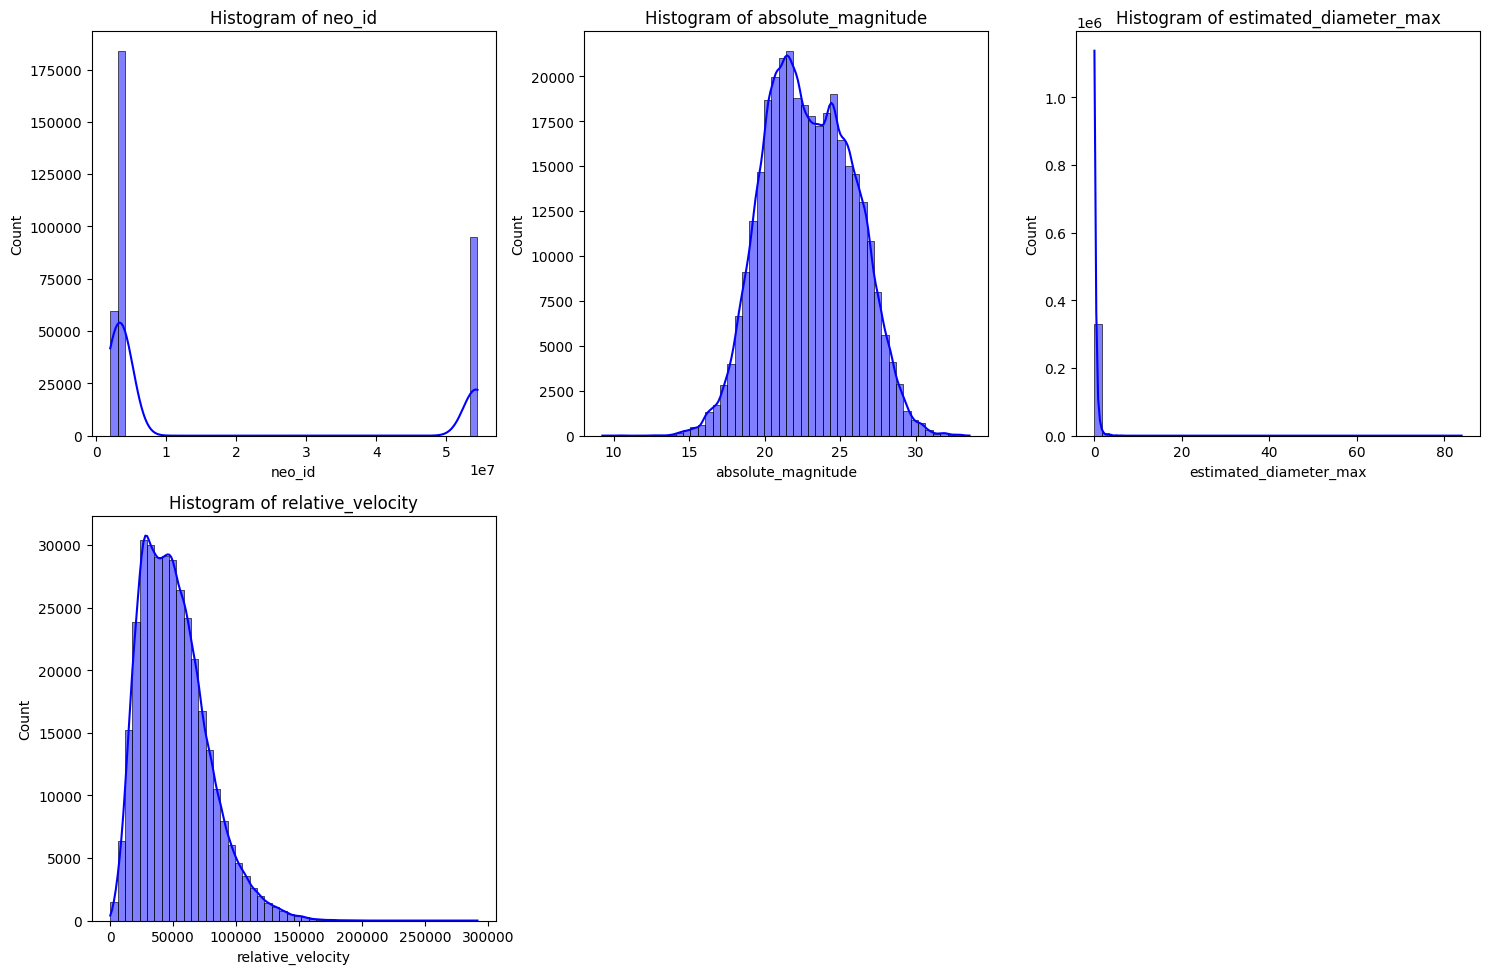

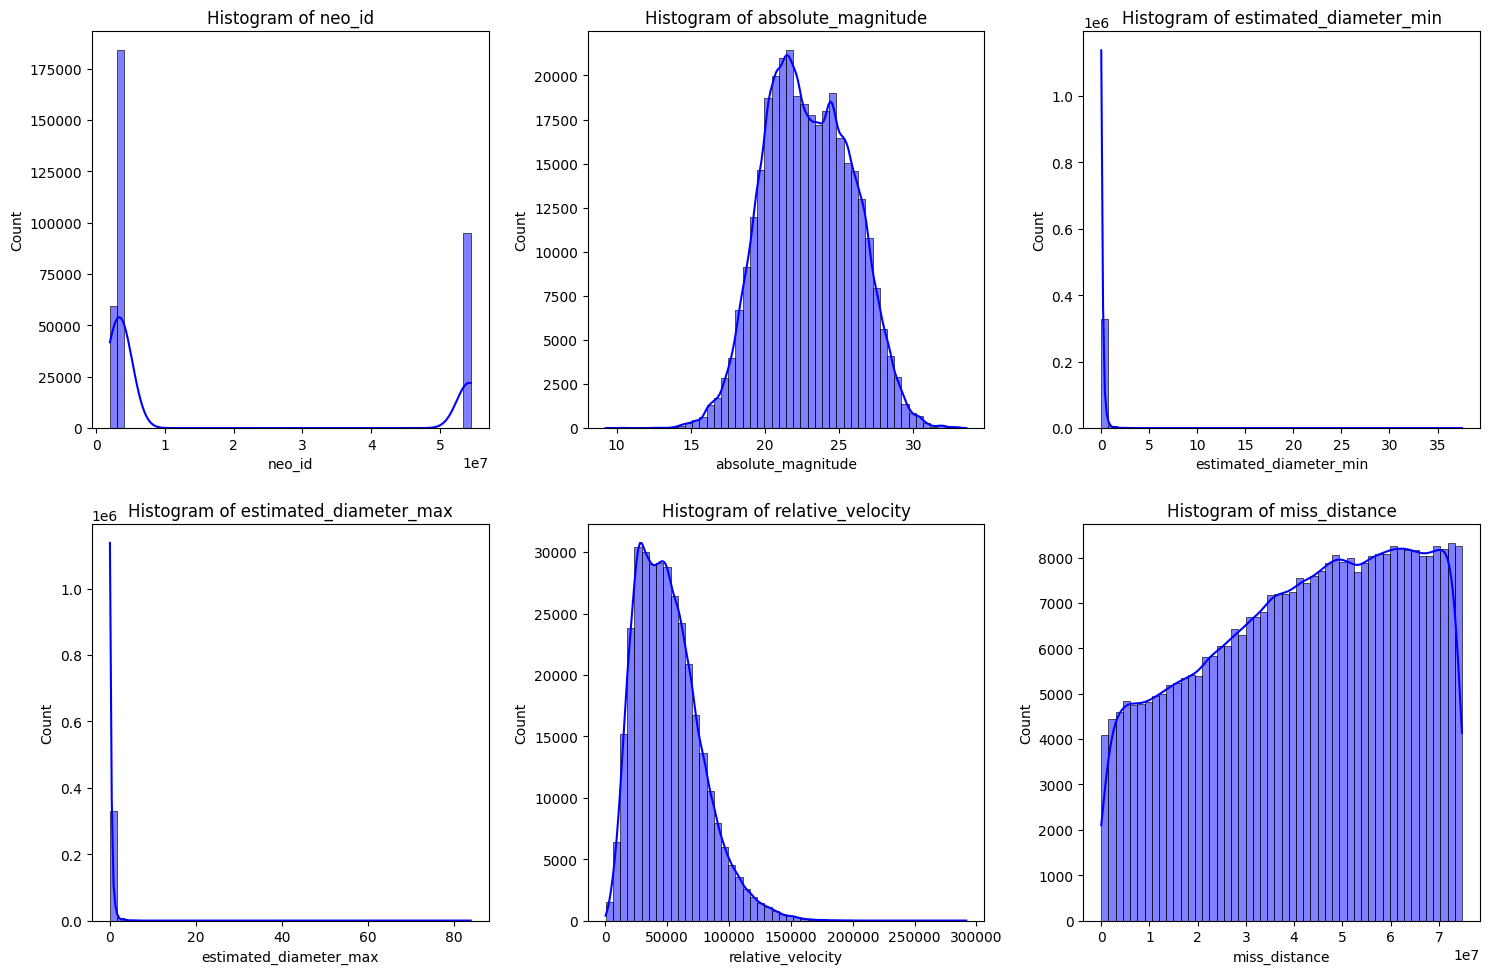

"\n# Select numerical columns with detected outliers\noutlier_columns = ['relative_velocity', 'estimated_diameter_max', 'absolute_magnitude']\n\n# Plot histograms\nplt.figure(figsize=(12, 8))\nfor i, col in enumerate(outlier_columns, 1):\n    plt.subplot(2, 2, i)\n    sns.histplot(df_nasa[col], bins=50, kde=True, color='blue')\n    plt.title(f'Histogram of {col}')\nplt.tight_layout()\nplt.show()"

In [ ]:
def plot_histograms(data):
    columns = data.select_dtypes(include=np.number).columns.tolist()
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data[column], bins=50, kde=True, color='blue')
        plt.title(f'Histogram of {column}')
    plt.tight_layout()
    plt.show()

plot_histograms(df_with_drop)
plot_histograms(df_without_drop)


Observations from Your Plots:

Relative Velocity:

Shows extreme right-skewness (high values far from the main distribution).

Several high outliers beyond Q3, suggesting a long-tailed distribution.

Estimated Diameter Max:

Some significant outliers on the upper end.

The main data distribution is concentrated within a smaller range.

Absolute Magnitude:

Fewer outliers compared to the other features.

Mostly a well-behaved distribution, with a few extreme values.

In [ ]:

def detect_outliers_iqr(data, column):
    Q1 = np.percentile(data[column], 25)
    Q3 = np.percentile(data[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

outliers1 = detect_outliers_iqr(df_nasa, 'relative_velocity')
outliers1


neo_id  absolute_magnitude  estimated_diameter_min  \
124      2434188              19.090                0.404162   
133      3653602              22.310                0.091739   
139      3739078              19.830                0.287445   
203     54418268              20.030                0.262153   
218      2386454              20.030                0.262153   
...          ...                 ...                     ...   
337663   3739621              20.440                0.217048   
337665  54017368              22.400                0.088015   
337683  54448599              19.331                0.361705   
337720  54200300              21.020                0.166171   
337905  54162300              20.610                0.200704   

        estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  
124                   0.903733      139874.081716   5.526815e+07          True  
133                   0.205135      151827.050327   7.158414e+07         False  
139                   0.642747      129838.322602   4.309481e+07         False  
203                   0.586192      164228.326812   6.405915e+07         False  
218                   0.586192      125128.919091   1.241808e+07          True  
...                        ...                ...            ...           ...  
337663                0.485333      125808.413901   7.147257e+07         False  
337665                0.196807      124434.487475   3.675039e+07         False  
337683                0.808798      150561.839319   4.314000e+07         False  
337720                0.371569      124449.114926   4.666045e+07          True  
337905                0.448787      127696.913889   3.188228e+07         False  

[5448 rows x 7 columns]

In [ ]:
# get the percent of outliers in each column alone

def outlier_percentage(df, column):
    """
    Calculates the percentage of outliers in a given column using the IQR method.

    Args:
        df: The pandas DataFrame.
        column: The name of the column to analyze.

    Returns:
        The percentage of outliers in the column.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return (len(outliers) / len(df)) * 100

# Example usage (assuming df_nasa is your DataFrame):
columns = df_with_drop.select_dtypes(include=np.number).columns.tolist()

for col in columns:
    percentage = outlier_percentage(df_with_drop, col)
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")


Percentage of outliers in neo_id: 0.00%
Percentage of outliers in absolute_magnitude: 0.12%
Percentage of outliers in estimated_diameter_max: 7.74%
Percentage of outliers in relative_velocity: 1.61%


In [ ]:
columns_without = df_without_drop.select_dtypes(include=np.number).columns.tolist()

for col in columns_without:
    percentage = outlier_percentage(df_without_drop, col)
    print(f"Percentage of outliers in {col}: {percentage:.2f}%")

Percentage of outliers in neo_id: 0.00%
Percentage of outliers in absolute_magnitude: 0.12%
Percentage of outliers in estimated_diameter_min: 7.74%
Percentage of outliers in estimated_diameter_max: 7.74%
Percentage of outliers in relative_velocity: 1.61%
Percentage of outliers in miss_distance: 0.00%


In [ ]:
df_without_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   absolute_magnitude      338171 non-null  float64
 2   estimated_diameter_min  338171 non-null  float64
 3   estimated_diameter_max  338171 non-null  float64
 4   relative_velocity       338171 non-null  float64
 5   miss_distance           338171 non-null  float64
 6   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1)
memory usage: 18.4 MB


In [ ]:
outliers2 = detect_outliers_iqr(df_nasa, 'estimated_diameter_min')
outliers2

neo_id  absolute_magnitude  estimated_diameter_min  \
1       2349507               18.50                0.530341   
13      2162635               16.71                1.209358   
18      2284422               17.36                0.896510   
22      2052387               17.77                0.742258   
26      2408980               18.71                0.481454   
...         ...                 ...                     ...   
338121  2413216               18.85                0.451393   
338149  2415029               15.94                1.724070   
338169  2175921               18.32                0.576176   
338170  2185851               18.32                0.576176   
338188  2482055               18.42                0.550244   

        estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  
1                     1.185878      109949.757148   5.580105e+07          True  
13                    2.704207       12703.788572   6.958943e+07         False  
18                    2.004657       99804.739017   5.519530e+07         False  
22                    1.659740       57915.566421   6.028892e+07         False  
26                    1.076564       81627.976782   3.776900e+07         False  
...                        ...                ...            ...           ...  
338121                1.009346       61749.492179   6.751558e+07         False  
338149                3.855138       93176.009539   6.641212e+06          True  
338169                1.288368       56806.498531   6.108673e+07         False  
338170                1.288368       31245.887432   3.197571e+07          True  
338188                1.230382       93379.673199   3.520893e+07         False  

[26166 rows x 7 columns]

In [ ]:
outliers3 = detect_outliers_iqr(df_nasa, 'absolute_magnitude')
outliers3

neo_id  absolute_magnitude  estimated_diameter_min  \
338      2000887               13.88                4.451998   
1086     3892165               32.00                0.001058   
3444     3892165               32.00                0.001058   
4101     2002212               13.51                5.279040   
4206     2001036                9.25               37.545248   
...          ...                 ...                     ...   
333053   3989456               32.56                0.000818   
335432   3556206               32.10                0.001011   
335797  54380194               32.32                0.000913   
337017   3892775               31.70                0.001215   
337161  54434763               31.77                0.001176   

        estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  
338                   9.954971       24497.250026   4.795258e+07         False  
1086                  0.002366       52253.106580   2.244544e+07         False  
3444                  0.002366       38999.624151   4.630788e+06         False  
4101                 11.804293      152450.609939   6.870373e+07         False  
4206                 83.953727       61537.325800   5.705108e+07         False  
...                        ...                ...            ...           ...  
333053                0.001828       69659.313841   1.394139e+07         False  
335432                0.002260       16649.325820   4.328877e+06         False  
335797                0.002042       25506.946368   6.727844e+07         False  
337017                0.002717       22816.009735   2.983863e+06         False  
337161                0.002631       70062.393291   1.555513e+04         False  

[389 rows x 7 columns]

In [ ]:
correlation_matrix = df_without_drop.corr()
print(correlation_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187034
estimated_diameter_min    0.164841
estimated_diameter_max    0.164841
miss_distance            -0.006542
neo_id                   -0.156769
absolute_magnitude       -0.343996
Name: is_hazardous, dtype: float64


In [ ]:
df = df_without_drop.drop(columns=['neo_id'], axis=1)
correlation_matrix = df.corr()
print(correlation_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187034
estimated_diameter_min    0.164841
estimated_diameter_max    0.164841
miss_distance            -0.006542
absolute_magnitude       -0.343996
Name: is_hazardous, dtype: float64


In [ ]:

#data with handling outliers

def handling_outliers(data):
    #1. Use Winsorization for Relative Velocity
    #Since the histogram shows skewness and the box plot confirms extreme outliers, capping the top 5% values (Winsorization) will prevent these extreme values from dominating.

    data['relative_velocity'] = winsorize(data['relative_velocity'], limits=[0, 0.0161])

    #2. Apply Log Transformation for Estimated Diameter Max
    #Since this feature has a long tail, applying log1p() will compress extreme values and make the distribution more normal:

    data['estimated_diameter_max'] = np.log1p(data['estimated_diameter_max'])
    data['estimated_diameter_min'] = np.log1p(data['estimated_diameter_min'])


    #3. Leave Absolute Magnitude As Is or Apply Light Winsorization
    #The distribution looks mostly fine, with only a few extreme values.
    #If needed, cap only the top 1% outliers:
    data['absolute_magnitude'] = winsorize(data['absolute_magnitude'], limits=[0.001, 0.001])
    return data

data_with_outliers = df.copy()
data_without_outliers = handling_outliers(df)
data_without_outliers
#assume no feature selection first



absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.332867                0.632952   
1                   18.500                0.425490                0.782018   
2                   21.450                0.127794                0.266063   
3                   20.630                0.181374                0.367882   
4                   22.700                0.073861                0.158209   
...                    ...                     ...                     ...   
338194              28.580                0.005099                0.011365   
338195              28.690                0.004847                0.010807   
338196              21.919                0.104215                0.219623   
338197              23.887                0.043420                0.094609   
338198              22.951                0.066059                0.142107   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

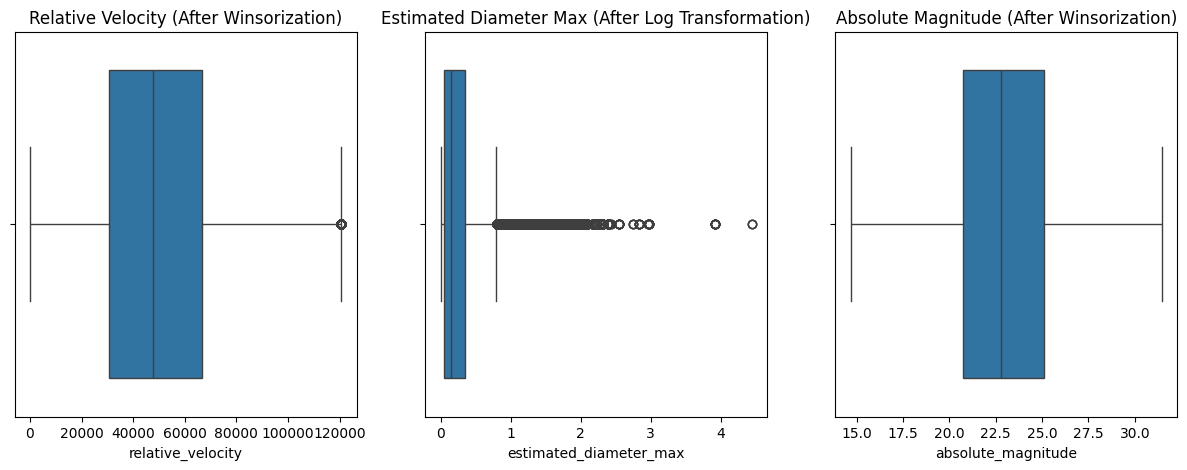

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=data_without_outliers['relative_velocity'], ax=axes[0])
axes[0].set_title("Relative Velocity (After Winsorization)")

sns.boxplot(x=data_without_outliers['estimated_diameter_max'], ax=axes[1])
axes[1].set_title("Estimated Diameter Max (After Log Transformation)")

sns.boxplot(x=data_without_outliers['absolute_magnitude'], ax=axes[2])
axes[2].set_title("Absolute Magnitude (After Winsorization)")

plt.show()

results conclusion:

outliers detectes in ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity']

Apply changes upon resilts of outliers anf feature selection

# 3. Data Preprocessing:

In [ ]:
#data_with_outliers
df = data_with_outliers
#data_without_outliers
df_wo = data_without_outliers

1- spliting data

In [ ]:
# Separate features (X) and target (y)
X = df.drop('is_hazardous', axis=1)
y = df['is_hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
y.value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

2- scaling

In [ ]:
y_test.value_counts()

is_hazardous
False    59002
True      8633
Name: count, dtype: int64

In [ ]:
y_train.value_counts()

is_hazardous
False    236007
True      34529
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use same transformation

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                -0.230954               -0.198573               -0.198573   
1                -0.563973               -0.035211               -0.035211   
2                -0.780264                0.117418                0.117418   
3                 1.691629               -0.466654               -0.466654   
4                 0.915729               -0.426354               -0.426354   
...                    ...                     ...                     ...   
270531           -1.175080                0.540608                0.540608   
270532           -1.144181                0.498821                0.498821   
270533            1.708795               -0.467155               -0.467155   
270534           -1.116716                0.463103                0.463103   
270535            0.812734               -0.417123               -0.417123   

        relative_velocity  miss_distance  
0                0.226759       0.701173  
1                0.852273      -0.321620  
2                1.848906       1.335687  
3               -0.942463      -0.832247  
4               -0.501739      -0.625826  
...                   ...            ...  
270531           1.737703      -0.866257  
270532           1.276397       0.712077  
270533          -0.308685      -1.951395  
270534          -0.892312      -0.347368  
270535          -0.222524      -1.203622  

[270536 rows x 5 columns]

# ***trials before balancing***

df , df_wo

In [ ]:

"""
High precision means fewer false positives.
High recall means fewer false negatives.
F1-score: Useful when dealing with imbalanced datasets.

ROC AUC (Receiver Operating Characteristic - Area Under Curve):

Measures the model's ability to distinguish between classes.
The ROC curve plots True Positive Rate vs. False Positive Rate.
AUC score ranges from 0 to 1 (higher is better, 0.5 is random guessing).

"""

def evaluate_model(model, X_test, y_test):
    """
    Evaluates a classification model using various performance metrics and visualizations.

    Args:
        model: Trained classification model.
        X_test: Test feature set.
        y_test: True labels for the test set.

    Displays:
        - Accuracy, Precision, Recall, F1-score, and ROC AUC score.
        - Confusion Matrix as a heatmap.
        - ROC Curve visualization.
    """
    # Predictions
    y_pred = model.predict(X_test)                 # Class predictions
    y_prob = model.predict_proba(X_test)[:, 1]     # Probability of positive class

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print metrics
    print("=== Evaluation Metrics ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}\n")

    print("=== Classification Report ===")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random model
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()



In [ ]:
# 1️⃣ Linear Models
linear_models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis()
}

# 2️⃣ Distance-Based Models
distance_based_models ={
    "KNeighborsClassifier": KNeighborsClassifier()
}

# 3️⃣ Tree-Based Models
tree_based_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier()
}

Evaluating Logistic Regression...
Training Accuracy: 0.8720
=== Evaluation Metrics ===
Accuracy: 0.8715
Precision: 0.4787
Recall: 0.0729
F1-score: 0.1265
ROC AUC Score: 0.8407

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59002
        True       0.48      0.07      0.13      8633

    accuracy                           0.87     67635
   macro avg       0.68      0.53      0.53     67635
weighted avg       0.83      0.87      0.83     67635



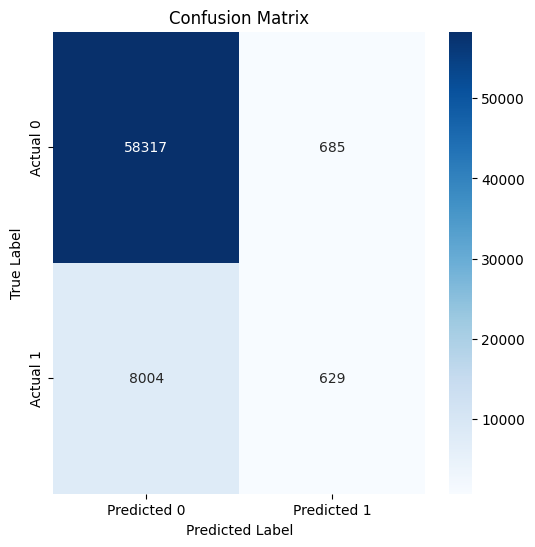

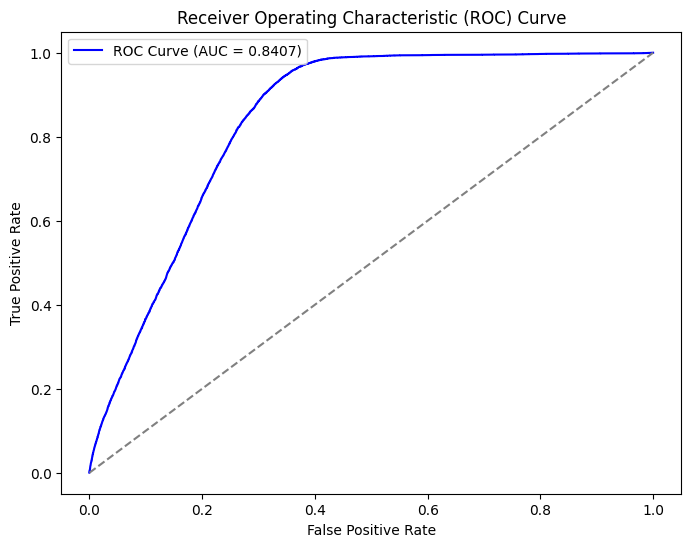

----------------------------------------------------------------------------------------------
Evaluating Linear Discriminant Analysis...
Training Accuracy: 0.8685
=== Evaluation Metrics ===
Accuracy: 0.8679
Precision: 0.3680
Recall: 0.0488
F1-score: 0.0861
ROC AUC Score: 0.8356

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.88      0.99      0.93     59002
        True       0.37      0.05      0.09      8633

    accuracy                           0.87     67635
   macro avg       0.62      0.52      0.51     67635
weighted avg       0.81      0.87      0.82     67635



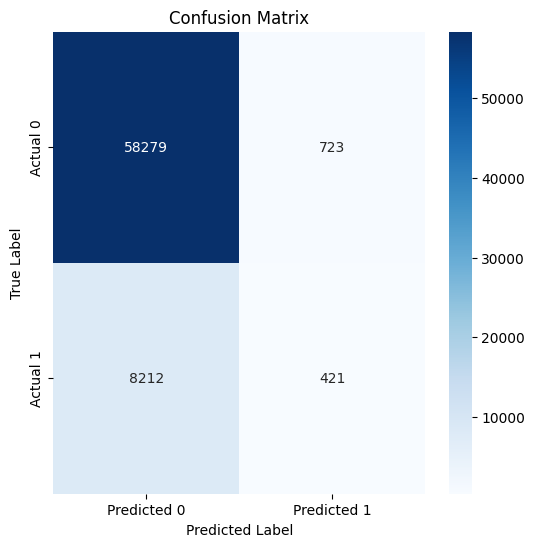

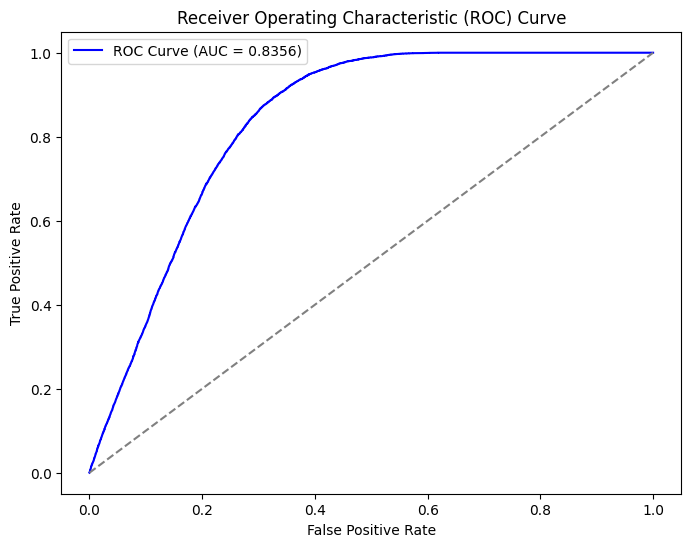

----------------------------------------------------------------------------------------------
Evaluating Quadratic Discriminant Analysis...
Training Accuracy: 0.8506
=== Evaluation Metrics ===
Accuracy: 0.8511
Precision: 0.3929
Recall: 0.3055
F1-score: 0.3437
ROC AUC Score: 0.8524

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.90      0.93      0.92     59002
        True       0.39      0.31      0.34      8633

    accuracy                           0.85     67635
   macro avg       0.65      0.62      0.63     67635
weighted avg       0.84      0.85      0.84     67635



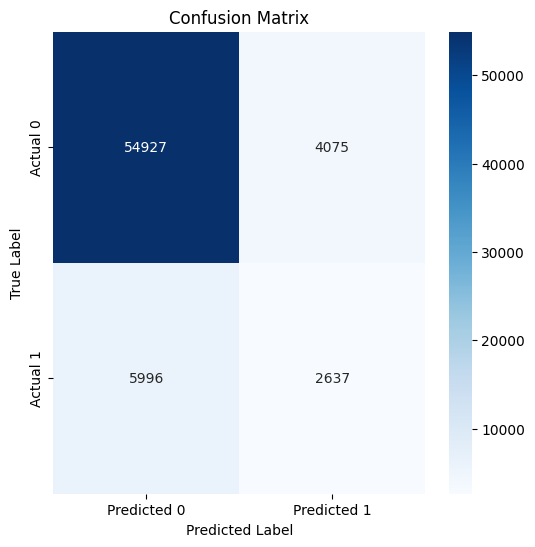

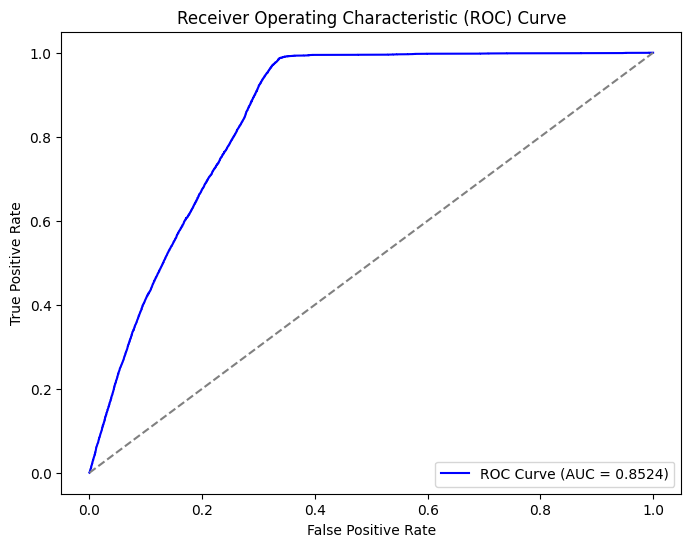

----------------------------------------------------------------------------------------------


In [ ]:


def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}...")
        model.fit(X_train, y_train)
        train_accuracy = model.score(X_train, y_train)
        print(f"Training Accuracy: {train_accuracy:.4f}")
        evaluate_model(model, X_test, y_test)
        print("----------------------------------------------------------------------------------------------")


# Example usage with the combined model dictionary
all_models = {**linear_models, **distance_based_models, **tree_based_models}
evaluate_models(linear_models, X_train_scaled, y_train, X_test_scaled, y_test)


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix['is_hazardous'].sort_values(ascending=False))

is_hazardous              1.000000
relative_velocity         0.187034
estimated_diameter_min    0.164841
estimated_diameter_max    0.164841
miss_distance            -0.006542
absolute_magnitude       -0.343996
Name: is_hazardous, dtype: float64


Evaluating KNeighborsClassifier...
Training Accuracy: 0.9182
=== Evaluation Metrics ===
Accuracy: 0.8791
Precision: 0.5353
Recall: 0.4015
F1-score: 0.4588
ROC AUC Score: 0.8565

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.95      0.93     59002
        True       0.54      0.40      0.46      8633

    accuracy                           0.88     67635
   macro avg       0.73      0.68      0.70     67635
weighted avg       0.87      0.88      0.87     67635



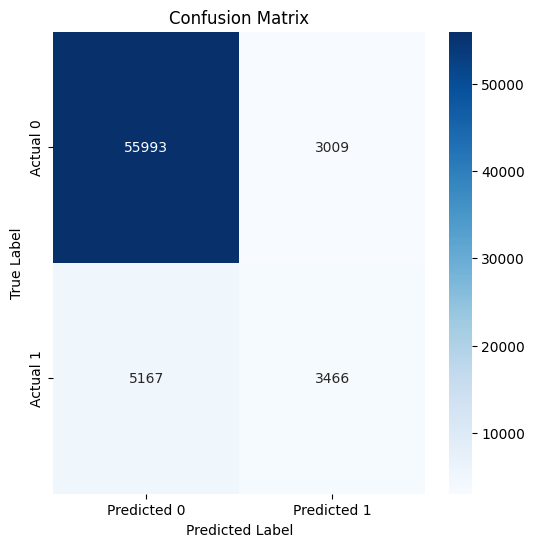

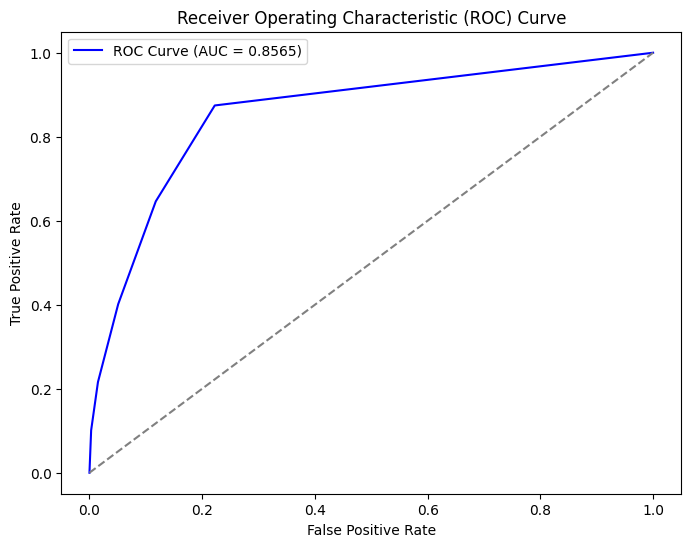

----------------------------------------------------------------------------------------------


In [ ]:
evaluate_models(distance_based_models, X_train_scaled, y_train, X_test_scaled, y_test)


Evaluating Decision Tree...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8898
Precision: 0.5667
Recall: 0.5822
F1-score: 0.5743
ROC AUC Score: 0.7585

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.94      0.93      0.94     59002
        True       0.57      0.58      0.57      8633

    accuracy                           0.89     67635
   macro avg       0.75      0.76      0.76     67635
weighted avg       0.89      0.89      0.89     67635



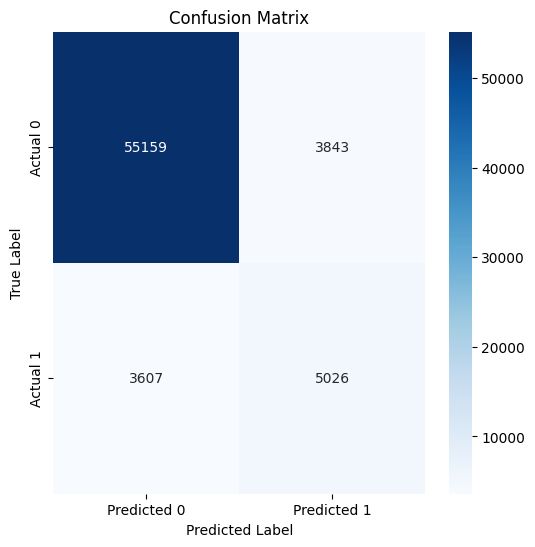

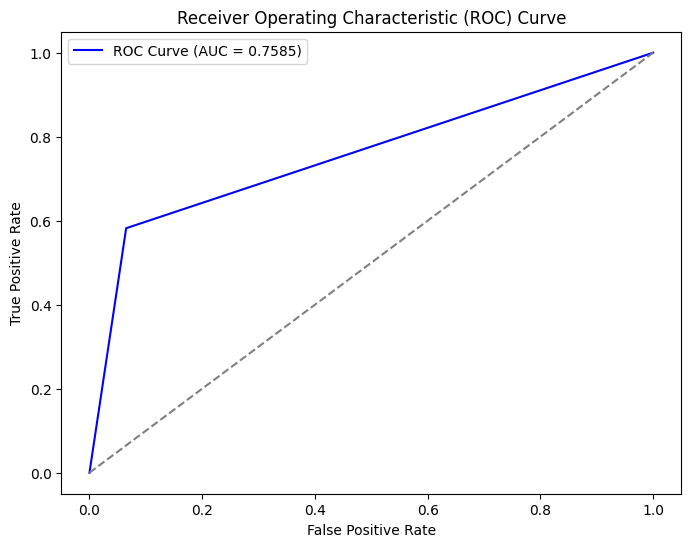

----------------------------------------------------------------------------------------------
Evaluating Random Forest...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.9171
Precision: 0.7113
Recall: 0.5894
F1-score: 0.6446
ROC AUC Score: 0.9490

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     59002
        True       0.71      0.59      0.64      8633

    accuracy                           0.92     67635
   macro avg       0.83      0.78      0.80     67635
weighted avg       0.91      0.92      0.91     67635



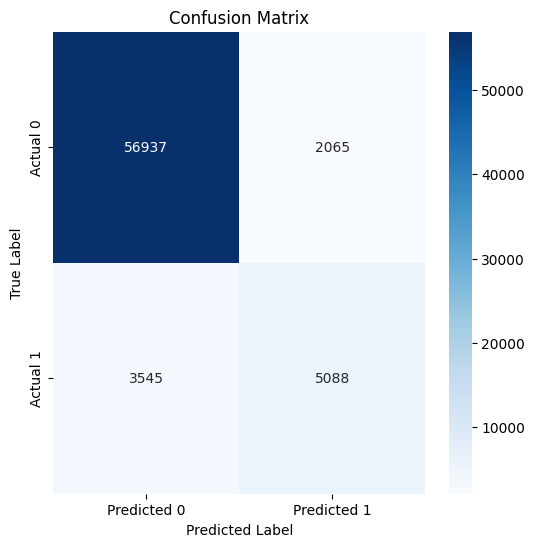

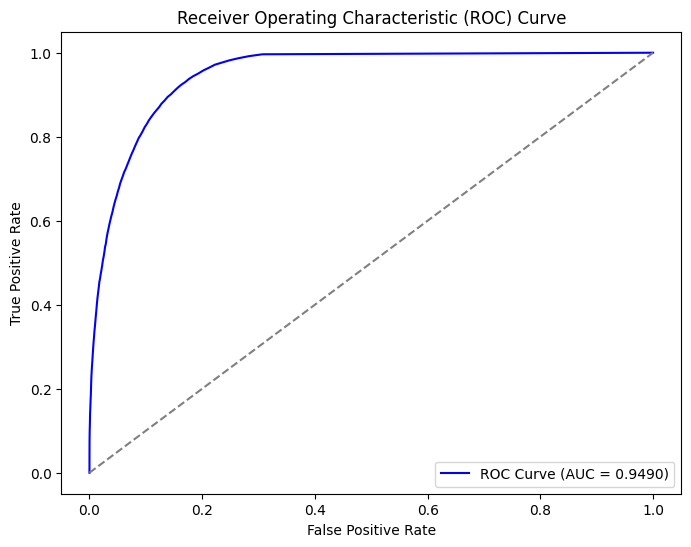

----------------------------------------------------------------------------------------------
Evaluating Extra Trees...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.9198
Precision: 0.7151
Recall: 0.6183
F1-score: 0.6632
ROC AUC Score: 0.9512

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.95      0.96      0.95     59002
        True       0.72      0.62      0.66      8633

    accuracy                           0.92     67635
   macro avg       0.83      0.79      0.81     67635
weighted avg       0.92      0.92      0.92     67635



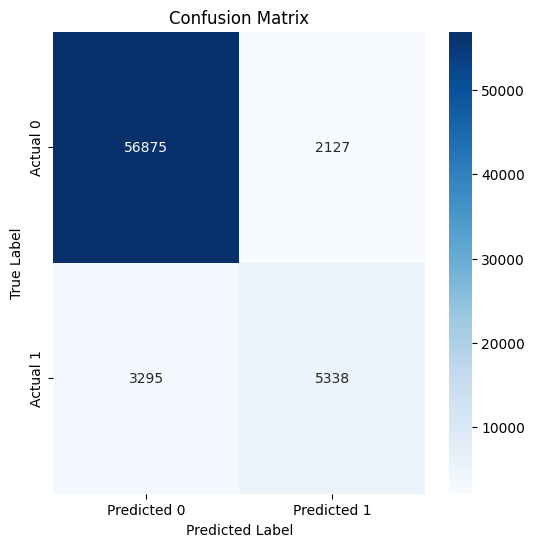

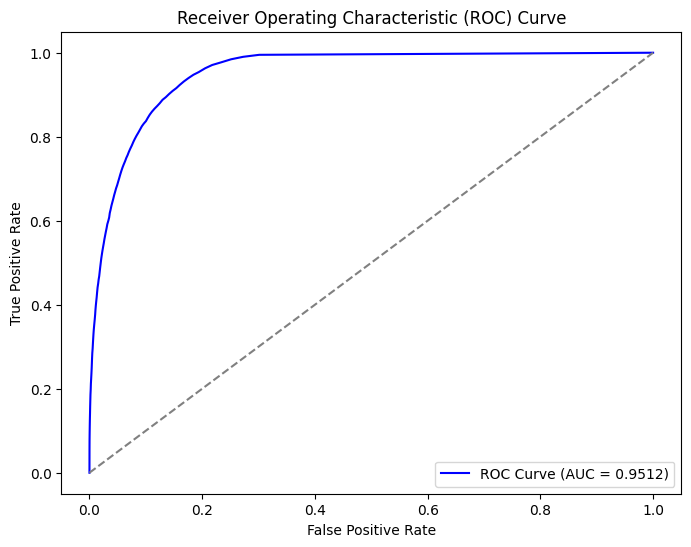

----------------------------------------------------------------------------------------------
Evaluating Gradient Boosting...
Training Accuracy: 0.8859
=== Evaluation Metrics ===
Accuracy: 0.8856
Precision: 0.7306
Recall: 0.1646
F1-score: 0.2687
ROC AUC Score: 0.8944

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.99      0.94     59002
        True       0.73      0.16      0.27      8633

    accuracy                           0.89     67635
   macro avg       0.81      0.58      0.60     67635
weighted avg       0.87      0.89      0.85     67635



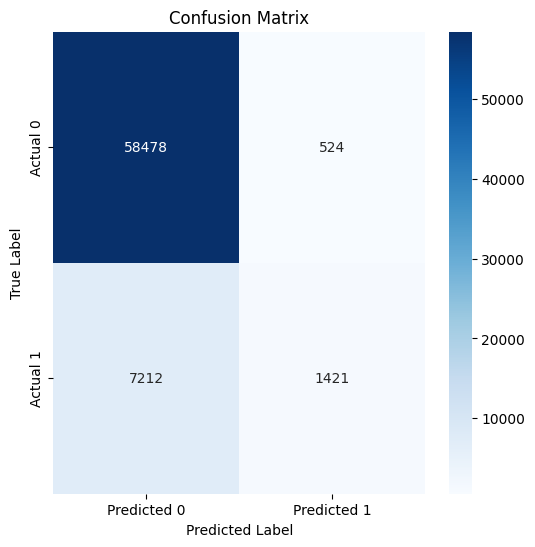

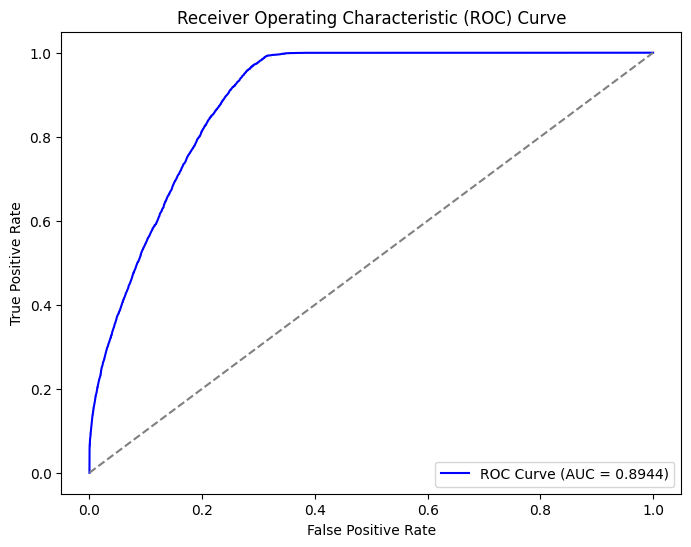

----------------------------------------------------------------------------------------------
Evaluating AdaBoost...
Training Accuracy: 0.8841
=== Evaluation Metrics ===
Accuracy: 0.8840
Precision: 0.7053
Recall: 0.1564
F1-score: 0.2560
ROC AUC Score: 0.8691

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.99      0.94     59002
        True       0.71      0.16      0.26      8633

    accuracy                           0.88     67635
   macro avg       0.80      0.57      0.60     67635
weighted avg       0.87      0.88      0.85     67635



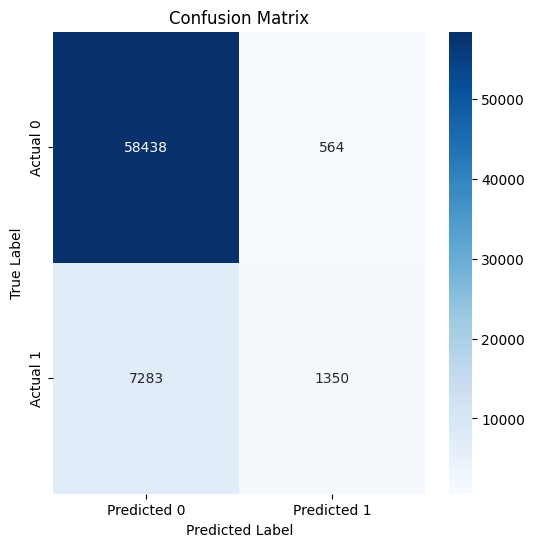

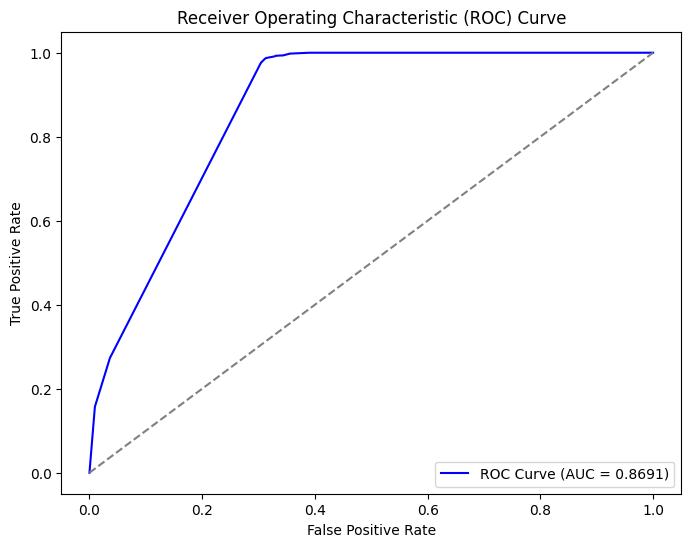

----------------------------------------------------------------------------------------------
Evaluating Bagging...
Training Accuracy: 0.9929
=== Evaluation Metrics ===
Accuracy: 0.9061
Precision: 0.6858
Recall: 0.4880
F1-score: 0.5702
ROC AUC Score: 0.9164

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.93      0.97      0.95     59002
        True       0.69      0.49      0.57      8633

    accuracy                           0.91     67635
   macro avg       0.81      0.73      0.76     67635
weighted avg       0.90      0.91      0.90     67635



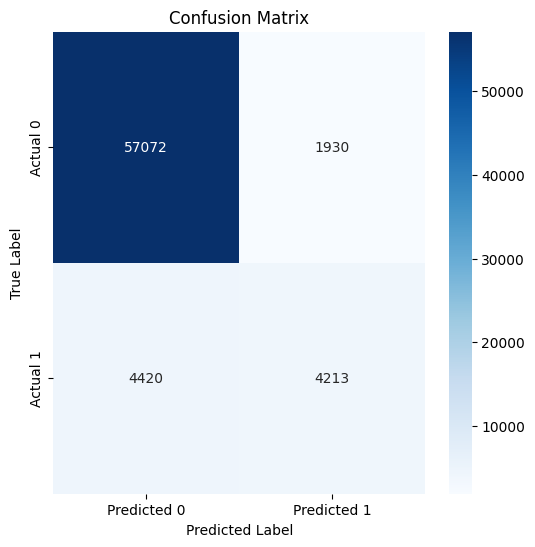

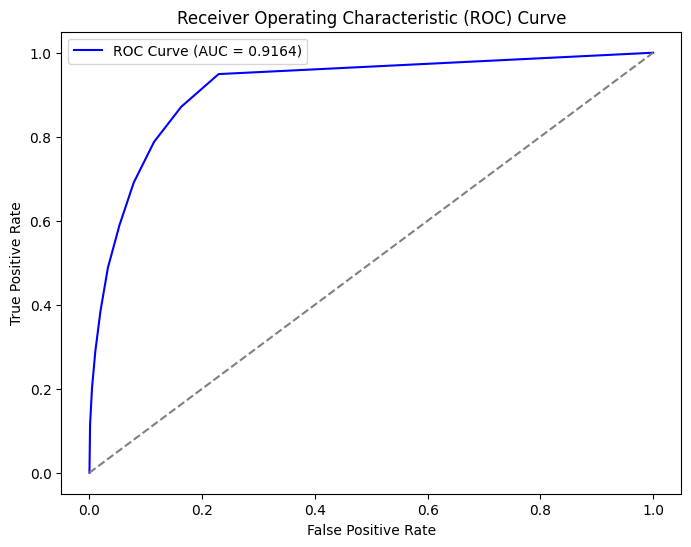

----------------------------------------------------------------------------------------------
Evaluating XGBoost...
Training Accuracy: 0.8991
=== Evaluation Metrics ===
Accuracy: 0.8943
Precision: 0.7124
Recall: 0.2889
F1-score: 0.4111
ROC AUC Score: 0.9146

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.90      0.98      0.94     59002
        True       0.71      0.29      0.41      8633

    accuracy                           0.89     67635
   macro avg       0.81      0.64      0.68     67635
weighted avg       0.88      0.89      0.87     67635



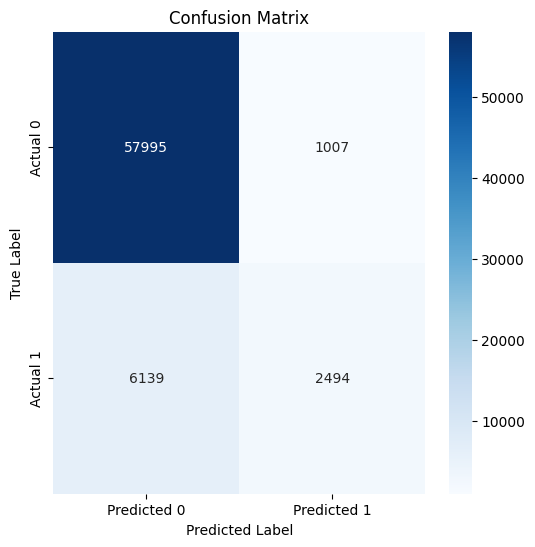

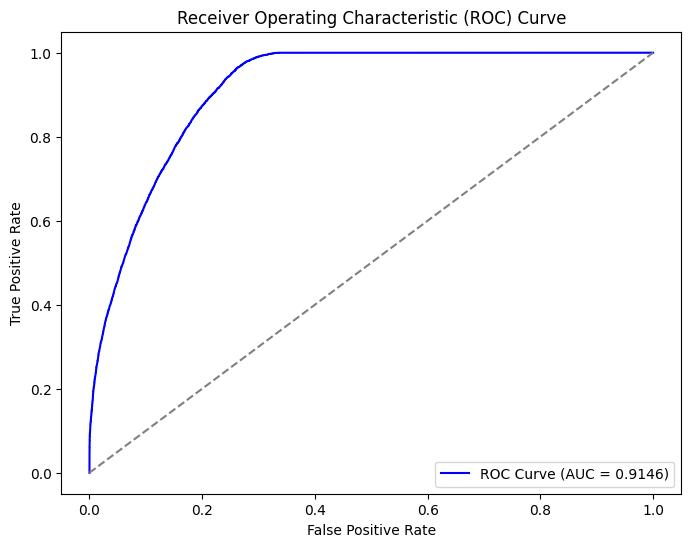

----------------------------------------------------------------------------------------------
Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 34529, number of negative: 236007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 270536, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127632 -> initscore=-1.922062
[LightGBM] [Info] Start training from score -1.922062
Training Accuracy: 0.8902
=== Evaluation Metrics ===
Accuracy: 0.8887
Precision: 0.7187
Recall: 0.2101
F1-score: 0.3252
ROC AUC Score: 0.9034

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.90      0.99      0.94     59002
        True       0.72      0.21      0.33      8633

    accuracy                           0.89     67

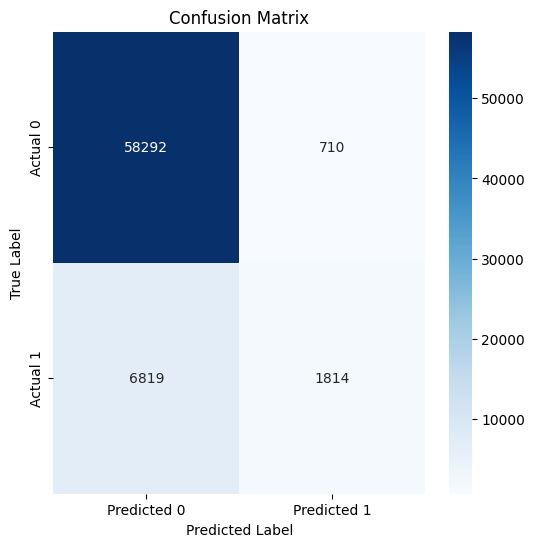

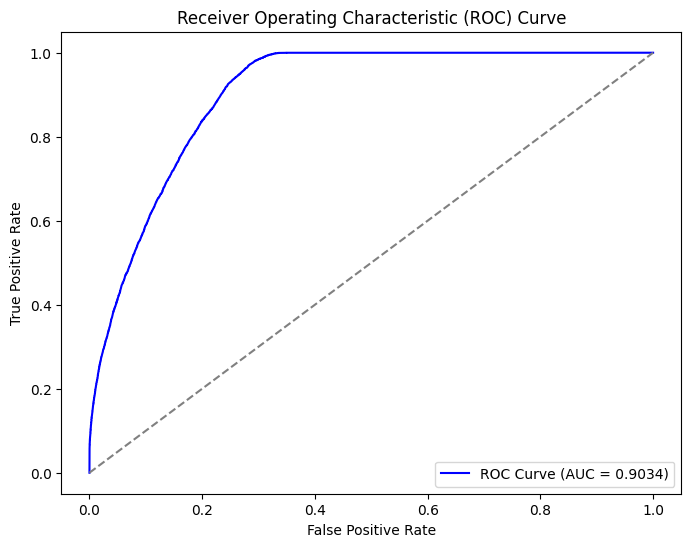

----------------------------------------------------------------------------------------------
Evaluating CatBoost...
Learning rate set to 0.112589
0:	learn: 0.5095343	total: 223ms	remaining: 3m 43s
1:	learn: 0.4056845	total: 351ms	remaining: 2m 55s
2:	learn: 0.3407046	total: 487ms	remaining: 2m 41s
3:	learn: 0.3075556	total: 599ms	remaining: 2m 29s
4:	learn: 0.2839612	total: 720ms	remaining: 2m 23s
5:	learn: 0.2731893	total: 843ms	remaining: 2m 19s
6:	learn: 0.2646409	total: 982ms	remaining: 2m 19s
7:	learn: 0.2604572	total: 1.11s	remaining: 2m 17s
8:	learn: 0.2556272	total: 1.24s	remaining: 2m 16s
9:	learn: 0.2516765	total: 1.35s	remaining: 2m 13s
10:	learn: 0.2496344	total: 1.47s	remaining: 2m 12s
11:	learn: 0.2469900	total: 1.58s	remaining: 2m 10s
12:	learn: 0.2459514	total: 1.72s	remaining: 2m 10s
13:	learn: 0.2441593	total: 1.84s	remaining: 2m 9s
14:	learn: 0.2434605	total: 1.95s	remaining: 2m 8s
15:	learn: 0.2427572	total: 2.03s	remaining: 2m 4s
16:	learn: 0.2421222	total: 2.14s

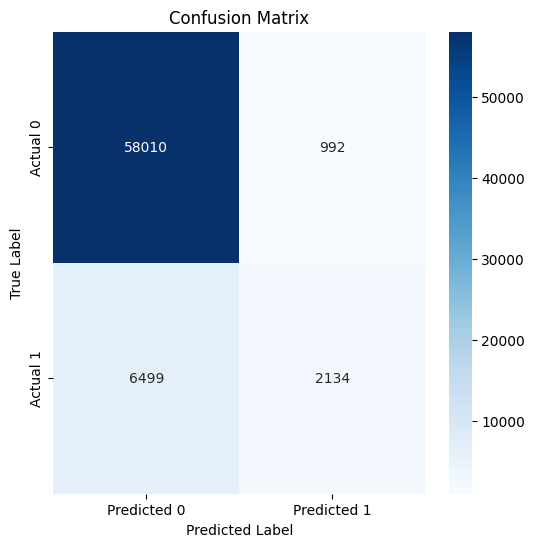

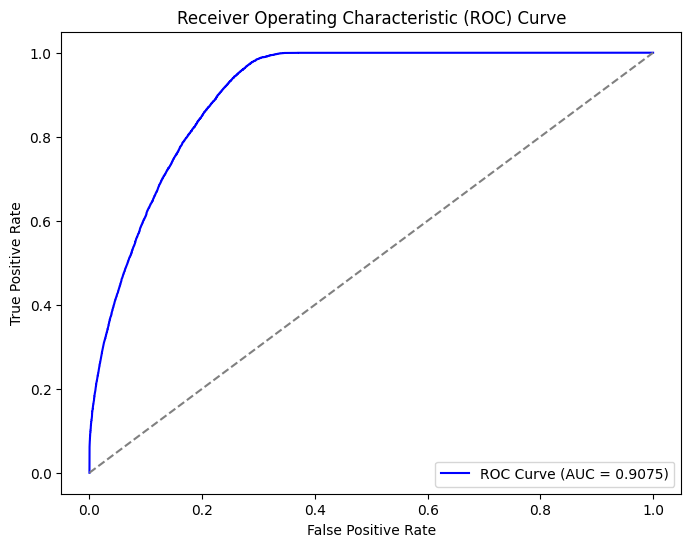

----------------------------------------------------------------------------------------------


In [ ]:
evaluate_models(tree_based_models, X_train_scaled, y_train, X_test_scaled, y_test)


# ***3- balancing data***

✅ Oversampling (Increase Minority Class)

✅ Undersampling (Reduce Majority Class)

✅ Class Weighting (Alternative)


In [ ]:
# create function to choose which sampling method to apply and returen its results


def apply_sampling(X_train, y_train, method='none'):
    """Applies a specified sampling method to the training data.

    Args:
        X_train: Training features.
        y_train: Training labels.
        method: Sampling method ('under', 'over', 'smote', or 'none').

    Returns:
        Tuple: Resampled training features and labels.
    """
    # Handling imbalanced classes using RandomUnderSampler
    if method == 'under':
        rus = RandomUnderSampler(sampling_strategy=0.9,random_state=42)
        X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
    # balancing data set  by ■. Oversampling (e.g., SMOTE: Synthetic Minority Over-sampling Technique)
    # Apply RandomOverSampler
    elif method == 'over':
        # Implement oversampling if needed (e.g., using SMOTE or RandomOverSampler)
        ros = RandomOverSampler(random_state=42)
        X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    # Apply SMOTE
    elif method == 'smote':
        smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Make the minority class at least 70% of majority class
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    elif method == 'none':
        return X_train, y_train  # No sampling
    else:
        print("Invalid sampling method selected.")
        return X_train, y_train  # Return original data

    return X_train_balanced, y_train_balanced


def check_class_distribution(X_train, y_train,method):
    """
    Checks the class distribution before and after applying a sampling method.

    Args:
        X_train: Training features.
        y_train: Training labels.
        method: Sampling method ('under', 'over', 'smote', or 'none').

    Returns:
        None
    """
    print(f"\nClass Distribution Before {method} Sampling:")
    print(y_train.value_counts())
    print("------------------------------------")
    X_train_balanced, y_train_balanced = apply_sampling(X_train, y_train, method)
    print(f"\nClass Distribution After {method} Sampling:")
    print(y_train_balanced.value_counts())
    print("-------------------------------------------------------------------------------------------")





In [ ]:

check_class_distribution(X_train, y_train, method='under')
check_class_distribution(X_train, y_train, method='over')
check_class_distribution(X_train, y_train, method='smote')


Class Distribution Before under Sampling:
is_hazardous
False    236007
True      34529
Name: count, dtype: int64
------------------------------------

Class Distribution After under Sampling:
is_hazardous
False    38365
True     34529
Name: count, dtype: int64
-------------------------------------------------------------------------------------------

Class Distribution Before over Sampling:
is_hazardous
False    236007
True      34529
Name: count, dtype: int64
------------------------------------

Class Distribution After over Sampling:
is_hazardous
False    236007
True     236007
Name: count, dtype: int64
-------------------------------------------------------------------------------------------

Class Distribution Before smote Sampling:
is_hazardous
False    236007
True      34529
Name: count, dtype: int64
------------------------------------

Class Distribution After smote Sampling:
is_hazardous
False    236007
True     188805
Name: count, dtype: int64
----------------------------

# ***trials after balancing***

In [ ]:

X_train_balanced_s, y_train_balanced_s = apply_sampling(X_train, y_train, method='smote')
X_train_balanced_o, y_train_balanced_o = apply_sampling(X_train, y_train, method='over')
X_train_balanced_u, y_train_balanced_u = apply_sampling(X_train, y_train, method='under')


Evaluating Logistic Regression...
Training Accuracy: 0.6978
=== Evaluation Metrics ===
Accuracy: 0.5975
Precision: 0.2408
Recall: 1.0000
F1-score: 0.3881
ROC AUC Score: 0.8176

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      0.54      0.70     59002
        True       0.24      1.00      0.39      8633

    accuracy                           0.60     67635
   macro avg       0.62      0.77      0.54     67635
weighted avg       0.90      0.60      0.66     67635



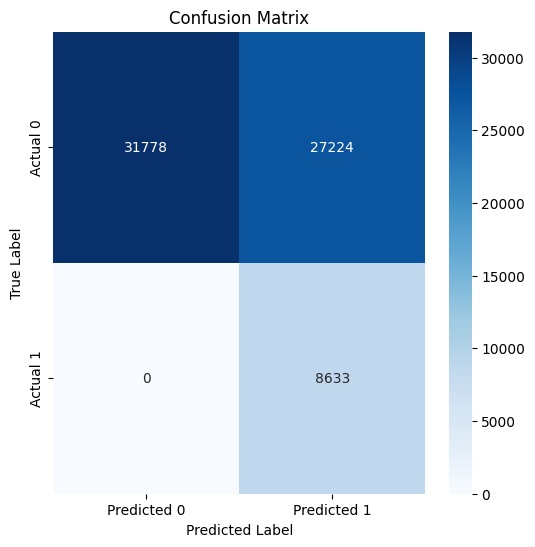

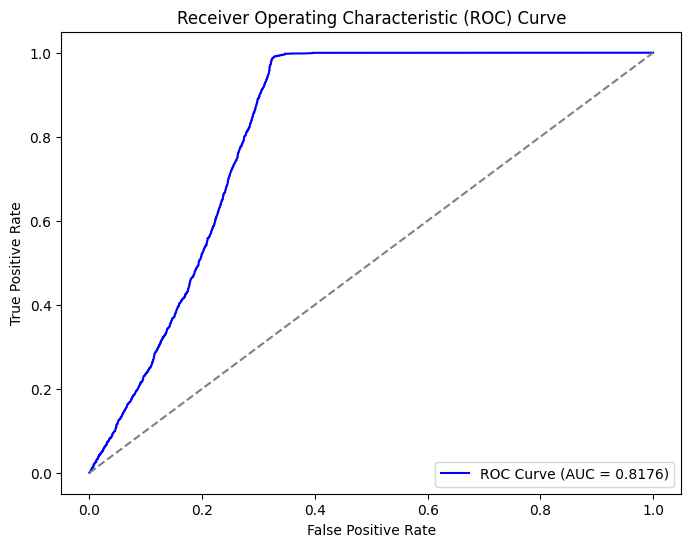

----------------------------------------------------------------------------------------------
Evaluating Linear Discriminant Analysis...
Training Accuracy: 0.7916
=== Evaluation Metrics ===
Accuracy: 0.1277
Precision: 0.1277
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.7306

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     67635
   macro avg       0.56      0.50      0.11     67635
weighted avg       0.89      0.13      0.03     67635



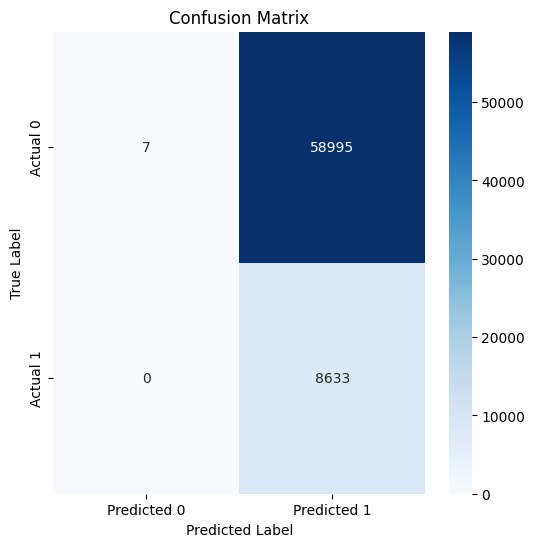

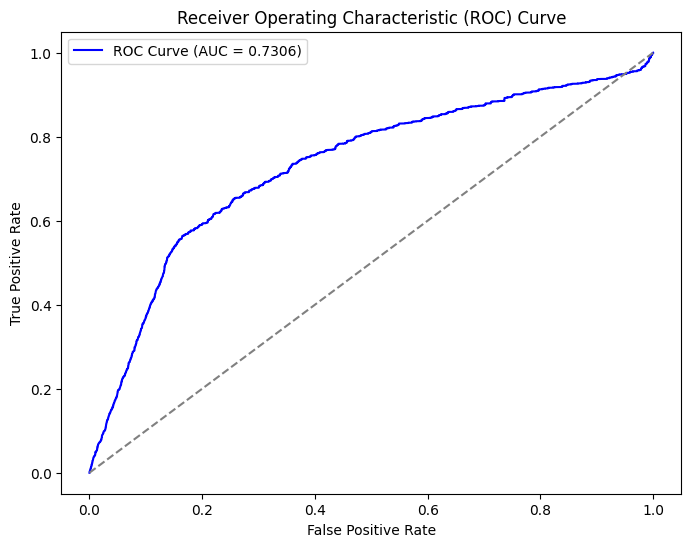

----------------------------------------------------------------------------------------------
Evaluating Quadratic Discriminant Analysis...
Training Accuracy: 0.5437
=== Evaluation Metrics ===
Accuracy: 0.1276
Precision: 0.1276
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     67635
   macro avg       0.06      0.50      0.11     67635
weighted avg       0.02      0.13      0.03     67635



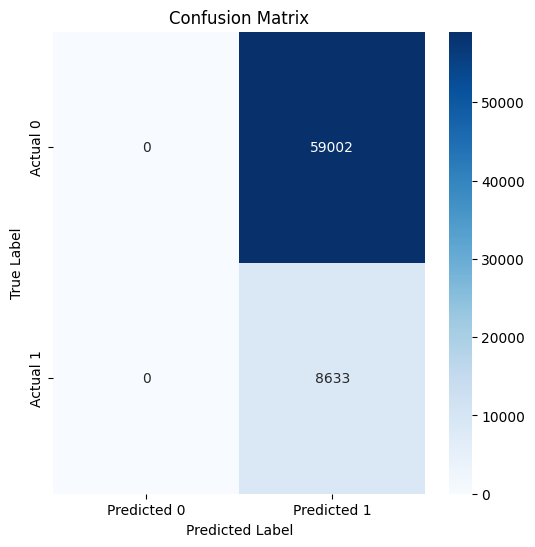

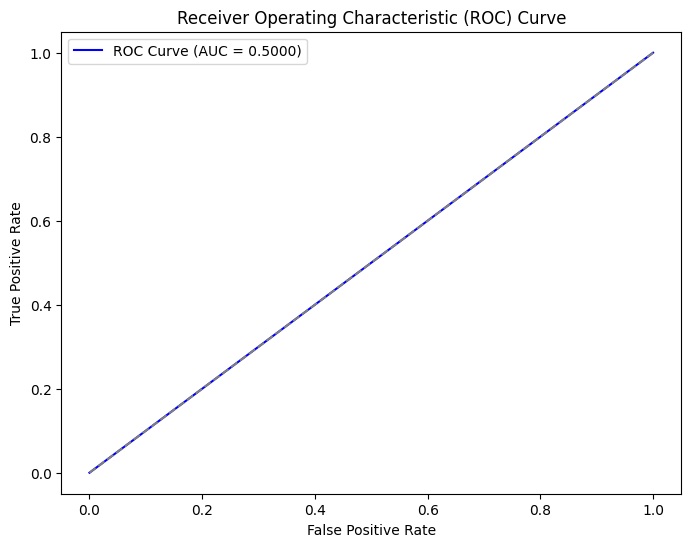

----------------------------------------------------------------------------------------------
Evaluating KNeighborsClassifier...
Training Accuracy: 0.8406
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



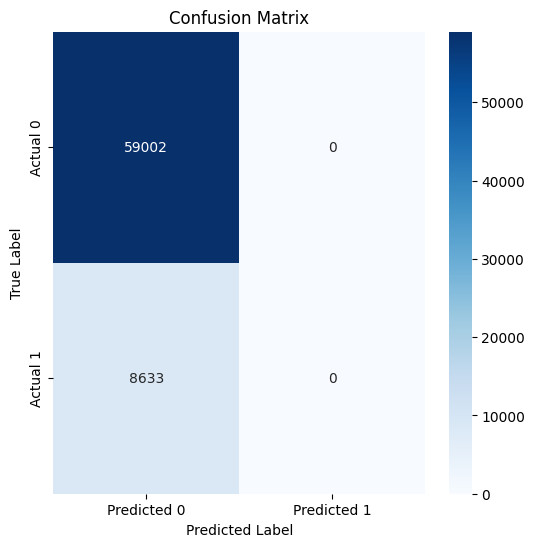

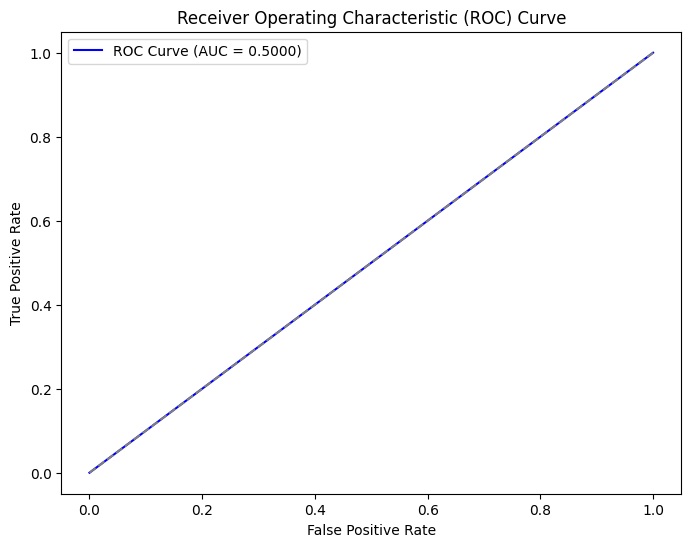

----------------------------------------------------------------------------------------------
Evaluating Decision Tree...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8477
Precision: 0.2758
Recall: 0.1186
F1-score: 0.1659
ROC AUC Score: 0.5365

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.88      0.95      0.92     59002
        True       0.28      0.12      0.17      8633

    accuracy                           0.85     67635
   macro avg       0.58      0.54      0.54     67635
weighted avg       0.80      0.85      0.82     67635



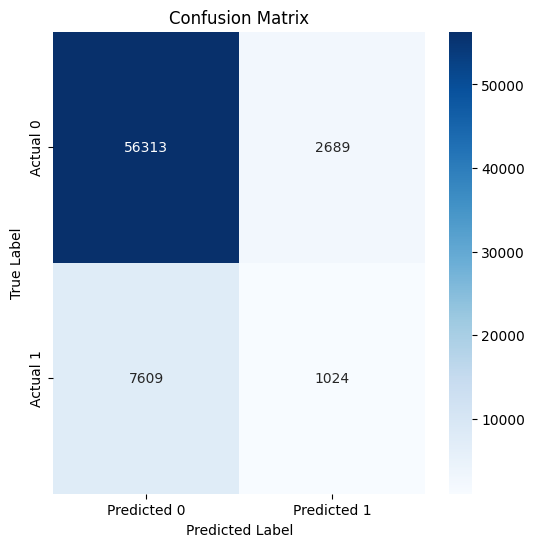

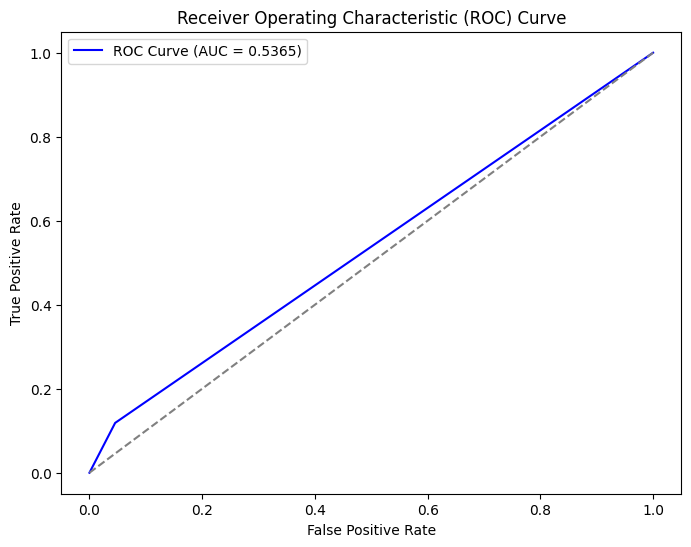

----------------------------------------------------------------------------------------------
Evaluating Random Forest...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.7672
Precision: 0.2800
Recall: 0.5246
F1-score: 0.3652
ROC AUC Score: 0.6726

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.80      0.86     59002
        True       0.28      0.52      0.37      8633

    accuracy                           0.77     67635
   macro avg       0.60      0.66      0.61     67635
weighted avg       0.84      0.77      0.79     67635



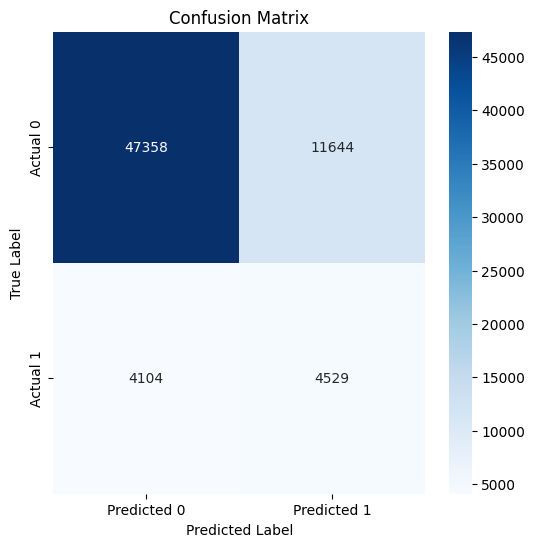

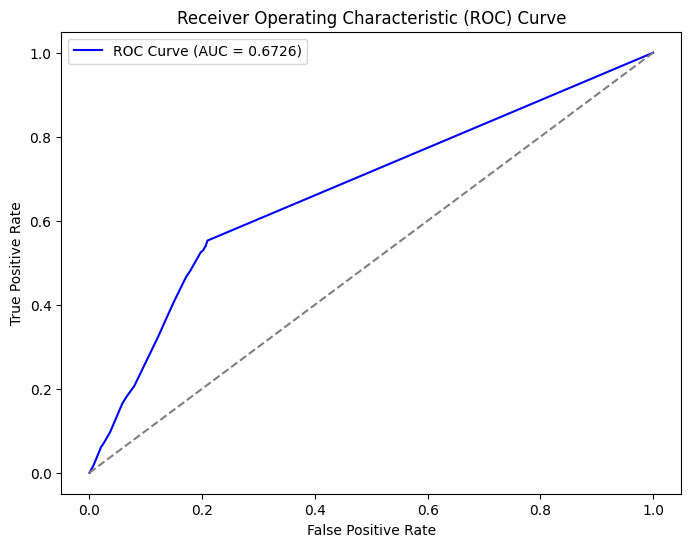

----------------------------------------------------------------------------------------------
Evaluating Extra Trees...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.6987

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



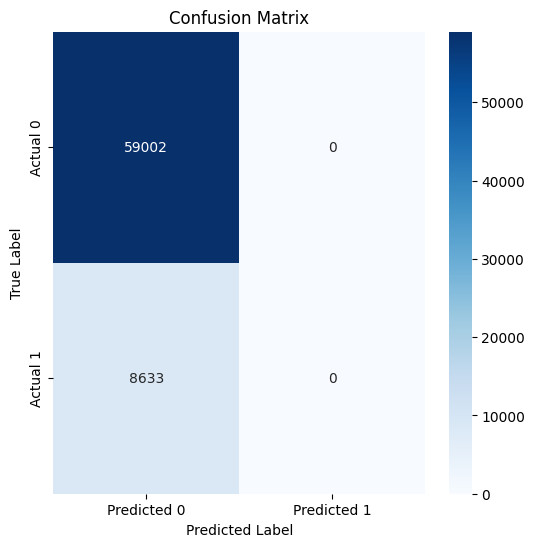

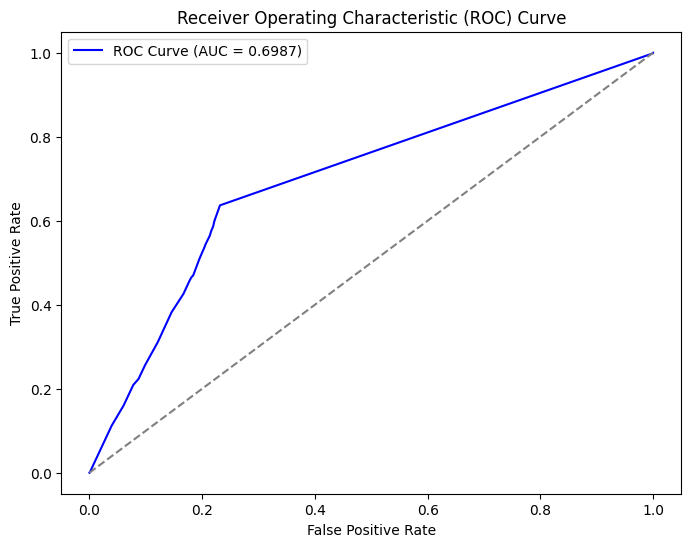

----------------------------------------------------------------------------------------------
Evaluating Gradient Boosting...
Training Accuracy: 0.8438
=== Evaluation Metrics ===
Accuracy: 0.8668
Precision: 0.2571
Recall: 0.0231
F1-score: 0.0423
ROC AUC Score: 0.6679

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      0.99      0.93     59002
        True       0.26      0.02      0.04      8633

    accuracy                           0.87     67635
   macro avg       0.57      0.51      0.49     67635
weighted avg       0.80      0.87      0.82     67635



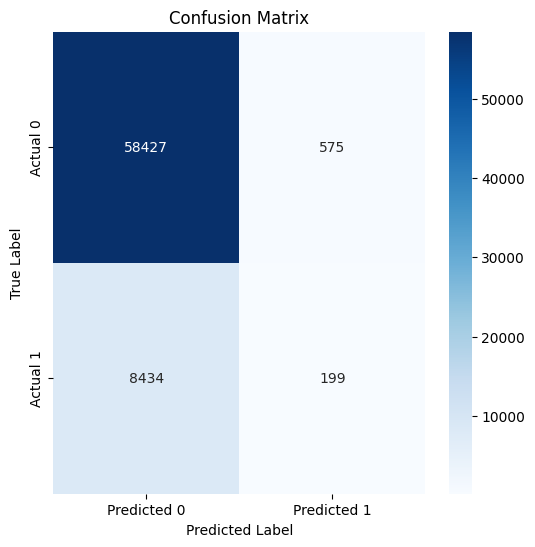

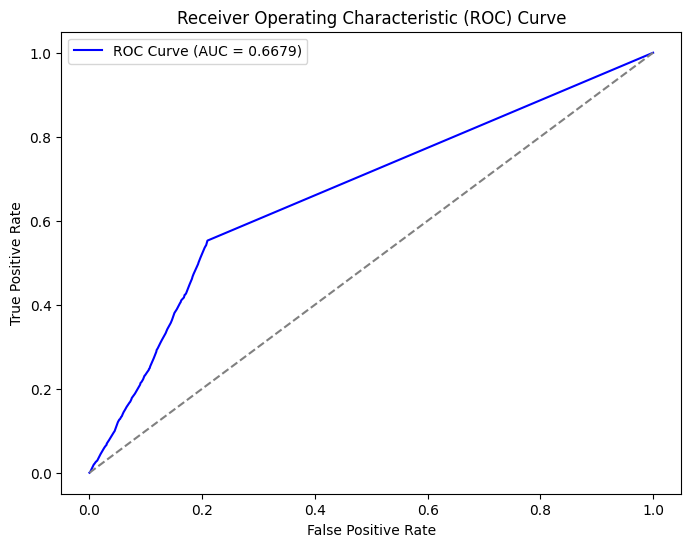

----------------------------------------------------------------------------------------------
Evaluating AdaBoost...
Training Accuracy: 0.8267
=== Evaluation Metrics ===
Accuracy: 0.7785
Precision: 0.2661
Recall: 0.4180
F1-score: 0.3252
ROC AUC Score: 0.6688

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.91      0.83      0.87     59002
        True       0.27      0.42      0.33      8633

    accuracy                           0.78     67635
   macro avg       0.59      0.62      0.60     67635
weighted avg       0.83      0.78      0.80     67635



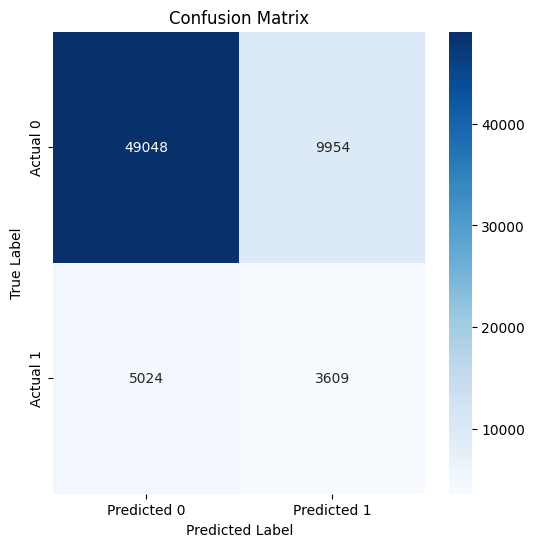

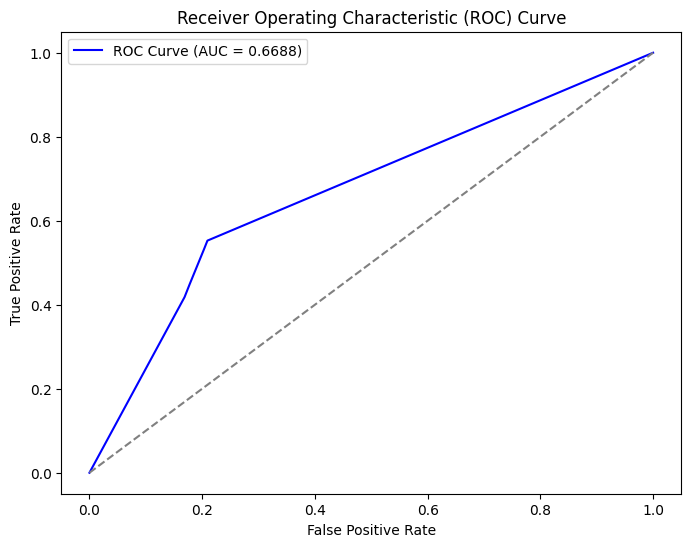

----------------------------------------------------------------------------------------------
Evaluating Bagging...
Training Accuracy: 0.9952
=== Evaluation Metrics ===
Accuracy: 0.8322
Precision: 0.2814
Recall: 0.2022
F1-score: 0.2353
ROC AUC Score: 0.6661

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.92      0.91     59002
        True       0.28      0.20      0.24      8633

    accuracy                           0.83     67635
   macro avg       0.58      0.56      0.57     67635
weighted avg       0.81      0.83      0.82     67635



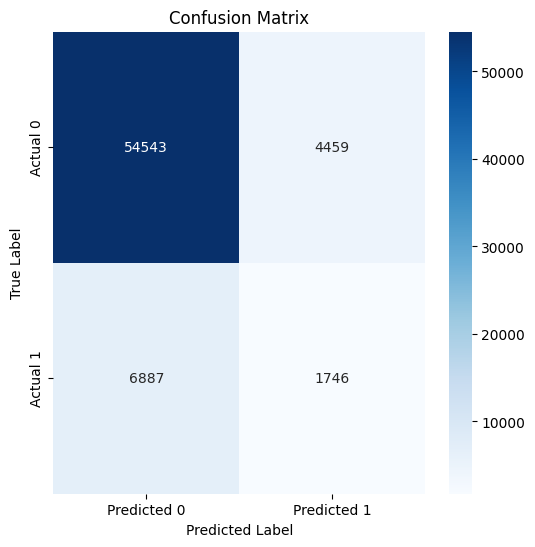

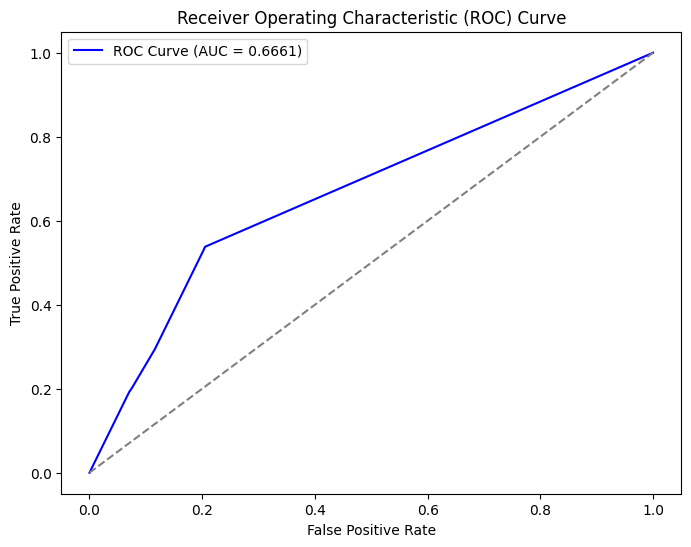

----------------------------------------------------------------------------------------------
Evaluating XGBoost...
Training Accuracy: 0.8657
=== Evaluation Metrics ===
Accuracy: 0.8223
Precision: 0.2813
Recall: 0.2519
F1-score: 0.2658
ROC AUC Score: 0.6718

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.91      0.90     59002
        True       0.28      0.25      0.27      8633

    accuracy                           0.82     67635
   macro avg       0.59      0.58      0.58     67635
weighted avg       0.81      0.82      0.82     67635



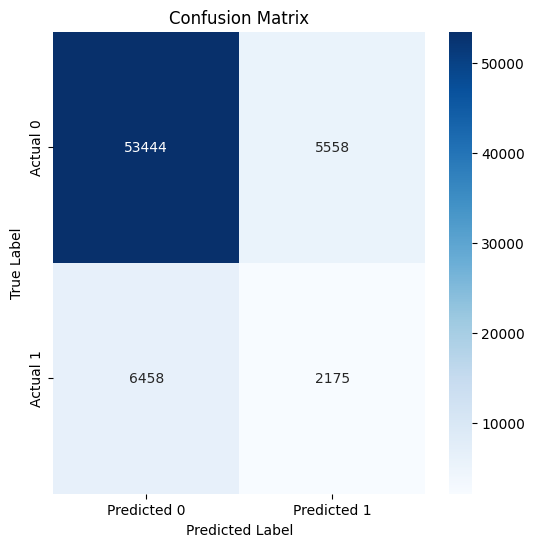

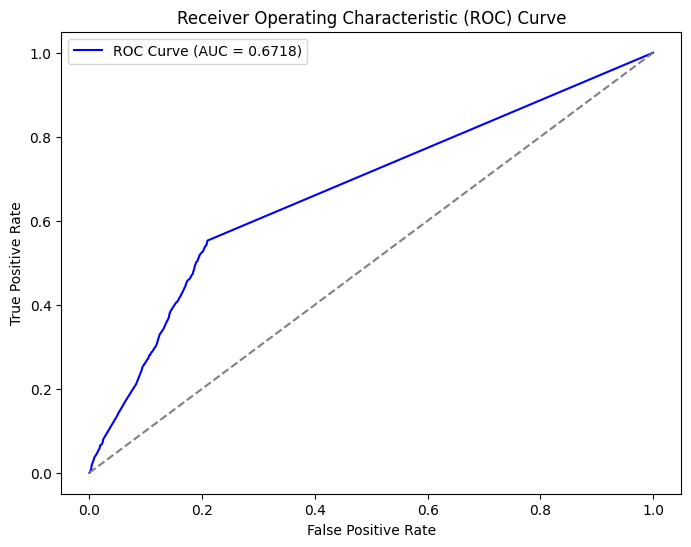

----------------------------------------------------------------------------------------------
Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 188805, number of negative: 236007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 424812, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223147
[LightGBM] [Info] Start training from score -0.223147
Training Accuracy: 0.8688
=== Evaluation Metrics ===
Accuracy: 0.7630
Precision: 0.2770
Recall: 0.5319
F1-score: 0.3643
ROC AUC Score: 0.6698

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.80      0.85     59002
        True       0.28      0.53      0

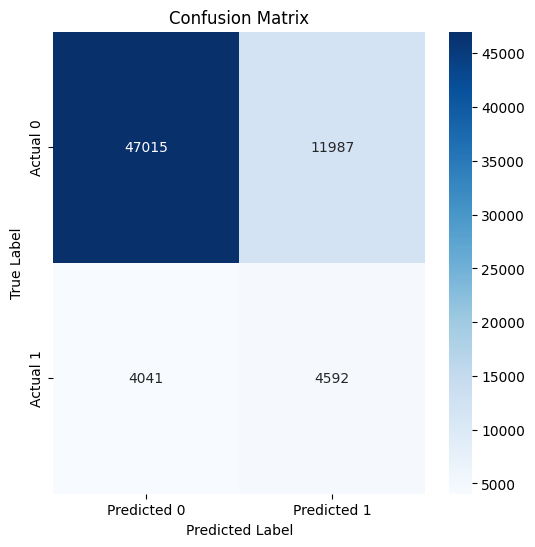

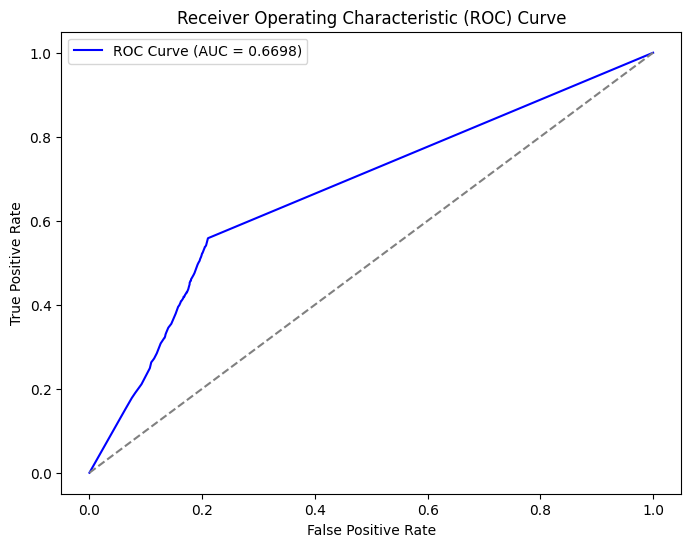

----------------------------------------------------------------------------------------------
Evaluating CatBoost...
Learning rate set to 0.136513
0:	learn: 0.5551088	total: 108ms	remaining: 1m 47s
1:	learn: 0.4820313	total: 212ms	remaining: 1m 45s
2:	learn: 0.4392669	total: 301ms	remaining: 1m 40s
3:	learn: 0.4088180	total: 387ms	remaining: 1m 36s
4:	learn: 0.3879625	total: 494ms	remaining: 1m 38s
5:	learn: 0.3730641	total: 580ms	remaining: 1m 36s
6:	learn: 0.3627066	total: 668ms	remaining: 1m 34s
7:	learn: 0.3564860	total: 787ms	remaining: 1m 37s
8:	learn: 0.3530913	total: 876ms	remaining: 1m 36s
9:	learn: 0.3486780	total: 969ms	remaining: 1m 35s
10:	learn: 0.3450538	total: 1.07s	remaining: 1m 36s
11:	learn: 0.3401108	total: 1.16s	remaining: 1m 35s
12:	learn: 0.3374630	total: 1.24s	remaining: 1m 34s
13:	learn: 0.3346140	total: 1.35s	remaining: 1m 35s
14:	learn: 0.3322672	total: 1.45s	remaining: 1m 34s
15:	learn: 0.3296516	total: 1.53s	remaining: 1m 34s
16:	learn: 0.3280367	total: 1.

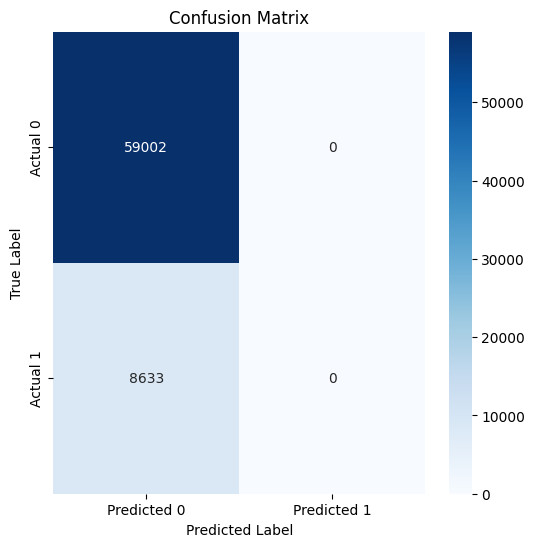

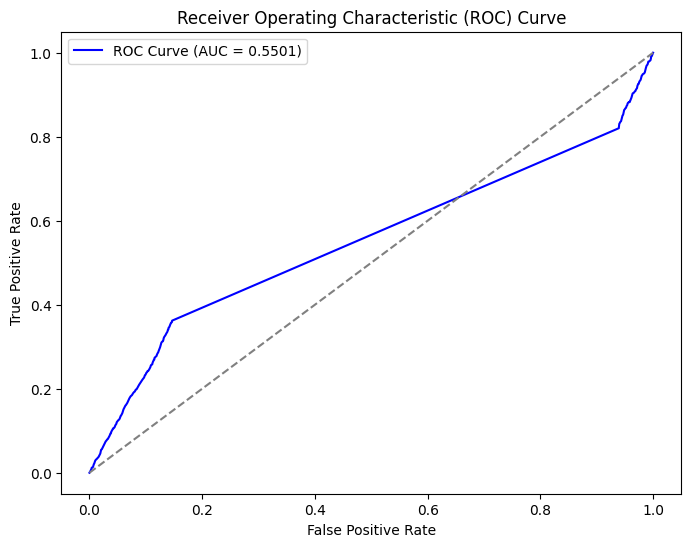

----------------------------------------------------------------------------------------------


In [ ]:
evaluate_models(linear_models, X_train_balanced_s, y_train_balanced_s, X_test_scaled, y_test)
evaluate_models(distance_based_models, X_train_balanced_s, y_train_balanced_s, X_test_scaled, y_test)
evaluate_models(tree_based_models, X_train_balanced_s, y_train_balanced_s, X_test_scaled, y_test)


Evaluating Logistic Regression...
Training Accuracy: 0.7009
=== Evaluation Metrics ===
Accuracy: 0.5975
Precision: 0.2408
Recall: 1.0000
F1-score: 0.3881
ROC AUC Score: 0.8176

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      0.54      0.70     59002
        True       0.24      1.00      0.39      8633

    accuracy                           0.60     67635
   macro avg       0.62      0.77      0.54     67635
weighted avg       0.90      0.60      0.66     67635



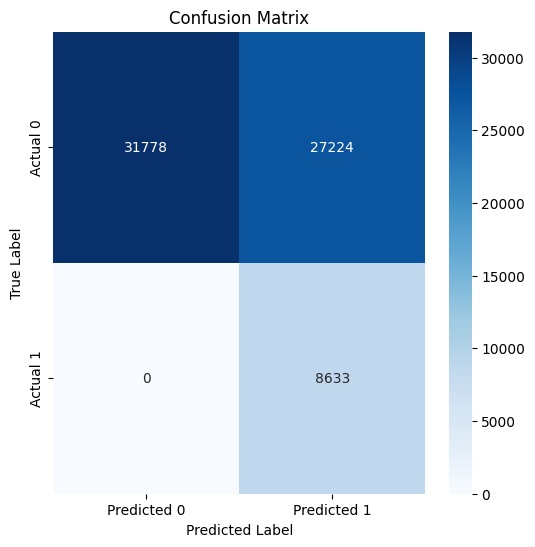

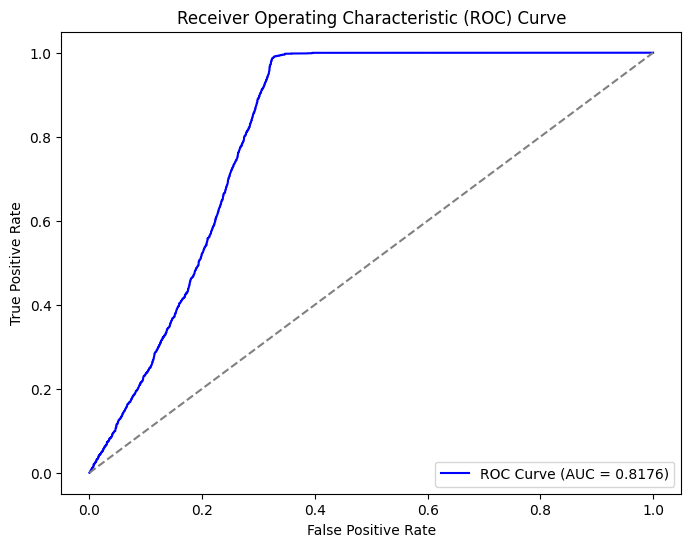

----------------------------------------------------------------------------------------------
Evaluating Linear Discriminant Analysis...
Training Accuracy: 0.8029
=== Evaluation Metrics ===
Accuracy: 0.1278
Precision: 0.1277
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.6919

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     67635
   macro avg       0.56      0.50      0.11     67635
weighted avg       0.89      0.13      0.03     67635



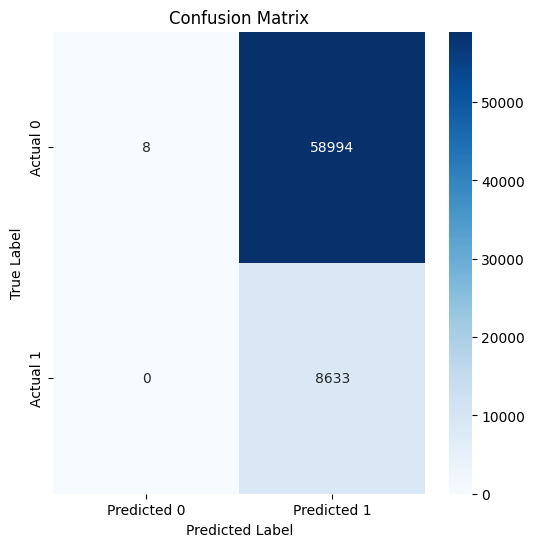

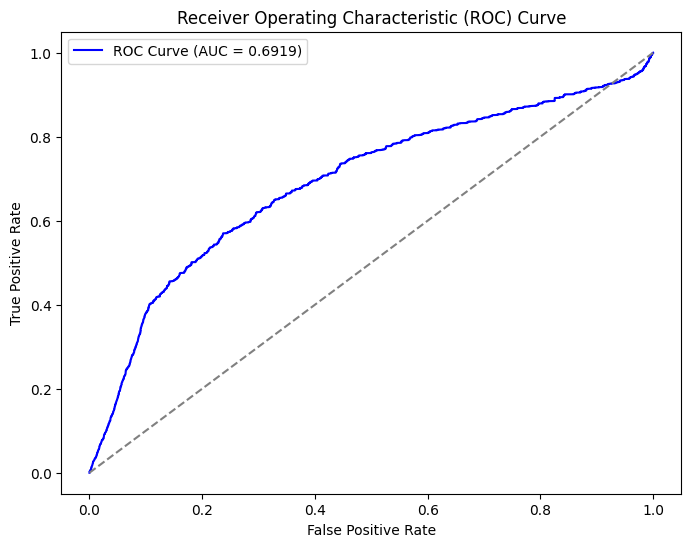

----------------------------------------------------------------------------------------------
Evaluating Quadratic Discriminant Analysis...
Training Accuracy: 0.5595
=== Evaluation Metrics ===
Accuracy: 0.1276
Precision: 0.1276
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     67635
   macro avg       0.06      0.50      0.11     67635
weighted avg       0.02      0.13      0.03     67635



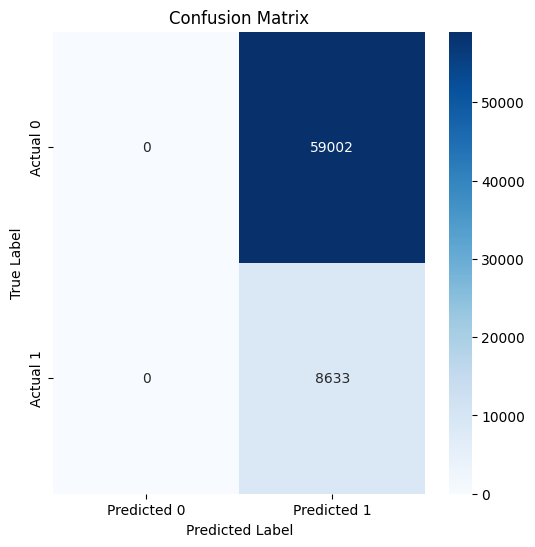

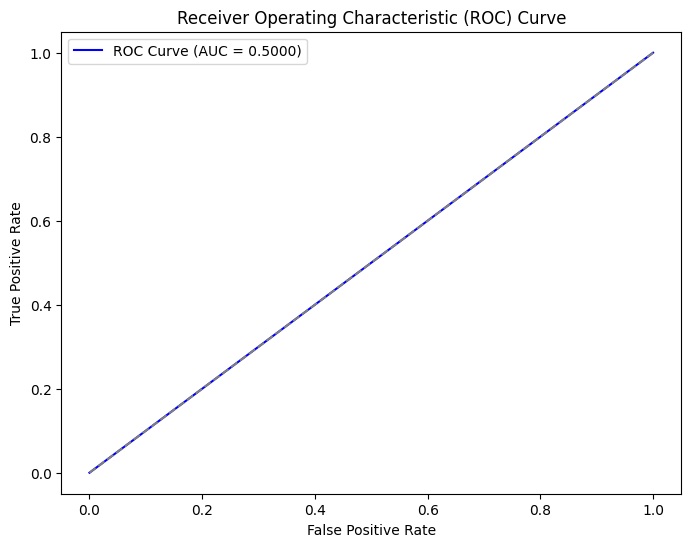

----------------------------------------------------------------------------------------------
Evaluating KNeighborsClassifier...
Training Accuracy: 0.8940
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



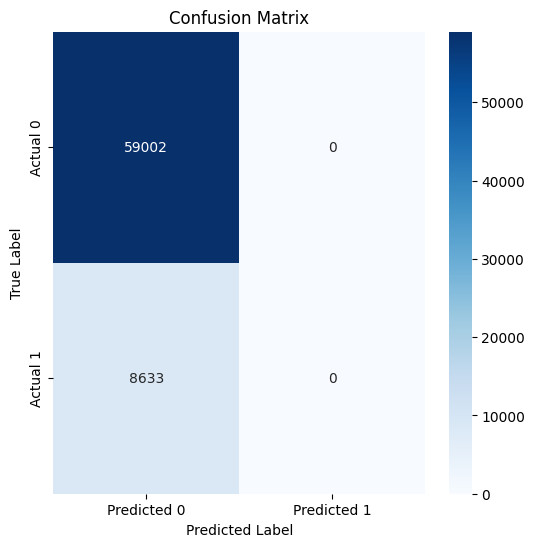

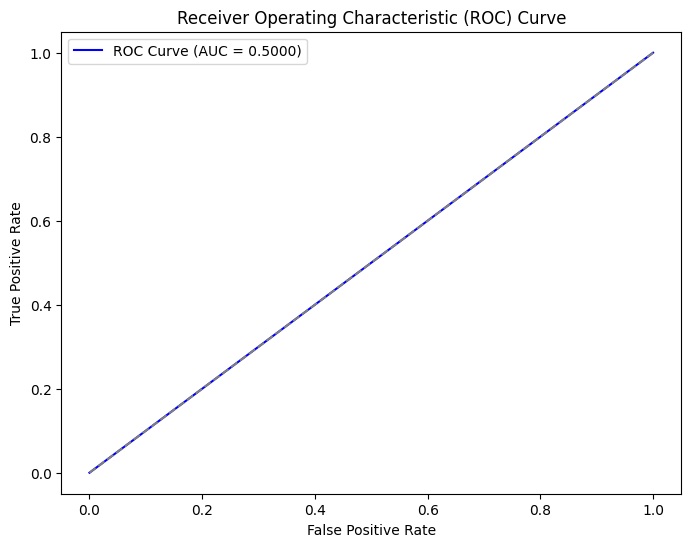

----------------------------------------------------------------------------------------------
Evaluating Decision Tree...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



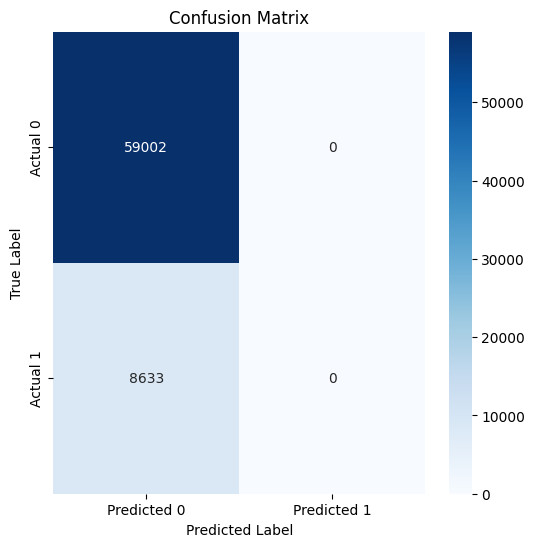

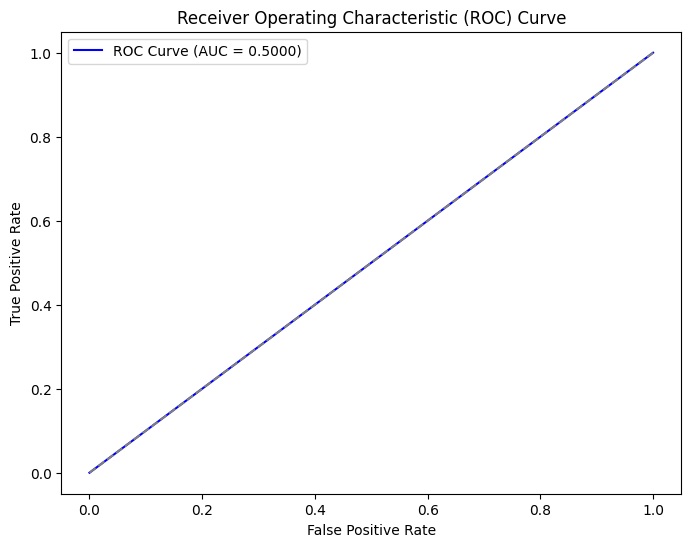

----------------------------------------------------------------------------------------------
Evaluating Random Forest...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.6703

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



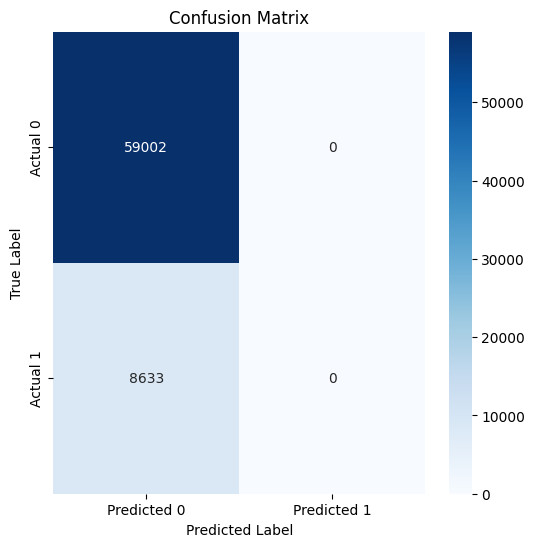

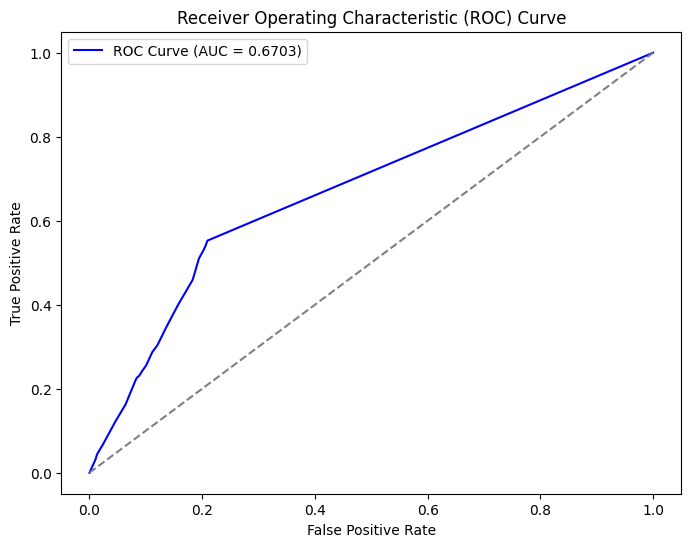

----------------------------------------------------------------------------------------------
Evaluating Extra Trees...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.6843

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



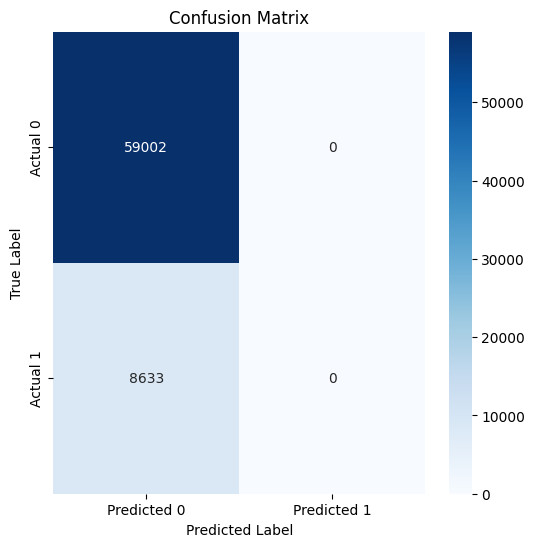

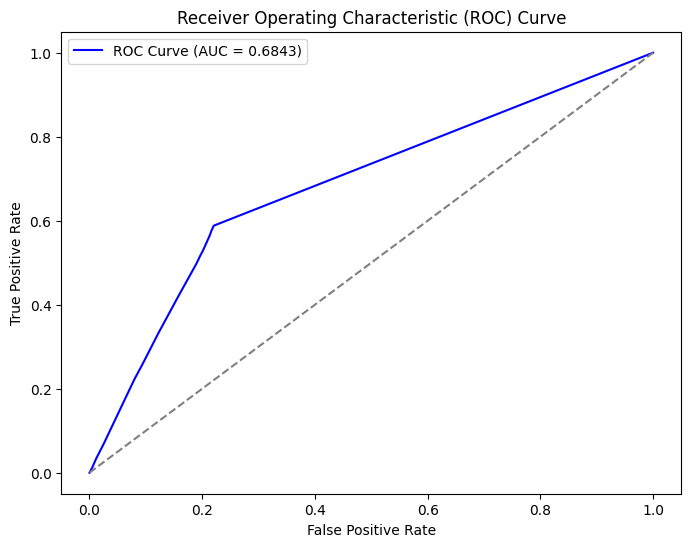

----------------------------------------------------------------------------------------------
Evaluating Gradient Boosting...
Training Accuracy: 0.8400
=== Evaluation Metrics ===
Accuracy: 0.7642
Precision: 0.2790
Recall: 0.5346
F1-score: 0.3666
ROC AUC Score: 0.6718

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.80      0.86     59002
        True       0.28      0.53      0.37      8633

    accuracy                           0.76     67635
   macro avg       0.60      0.67      0.61     67635
weighted avg       0.84      0.76      0.79     67635



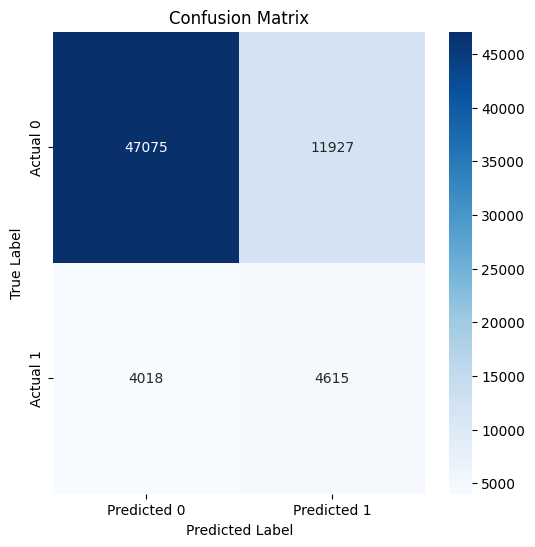

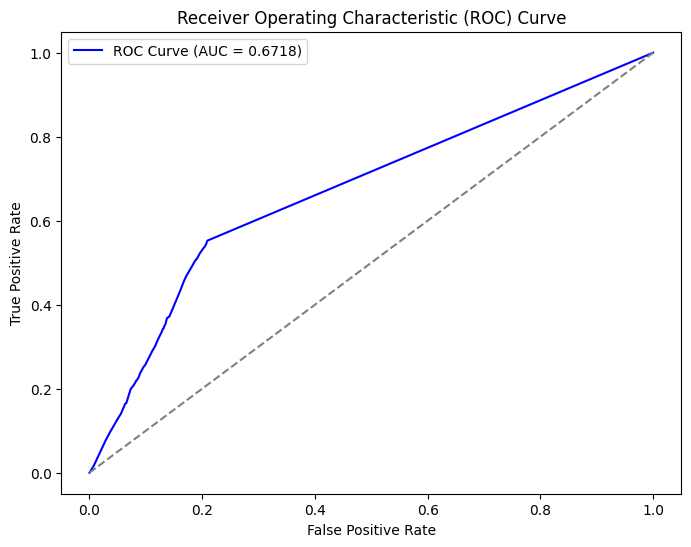

----------------------------------------------------------------------------------------------
Evaluating AdaBoost...
Training Accuracy: 0.8314
=== Evaluation Metrics ===
Accuracy: 0.7630
Precision: 0.2770
Recall: 0.5319
F1-score: 0.3643
ROC AUC Score: 0.6695

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.80      0.85     59002
        True       0.28      0.53      0.36      8633

    accuracy                           0.76     67635
   macro avg       0.60      0.66      0.61     67635
weighted avg       0.84      0.76      0.79     67635



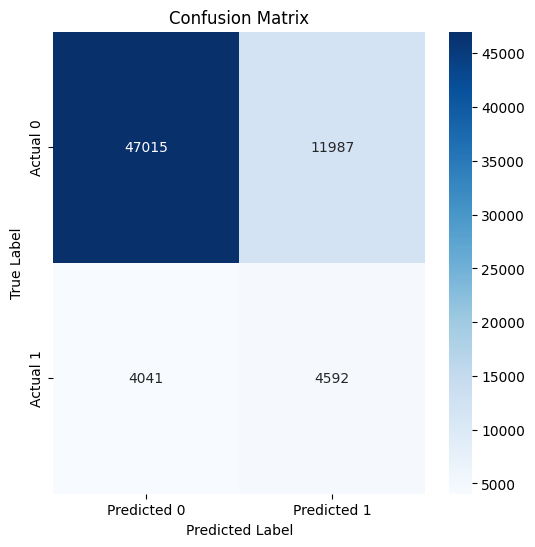

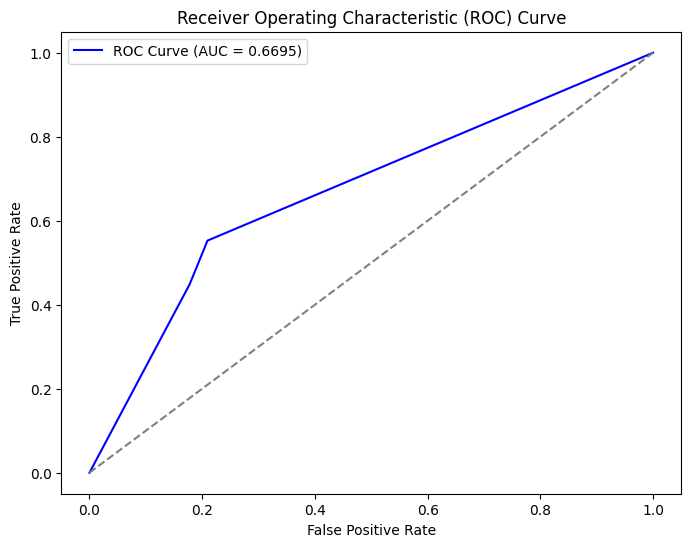

----------------------------------------------------------------------------------------------
Evaluating Bagging...
Training Accuracy: 0.9993
=== Evaluation Metrics ===
Accuracy: 0.8320
Precision: 0.2794
Recall: 0.2000
F1-score: 0.2331
ROC AUC Score: 0.6651

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.92      0.91     59002
        True       0.28      0.20      0.23      8633

    accuracy                           0.83     67635
   macro avg       0.58      0.56      0.57     67635
weighted avg       0.81      0.83      0.82     67635



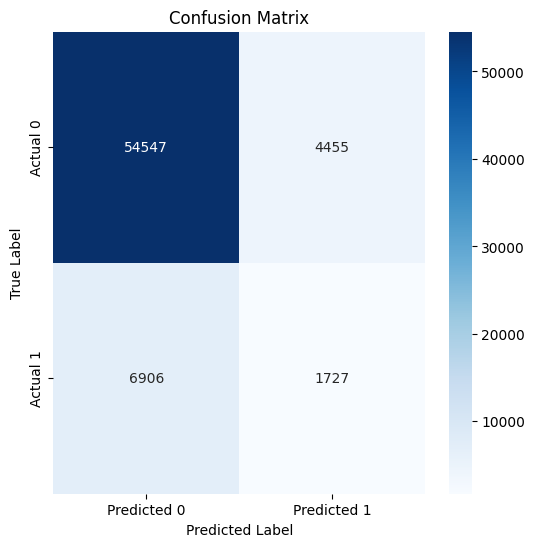

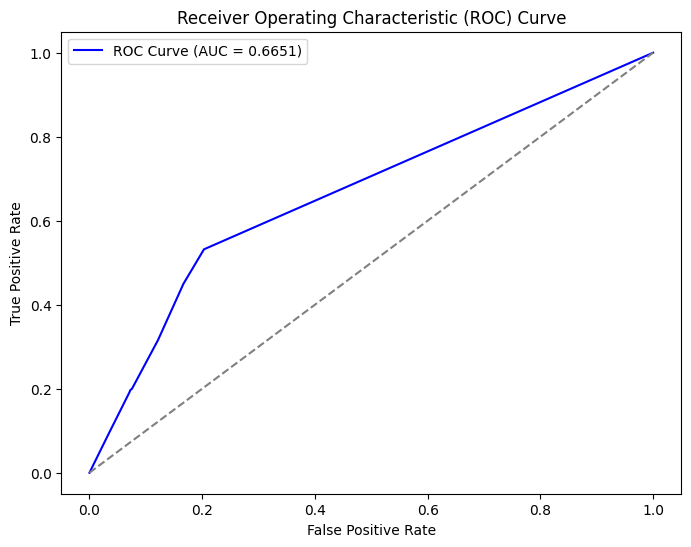

----------------------------------------------------------------------------------------------
Evaluating XGBoost...
Training Accuracy: 0.8670
=== Evaluation Metrics ===
Accuracy: 0.8019
Precision: 0.2642
Recall: 0.3093
F1-score: 0.2850
ROC AUC Score: 0.6578

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.90      0.87      0.89     59002
        True       0.26      0.31      0.28      8633

    accuracy                           0.80     67635
   macro avg       0.58      0.59      0.58     67635
weighted avg       0.82      0.80      0.81     67635



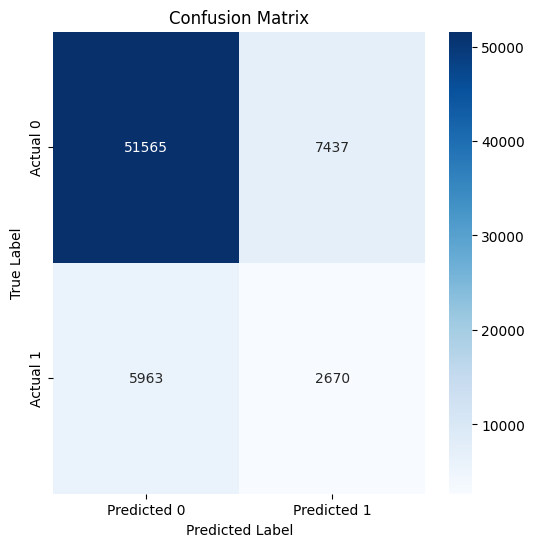

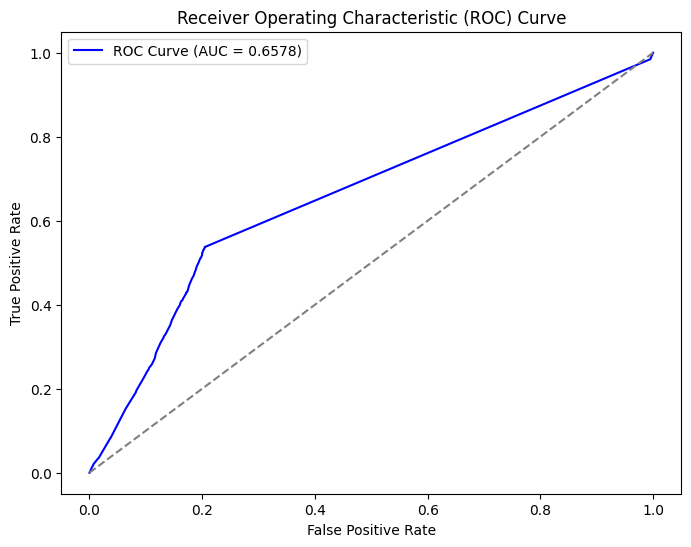

----------------------------------------------------------------------------------------------
Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 236007, number of negative: 236007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 472014, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training Accuracy: 0.8494
=== Evaluation Metrics ===
Accuracy: 0.7602
Precision: 0.2798
Recall: 0.5583
F1-score: 0.3728
ROC AUC Score: 0.6735

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.79      0.85     59002
        True       0.28      0.56      0.37      8633

    accuracy                           0.76     67635
   macro avg       0.60      0.67      0.61     67

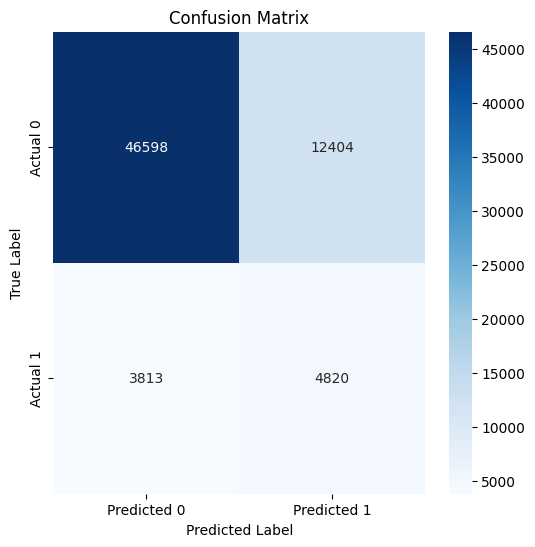

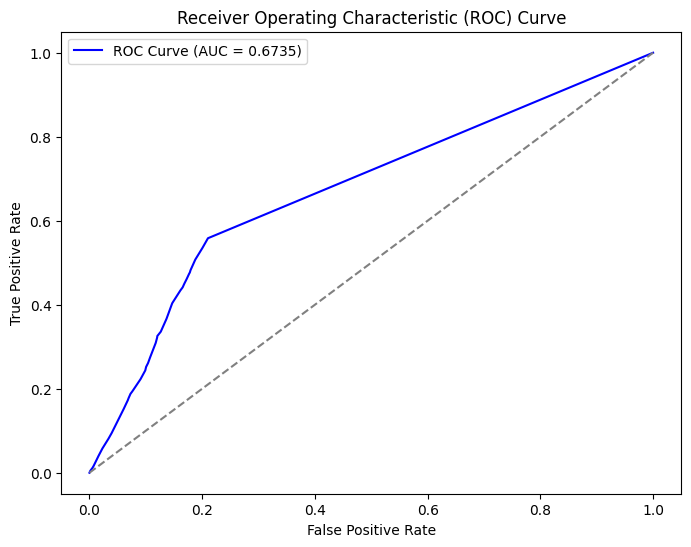

----------------------------------------------------------------------------------------------
Evaluating CatBoost...
Learning rate set to 0.142795
0:	learn: 0.5682987	total: 94.3ms	remaining: 1m 34s
1:	learn: 0.4947601	total: 200ms	remaining: 1m 39s
2:	learn: 0.4426261	total: 295ms	remaining: 1m 38s
3:	learn: 0.4140749	total: 400ms	remaining: 1m 39s
4:	learn: 0.3993855	total: 510ms	remaining: 1m 41s
5:	learn: 0.3885462	total: 628ms	remaining: 1m 44s
6:	learn: 0.3806586	total: 747ms	remaining: 1m 45s
7:	learn: 0.3739250	total: 880ms	remaining: 1m 49s
8:	learn: 0.3656008	total: 976ms	remaining: 1m 47s
9:	learn: 0.3637531	total: 1.08s	remaining: 1m 46s
10:	learn: 0.3607513	total: 1.18s	remaining: 1m 46s
11:	learn: 0.3590085	total: 1.27s	remaining: 1m 44s
12:	learn: 0.3576435	total: 1.36s	remaining: 1m 43s
13:	learn: 0.3564926	total: 1.47s	remaining: 1m 43s
14:	learn: 0.3557440	total: 1.56s	remaining: 1m 42s
15:	learn: 0.3548622	total: 1.65s	remaining: 1m 41s
16:	learn: 0.3543988	total: 1

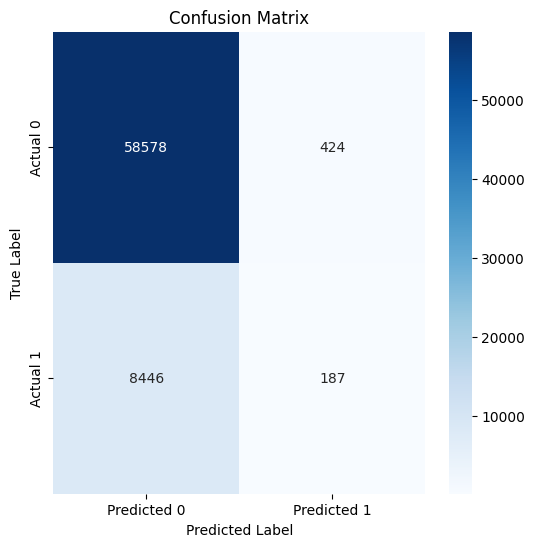

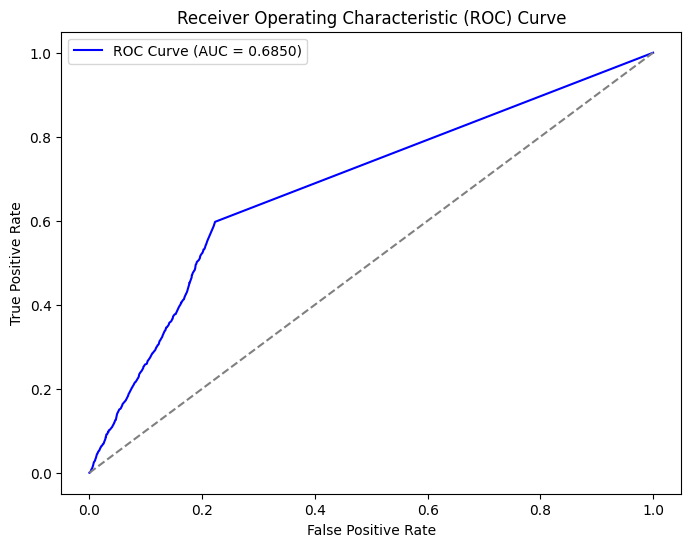

----------------------------------------------------------------------------------------------


In [ ]:
evaluate_models(linear_models, X_train_balanced_o, y_train_balanced_o, X_test_scaled, y_test)
evaluate_models(distance_based_models, X_train_balanced_o, y_train_balanced_o, X_test_scaled, y_test)
evaluate_models(tree_based_models, X_train_balanced_o, y_train_balanced_o, X_test_scaled, y_test)


Evaluating Logistic Regression...
Training Accuracy: 0.5911
=== Evaluation Metrics ===
Accuracy: 0.5854
Precision: 0.1804
Recall: 0.6347
F1-score: 0.2810
ROC AUC Score: 0.6615

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.58      0.71     59002
        True       0.18      0.63      0.28      8633

    accuracy                           0.59     67635
   macro avg       0.55      0.61      0.49     67635
weighted avg       0.82      0.59      0.65     67635



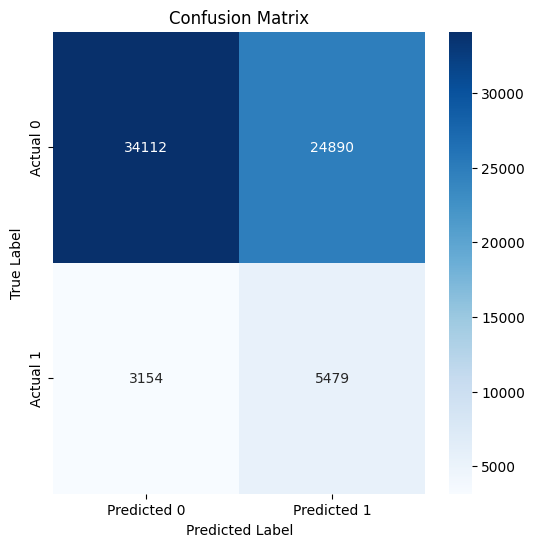

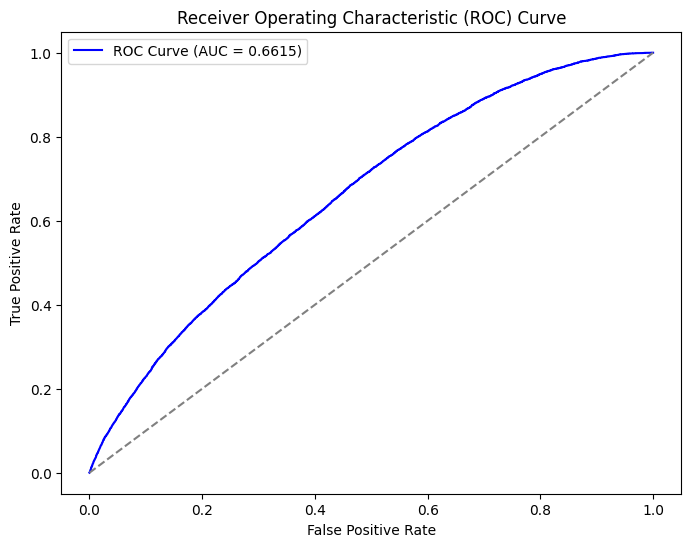

----------------------------------------------------------------------------------------------
Evaluating Linear Discriminant Analysis...
Training Accuracy: 0.7927
=== Evaluation Metrics ===
Accuracy: 0.1278
Precision: 0.1277
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.6938

=== Classification Report ===
              precision    recall  f1-score   support

       False       1.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     67635
   macro avg       0.56      0.50      0.11     67635
weighted avg       0.89      0.13      0.03     67635



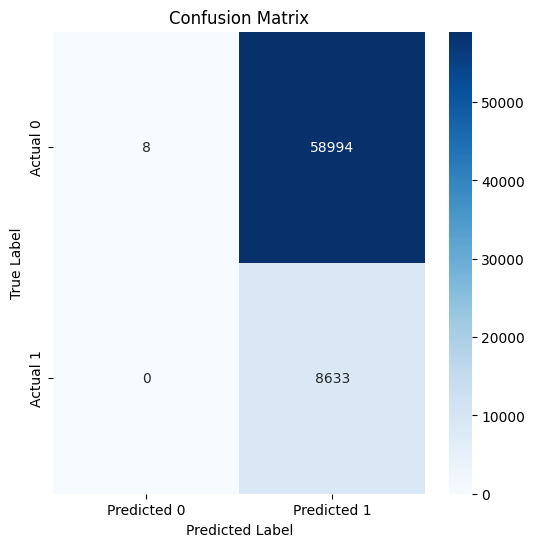

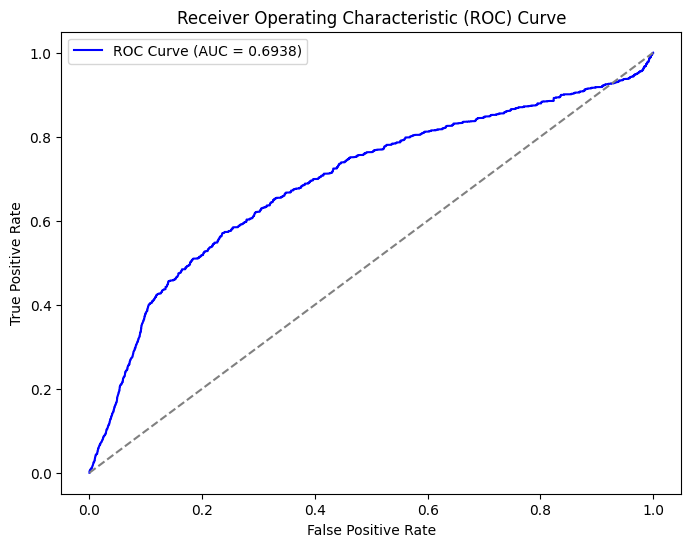

----------------------------------------------------------------------------------------------
Evaluating Quadratic Discriminant Analysis...
Training Accuracy: 0.5179
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



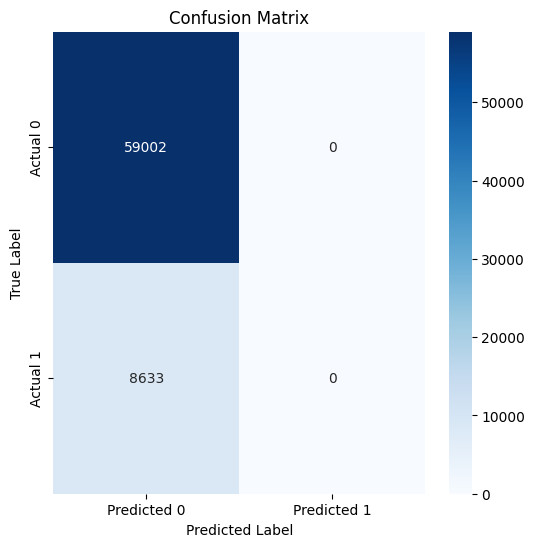

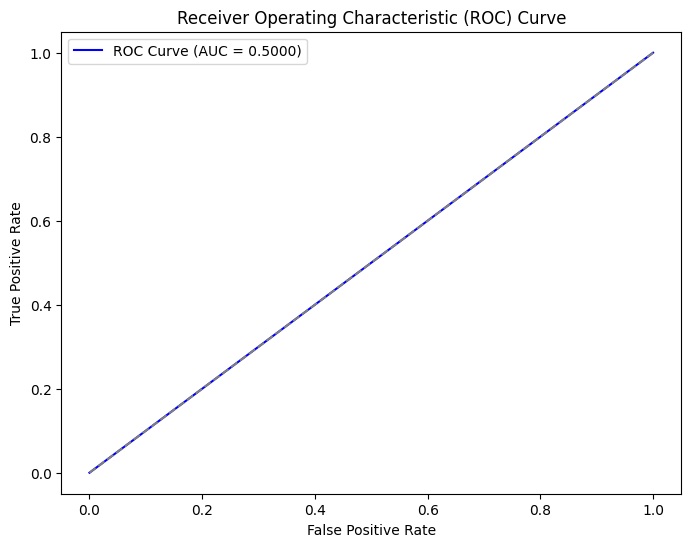

----------------------------------------------------------------------------------------------
Evaluating KNeighborsClassifier...
Training Accuracy: 0.7297
=== Evaluation Metrics ===
Accuracy: 0.8724
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC AUC Score: 0.5000

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      1.00      0.93     59002
        True       0.00      0.00      0.00      8633

    accuracy                           0.87     67635
   macro avg       0.44      0.50      0.47     67635
weighted avg       0.76      0.87      0.81     67635



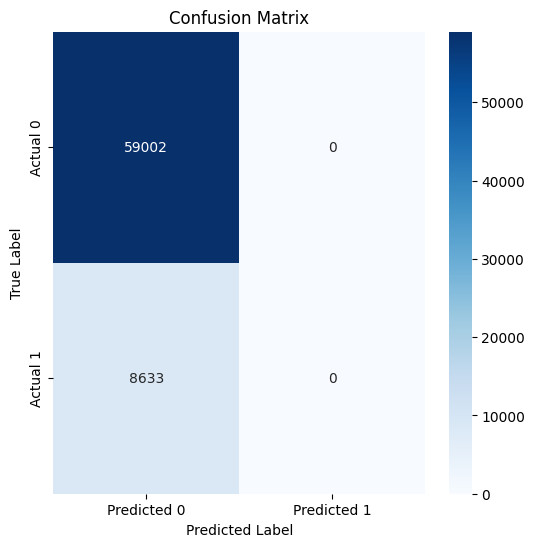

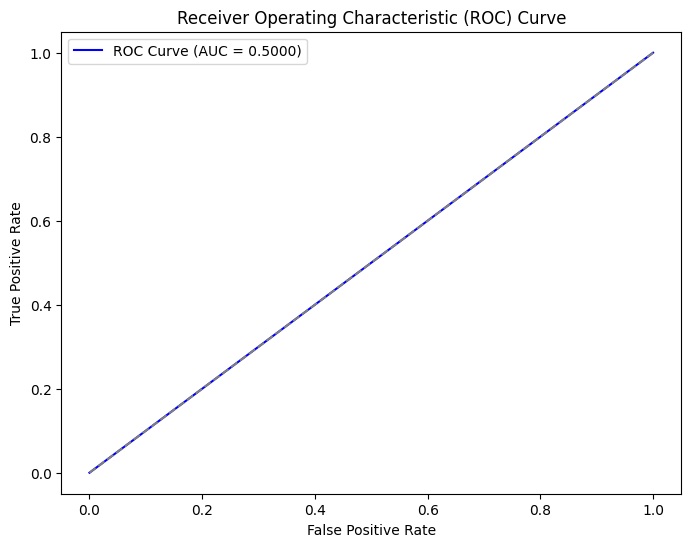

----------------------------------------------------------------------------------------------
Evaluating Decision Tree...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8664
Precision: 0.2484
Recall: 0.0232
F1-score: 0.0424
ROC AUC Score: 0.5065

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      0.99      0.93     59002
        True       0.25      0.02      0.04      8633

    accuracy                           0.87     67635
   macro avg       0.56      0.51      0.49     67635
weighted avg       0.79      0.87      0.82     67635



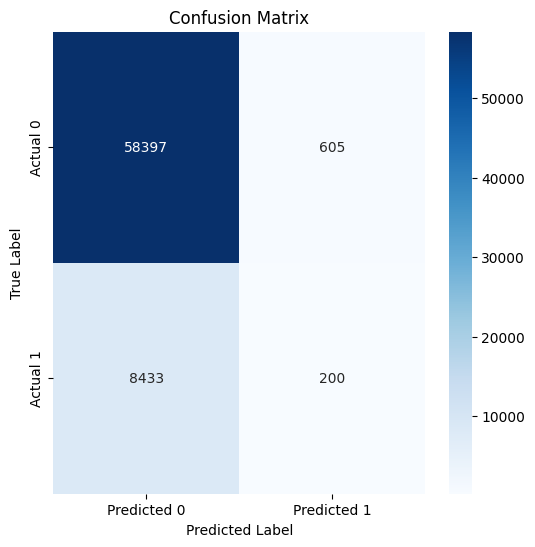

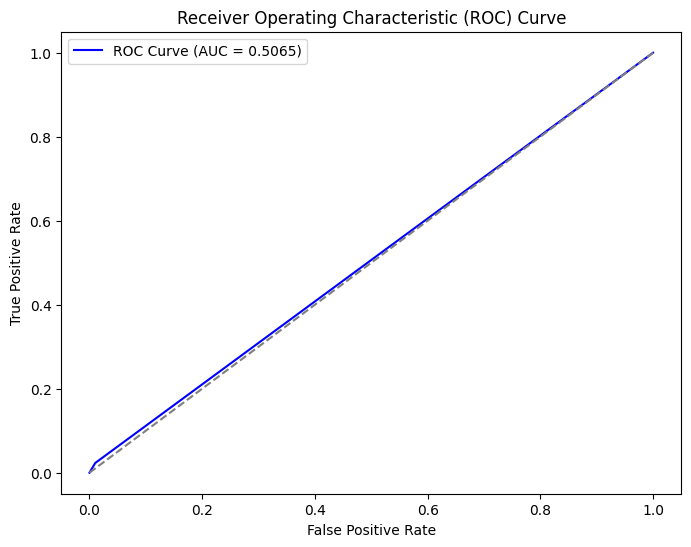

----------------------------------------------------------------------------------------------
Evaluating Random Forest...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8333
Precision: 0.2781
Recall: 0.1919
F1-score: 0.2271
ROC AUC Score: 0.6688

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.93      0.91     59002
        True       0.28      0.19      0.23      8633

    accuracy                           0.83     67635
   macro avg       0.58      0.56      0.57     67635
weighted avg       0.81      0.83      0.82     67635



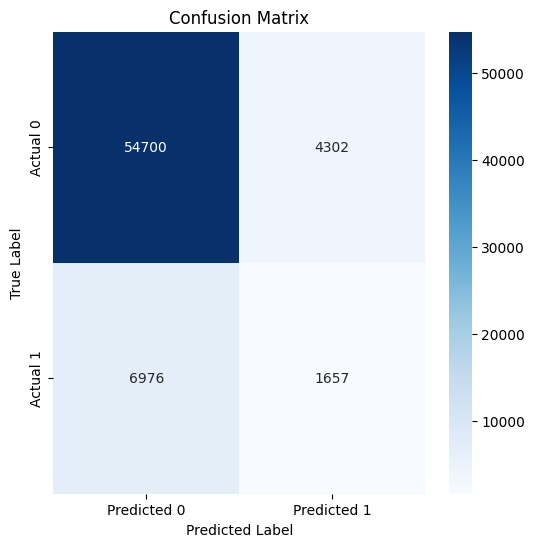

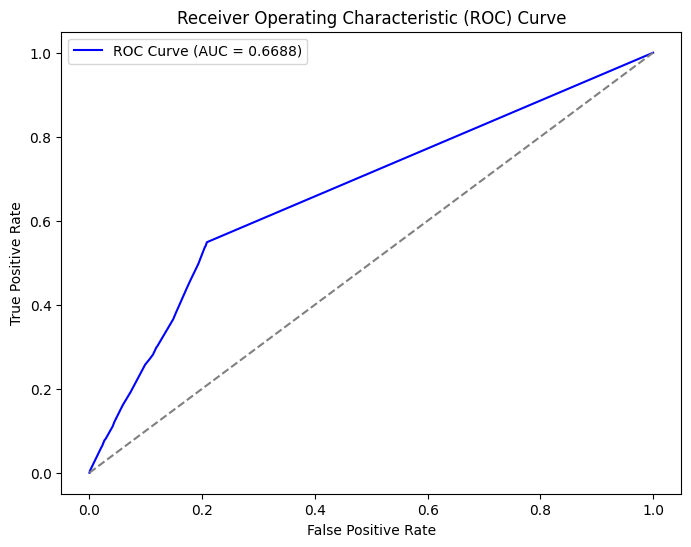

----------------------------------------------------------------------------------------------
Evaluating Extra Trees...
Training Accuracy: 1.0000
=== Evaluation Metrics ===
Accuracy: 0.8631
Precision: 0.2342
Recall: 0.0319
F1-score: 0.0561
ROC AUC Score: 0.6910

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.87      0.98      0.93     59002
        True       0.23      0.03      0.06      8633

    accuracy                           0.86     67635
   macro avg       0.55      0.51      0.49     67635
weighted avg       0.79      0.86      0.82     67635



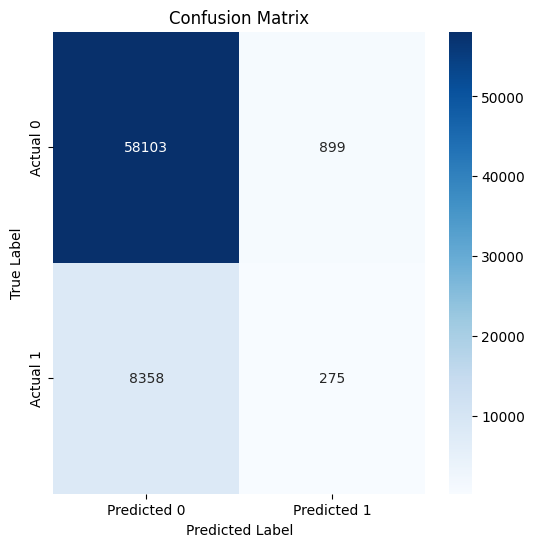

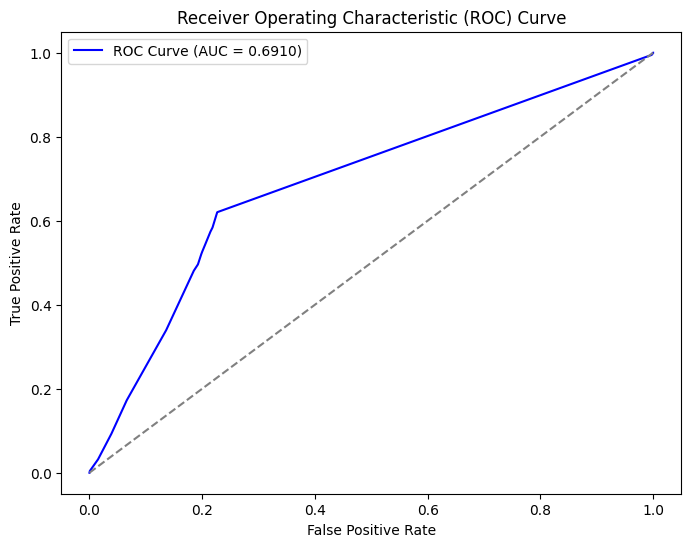

----------------------------------------------------------------------------------------------
Evaluating Gradient Boosting...
Training Accuracy: 0.8332
=== Evaluation Metrics ===
Accuracy: 0.7628
Precision: 0.2785
Recall: 0.5397
F1-score: 0.3674
ROC AUC Score: 0.6717

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.92      0.80      0.85     59002
        True       0.28      0.54      0.37      8633

    accuracy                           0.76     67635
   macro avg       0.60      0.67      0.61     67635
weighted avg       0.84      0.76      0.79     67635



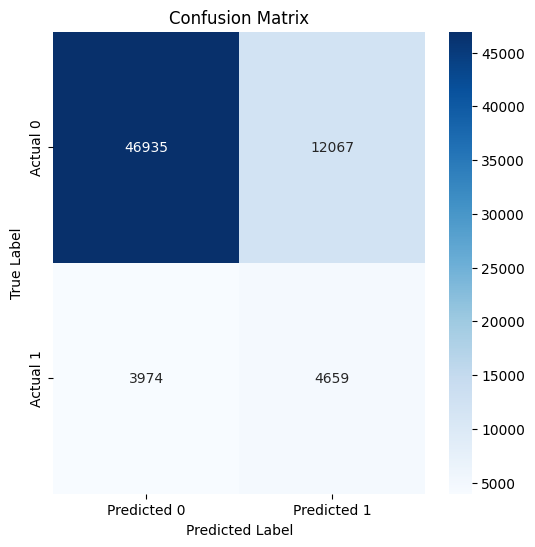

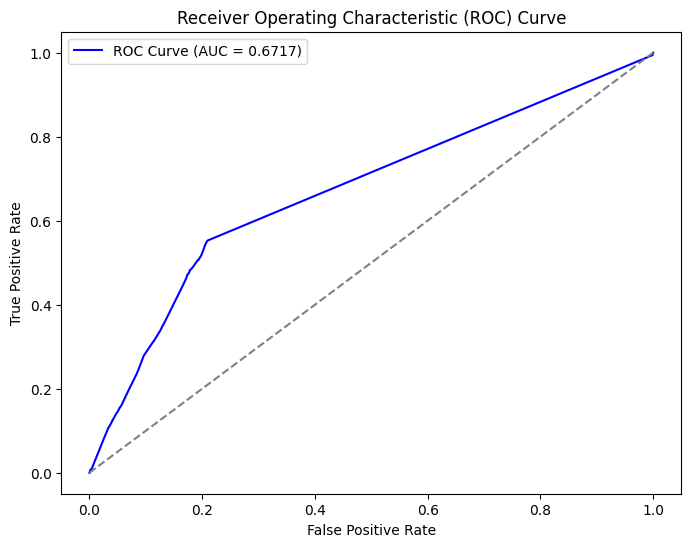

----------------------------------------------------------------------------------------------
Evaluating AdaBoost...
Training Accuracy: 0.8229
=== Evaluation Metrics ===
Accuracy: 0.7821
Precision: 0.2682
Recall: 0.4092
F1-score: 0.3241
ROC AUC Score: 0.6692

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.91      0.84      0.87     59002
        True       0.27      0.41      0.32      8633

    accuracy                           0.78     67635
   macro avg       0.59      0.62      0.60     67635
weighted avg       0.82      0.78      0.80     67635



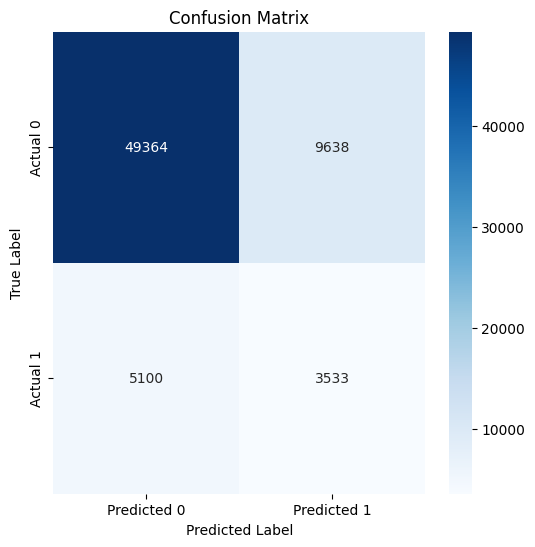

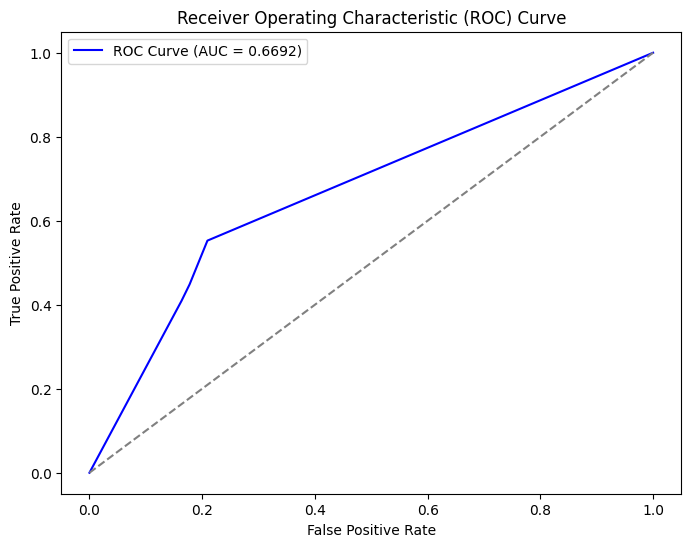

----------------------------------------------------------------------------------------------
Evaluating Bagging...
Training Accuracy: 0.9934
=== Evaluation Metrics ===
Accuracy: 0.7813
Precision: 0.2675
Recall: 0.4105
F1-score: 0.3239
ROC AUC Score: 0.6196

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.91      0.84      0.87     59002
        True       0.27      0.41      0.32      8633

    accuracy                           0.78     67635
   macro avg       0.59      0.62      0.60     67635
weighted avg       0.82      0.78      0.80     67635



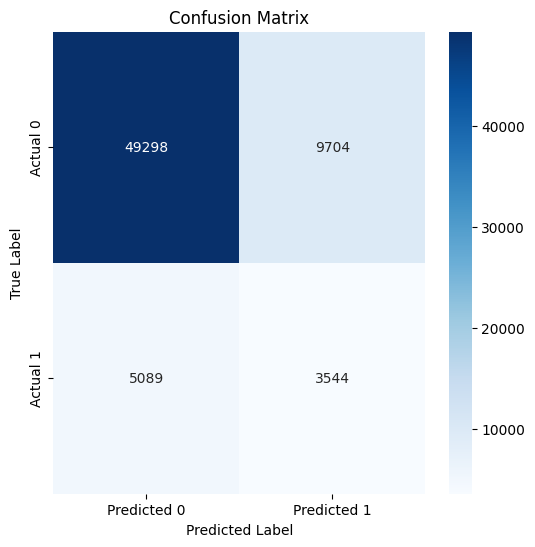

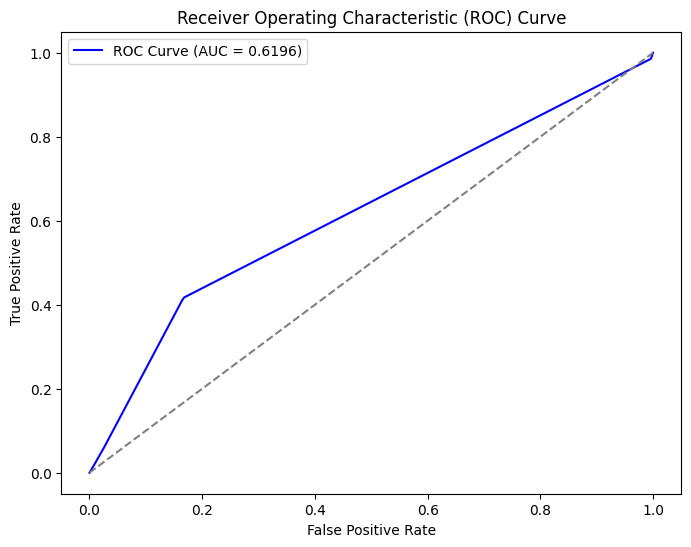

----------------------------------------------------------------------------------------------
Evaluating XGBoost...
Training Accuracy: 0.8618
=== Evaluation Metrics ===
Accuracy: 0.8063
Precision: 0.2655
Recall: 0.2929
F1-score: 0.2786
ROC AUC Score: 0.6683

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.89      0.88      0.89     59002
        True       0.27      0.29      0.28      8633

    accuracy                           0.81     67635
   macro avg       0.58      0.59      0.58     67635
weighted avg       0.81      0.81      0.81     67635



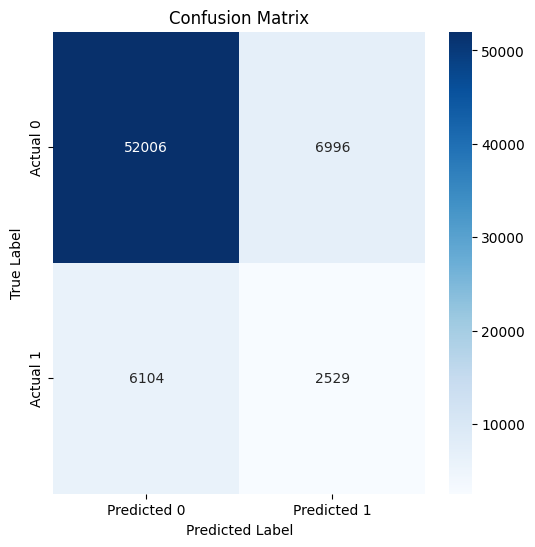

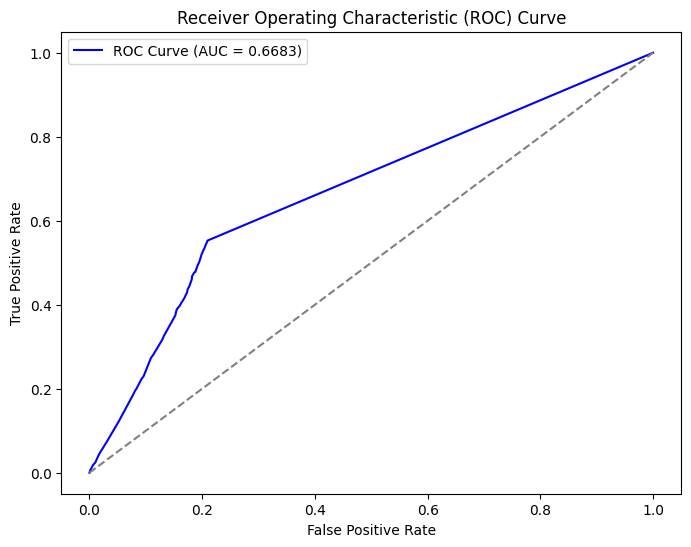

----------------------------------------------------------------------------------------------
Evaluating LightGBM...
[LightGBM] [Info] Number of positive: 34529, number of negative: 38365
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 72894, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.473688 -> initscore=-0.105346
[LightGBM] [Info] Start training from score -0.105346
Training Accuracy: 0.8436
=== Evaluation Metrics ===
Accuracy: 0.1276
Precision: 0.1276
Recall: 1.0000
F1-score: 0.2264
ROC AUC Score: 0.6770

=== Classification Report ===
              precision    recall  f1-score   support

       False       0.00      0.00      0.00     59002
        True       0.13      1.00      0.23      8633

    accuracy                           0.13     6763

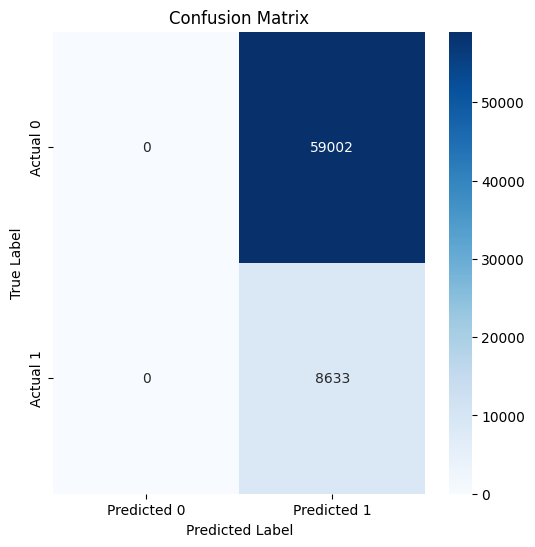

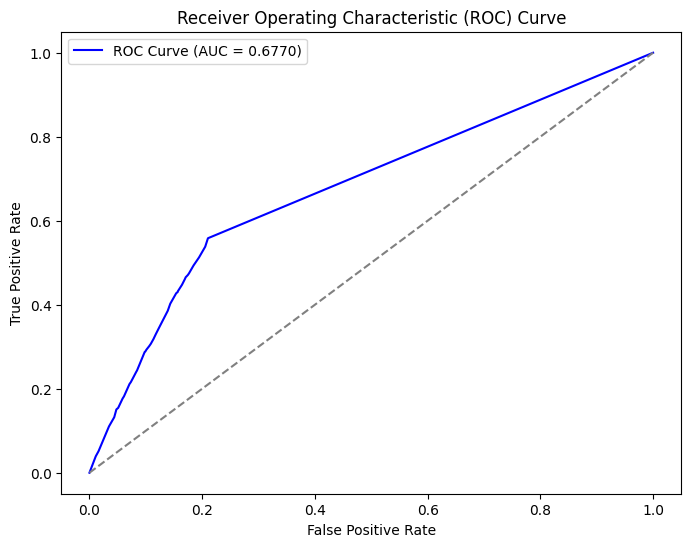

----------------------------------------------------------------------------------------------
Evaluating CatBoost...
Learning rate set to 0.064314
0:	learn: 0.6367509	total: 19ms	remaining: 19s
1:	learn: 0.5865874	total: 35.5ms	remaining: 17.7s
2:	learn: 0.5317409	total: 51.5ms	remaining: 17.1s
3:	learn: 0.4946858	total: 67.9ms	remaining: 16.9s
4:	learn: 0.4727919	total: 84.2ms	remaining: 16.8s
5:	learn: 0.4561987	total: 100ms	remaining: 16.6s
6:	learn: 0.4415319	total: 117ms	remaining: 16.5s
7:	learn: 0.4254492	total: 133ms	remaining: 16.4s
8:	learn: 0.4145897	total: 160ms	remaining: 17.6s
9:	learn: 0.4077081	total: 177ms	remaining: 17.5s
10:	learn: 0.3999526	total: 193ms	remaining: 17.4s
11:	learn: 0.3943537	total: 211ms	remaining: 17.4s
12:	learn: 0.3908833	total: 228ms	remaining: 17.3s
13:	learn: 0.3860882	total: 253ms	remaining: 17.8s
14:	learn: 0.3824451	total: 272ms	remaining: 17.9s
15:	learn: 0.3792783	total: 289ms	remaining: 17.8s
16:	learn: 0.3770915	total: 307ms	remaining: 

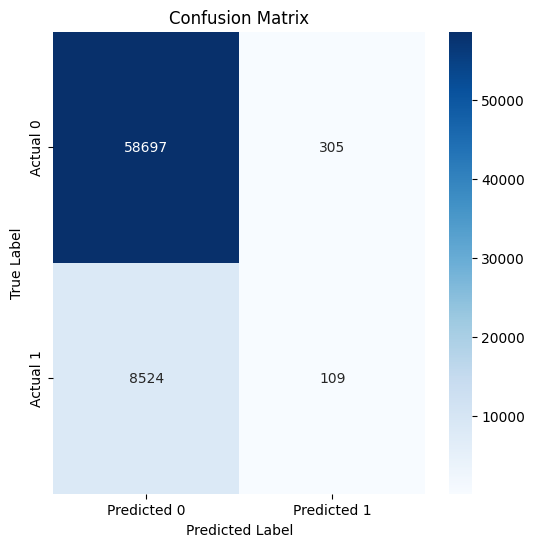

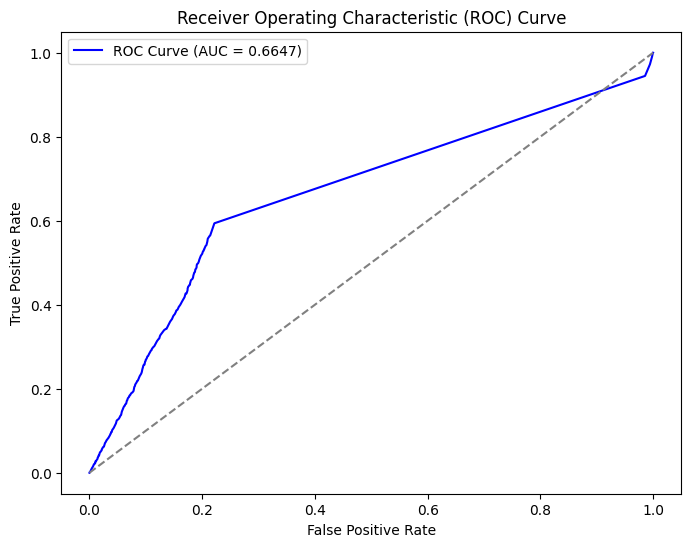

----------------------------------------------------------------------------------------------


In [ ]:
evaluate_models(linear_models, X_train_balanced_u, y_train_balanced_u, X_test_scaled, y_test)
evaluate_models(distance_based_models, X_train_balanced_u, y_train_balanced_u, X_test_scaled, y_test)
evaluate_models(tree_based_models, X_train_balanced_u, y_train_balanced_u, X_test_scaled, y_test)


# 4. Model Training and Evaluation:

all classification models.

In [ ]:
#rest of the models

# 4️⃣ Support Vector Machines
svm_models = {
    "SVC": SVC()
}

# 5️⃣ Neural Networks
neural_network_models = {
    "MLPClassifier": MLPClassifier()
}

# 6️⃣ Probabilistic & Bayesian Models
bayesian_models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Categorical Naive Bayes": CategoricalNB(),
    "Gaussian Process Classifier": GaussianProcessClassifier()
}




In [ ]:

# Dictionary of all models categorized
models = {
    "Linear Models": linear_models,
    "Distance-Based Models": distance_based_models,
    "Tree-Based Models": tree_based_models,
    "Support Vector Machines": svm_models,
    "Neural Networks": neural_network_models,
    "Probabilistic & Bayesian Models": bayesian_models
}

# Print the categorized models
for category, model_list in models.items():
    print(f"{category}: {model_list}")

Linear Models: {'Logistic Regression': LogisticRegression(), 'Linear Discriminant Analysis': LinearDiscriminantAnalysis(), 'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis()}
Distance-Based Models: {'KNeighborsClassifier': KNeighborsClassifier()}
Tree-Based Models: {'Decision Tree': DecisionTreeClassifier(), 'Random Forest': RandomForestClassifier(), 'Extra Trees': ExtraTreesClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'AdaBoost': AdaBoostClassifier(), 'Bagging': BaggingClassifier(), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_